# Прогноз количества заказов такси в Чикаго

**Цель проекта:**
- построить ML модель на Spark предсказания количества заказов на следующий час для каждой общественной зоны Чикаго с применен PySpark на локальном кластере из Docker контейнеров

**Описание проекта:**

В распоряжении около 10 млн записей о поездках такси в Чикаго за 2022 и 2023 год.
 
Информация о поездах на такси предоставляется городу Чикаго. Чтобы защитить конфиденциальность, но при этом обеспечить возможность агрегированного анализа, представлен идентификатор такси, который соответствует любому заданному номеру медальона такси, но не сам номер. Также в некоторых случаях не учитываются участки/район переписи (Census Tract)s, а время округляется до ближайших 15 минут.

Из-за процесса представления данных не обо всех поездках сообщается информация, но город считает, что о большинстве из них сообщается.

По ссылке http://digital.cityofchicago.org/index.php/chicago-taxi-data-released представлена дополнительной информации об изучаемых наборах данных и о том, как они были созданы.

По ссылке http://dev.cityofchicago.org/open%20data/data%20portal/2019/04/12/tnp-taxi-privacy.html представлена информация для дальнейшего обсуждения подхода к конфиденциальности в этом наборе данных.

По ссылке http://dev.cityofchicago.org/open%20data/data%20portal/2019/07/01/taxi-dataset-relaunch.html представлена информация для обсуждения существенных изменений в июле 2019 года.


Исходники:

- Данные за 2022 год: https://data.cityofchicago.org/Transportation/Taxi-Trips-2022/npd7-ywjz
- Данные за 2023 год: https://data.cityofchicago.org/Transportation/Taxi-Trips-2023/e55j-2ewb


В датасете за 2022 год содержится:
- 6.38M строк
- 23 столбцов \
Каждая строка содержит информацию о поездке

В датасете за 2023 год содержится:
- 3.78M строк
- 23 столбцов \
Каждая строка содержит информацию о поездке


**Описание столбцов датафрейма:**

- **Trip ID** - Уникальный идентификатор поездки
- **Taxi ID** - Уникальный идентификатор такси
- **Trip Start Timestamp**	- Время когда началась поездка, округление до ближайших 15 минут 
- **Trip End Timestamp** -	Время когда завершилась поездка, округление до ближайших 15 минут
- **Trip Seconds** - Длительность поездки в секундах
- **Trip Miles** - Расстояние поездки в милях  
- **Pickup Census Tract** - Район переписи, с которого началось путешествие. В целях конфиденциальности этот раздел переписи не отображается для некоторых поездок. Эта колонка часто будет пустой для местоположений за пределами Чикаго. 
- **Dropoff Census Tract** - Район переписи, где закончилась поездка. В целях конфиденциальности этот раздел переписи не отображается для некоторых поездок. Эта колонка часто будет пустой для местоположений за пределами Чикаго. 
- **Pickup Community Area** - Общественная зона, с которой началось путешествие. Этот столбец будет пустым для местоположений за пределами Чикаго. 
- **Dropoff Community Area** - Общественная зона, где закончилась поездка. Этот столбец будет пустым для местоположений за пределами Чикаго.
- **Fare** - Стоимость проезда в поездке
- **Tips** - Чаевые за поездку. Чаевые наличными, как правило, не учитываются.
- **Tolls**	- Плата за проезд. (пошлина/сбор за проезд по платной дороге) 
- **Extras** - 	Дополнительная плата за поездку. 
- **Trip Total** - 	Общая стоимость поездки. Общая сумма по предыдущим столбцам.
- **Payment Type** - Вид оплаты за поездку. 
- **Company** - Таксомоторная компания.
- **Pickup Centroid Latitude** - Место посадки клиента. Координаты широты центра района переписи или общественной зоны,если информация о районе переписи была скрыта в целях конфиденциальности. Эта колонка часто будет пустой для местоположений за пределами Чикаго. 
- **Pickup Centroid Longitude** - Место посадки клиента. Координаты долготы центра района переписи или общественной зоны,если информация о районе переписи была скрыта в целях конфиденциальности. Эта колонка часто будет пустой для местоположений за пределами Чикаго. 
- **Pickup Centroid Location** - Место посадки клиента. Координаты местоположения (широты и долготы)  центра района переписи или общественной зоны,если информация о районе переписи была скрыта в целях конфиденциальности. Эта колонка часто будет пустой для местоположений за пределами Чикаго. 
- **Dropoff Centroid Latitude** - Место высадки клиента. Координаты широты центра района переписи или общественной зоны,если информация о районе переписи была скрыта в целях конфиденциальности. Эта колонка часто будет пустой для местоположений за пределами Чикаго. 
- **Dropoff Centroid Longitude** - Место высадки клиента. Координаты долготы центра района переписи или общественной зоны,если информация о районе переписи была скрыта в целях конфиденциальности. Эта колонка часто будет пустой для местоположений за пределами Чикаго. 
- **Dropoff Centroid Location** - Место высадки клиента. Координаты местоположения (широты и долготы)  центра района переписи или общественной зоны,если информация о районе переписи была скрыта в целях конфиденциальности. Эта колонка часто будет пустой для местоположений за пределами Чикаго. 


**Карта Чикаго**

<img src="./Chicago-Community-Areas-Map-min.png" width="500" height="500">


Название общественной зоны (community areas) можно найти в файле **chicago_areas_sides.scv**  в корневой папки проекта.

Стоит отметить, что Чикаго разделяют на условные округа ("стороны" - sides), в которые входят общественной зоны (community areas). В сами же общественные зоны состоят из районов переписи (сensus tract). 

## 1.Установка и импортирование библиотек. Глобальные переменные

Установим PySpark

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 3.6 MB/s eta 0:00:00a 0:00:01


Установим folium

In [2]:
!pip3 install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 2.6 MB/s eta 0:00:00a 0:00:01


Импортируем библиотеки

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

import time
from tqdm import tqdm

from statsmodels.tsa.seasonal import seasonal_decompose
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as f
from pyspark.sql.window import Window

import folium
from folium.plugins import MarkerCluster

from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, GBTRegressor

In [4]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)

In [5]:
# setting random seed for notebook reproducability
rnd_seed=12345
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

In [6]:
SPARK_MASTER_IP = '172.18.0.2' 
APP_NAME = "pyspark-taxi-forecasting"

In [7]:
# проверим путь к текущей директории
print(os.getcwd())

/work


In [8]:
TAXI_DATA_1 = '/work/Taxi_Trips_-_2022.csv'
TAXI_DATA_2 = '/work/Taxi_Trips_-_2023.csv'
CHICAGO_REGION = '/work/chicago_areas_sides.csv'

**Функции**

In [9]:
#Подсчет кол-ва пропущенных значений в каждом столбце датафрейма.
def null_col(data):
    a = []
    b = []
    c = []
    count = 0
    for value in data.columns:
        p = data.select(f.col(value).isNull())
        a.append(p.filter(f'{p.columns[0]}' + '= True').count())
        b.append(p.filter(f'{p.columns[0]}' + '= True').count()/data.count()*100)
        c.append(value)
        count += 1

    return pd.DataFrame( {'name_columns': pd.Series(c),
                                'count': pd.Series(a),
                                'count,%': pd.Series(b)}
                              )

In [10]:
#Подсчет кол-ва уникальных значений в каждом столбце датафрейма.
def uniq_col(data):
    a = []
    c = []
    count = 0
    for value in data.columns:
        a.append(data.select(f.col(value)).distinct().count())
        c.append(value)
        count += 1

    return pd.DataFrame( {'name_columns': pd.Series(c),
                                'count_uniq': pd.Series(a)}
                              )

In [11]:
#Построение гистограммы и "ящик с усами"
def graph(data,value,value_2):
    data_group = data.groupBy(value).count().sort(value, ascending=True).toPandas()
    data_group['count'].plot(x=value,y ='count', figsize=(15, 4))
    plt.title(f'Гистограмма по столбцу {value}' )
    plt.xlabel(value_2)
    plt.ylabel('Кол-во')
    plt.show();

    plt.figure(figsize=(15,4))
    sns.boxplot(x=data_group[value])
    plt.title(f'График "ящика с усами" по столбцу {value}')
    plt.xlabel(value_2)
    plt.show();

## 2. Исследовательский анализ данных (Разведочный анализ данных)

### 2.1 Загружаем и получаем информацию о датасете

#### Создание SparkSession

In [12]:
spark = (
    SparkSession.builder.appName(APP_NAME)
    .master(f"spark://{SPARK_MASTER_IP}:7077")
    .config("spark.executor.cores", 1)
    .config("spark.task.cpus", 1)
    .getOrCreate()
)

In [13]:
print('Spark info :')
spark

Spark info :


In [14]:
sqlContext = SQLContext(spark.sparkContext)

/usr/local/spark/python/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


#### Загружаем данные в спарковский DataFrame

Укажем схему при которой будет происходить загрузка данных в DataFrame, чтобы улучшить производительность. Типы данных указаны с учетом полученной информации о стобцах с сайта данных о такси Чикаго. Также запишем столбцы в правильном стиле. 

In [15]:
# определить схему, соответствующую строке в файле данных csv.
schema = StructType([
    StructField("trip_id", StringType(), nullable=True),
    StructField("taxi_id", StringType(), nullable=True),
    StructField("trip_start_timestamp", StringType(), nullable=True),
    StructField("trip_end_timestamp", StringType(), nullable=True),
    StructField("trip_seconds", FloatType(), nullable=True),
    StructField("trip_miles", FloatType(), nullable=True),
    StructField("pickup_census_tract", StringType(), nullable=True),
    StructField("dropoff_census_tract", StringType(), nullable=True),
    StructField("pickup_community_area", IntegerType(), nullable=True),
    StructField("dropoff_community_area", IntegerType(), nullable=True),
    StructField("fare", FloatType(), nullable=True),
    StructField("tips", FloatType(), nullable=True),
    StructField("tolls", FloatType(), nullable=True),
    StructField("extras", FloatType(), nullable=True),
    StructField("trip_total", FloatType(), nullable=True),
    StructField("payment_type", StringType(), nullable=True),
    StructField("company", StringType(), nullable=True),
    StructField("pickup_centroid_latitude", DoubleType(), nullable=True),
    StructField("pickup_centroid_longitude", DoubleType(), nullable=True),
    StructField("pickup_centroid_location", StringType(), nullable=True),
    StructField("dropoff_centroid_latitude", DoubleType(), nullable=True),
    StructField("dropoff_centroid_longitude", DoubleType(), nullable=True),
    StructField("dropoff_centroid_location", StringType(), nullable=True)
    ]
)

Считаем данные csv-файлов за 2022 и 2023 год в датафрейм и сохраним в переменные. 

In [16]:
taxi_2022_sdf = spark.read.option("header", True).csv(path=TAXI_DATA_1, schema=schema).cache()
type(taxi_2022_sdf)

pyspark.sql.dataframe.DataFrame

In [17]:
taxi_2023_sdf = spark.read.option("header", True).csv(path=TAXI_DATA_2, schema=schema).cache()
type(taxi_2023_sdf)

pyspark.sql.dataframe.DataFrame

In [18]:
data_areas = pd.read_csv(CHICAGO_REGION,sep=';')

#### Датафрейм за 2022 год

Посмотрим на структуру загруженного датафрейма за 2022 год

In [19]:
taxi_2022_sdf.printSchema()

root
 |-- trip_id: string (nullable = true)
 |-- taxi_id: string (nullable = true)
 |-- trip_start_timestamp: string (nullable = true)
 |-- trip_end_timestamp: string (nullable = true)
 |-- trip_seconds: float (nullable = true)
 |-- trip_miles: float (nullable = true)
 |-- pickup_census_tract: string (nullable = true)
 |-- dropoff_census_tract: string (nullable = true)
 |-- pickup_community_area: integer (nullable = true)
 |-- dropoff_community_area: integer (nullable = true)
 |-- fare: float (nullable = true)
 |-- tips: float (nullable = true)
 |-- tolls: float (nullable = true)
 |-- extras: float (nullable = true)
 |-- trip_total: float (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)
 |-- pickup_centroid_latitude: double (nullable = true)
 |-- pickup_centroid_longitude: double (nullable = true)
 |-- pickup_centroid_location: string (nullable = true)
 |-- dropoff_centroid_latitude: double (nullable = true)
 |-- dropoff_centroid_long

In [20]:
col_data_1 = len(taxi_2022_sdf.columns)
len_data_1 = taxi_2022_sdf.count()
print('Всего столбцов в датафреме спарка:', col_data_1)
print('Всего строк в датафреме спарка:', len_data_1)

Всего столбцов в датафреме спарка: 23
Всего строк в датафреме спарка: 6382425


Посомтрим на данные в загруженном датафрейме. Так как у нас 23 столбца, то всю таблицу в ширину не получиться отобразить. Посмотрим на данные в столцбах по отдельности.

In [21]:
taxi_2022_sdf.select(
    f.col('trip_id'),
    f.col('taxi_id'))\
.show(5, False, vertical= True)

-RECORD 0-----------------------------------------------------------------------------------------------------------------------------------
 trip_id | bcfa19f2539021c054809d4c3993d226996ae095                                                                                         
 taxi_id | 368ce5511598af2cc07efdb68067d381174fdac1d47a2837d021e647f4c8febb3d9bf330e155845b8217b9b451c29b1b9ecf5d55d4bfe6cfd5d79ffb49b1f334 
-RECORD 1-----------------------------------------------------------------------------------------------------------------------------------
 trip_id | 2aba69ff015f9ea8e7bff43cab7eddb228f34a12                                                                                         
 taxi_id | 449fa4909552757130d09d98ebc7770e2dd94579036b0e1958f92577ffc9fd6deca97bc1f229d2700865ce12b54d454ba96f973077386210ccbe44bfb7aac317 
-RECORD 2-----------------------------------------------------------------------------------------------------------------------------------
 trip_id | 54

В данных столбцах представлены индивидуальные индентификаторы поездки и такси. 

In [22]:
taxi_2022_sdf.select(
    f.col('trip_start_timestamp'),
    f.col('trip_end_timestamp'),
    f.col('trip_seconds'),
    f.col('trip_miles'),
    f.col('pickup_census_tract'),
    f.col('dropoff_census_tract'),
    f.col('pickup_community_area'),
    f.col('dropoff_community_area'))\
.show(20,False)

+----------------------+----------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+
|trip_start_timestamp  |trip_end_timestamp    |trip_seconds|trip_miles|pickup_census_tract|dropoff_census_tract|pickup_community_area|dropoff_community_area|
+----------------------+----------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+
|01/01/2022 12:00:00 AM|01/01/2022 12:00:00 AM|152.0       |0.1       |null               |null                |null                 |null                  |
|01/01/2022 12:00:00 AM|01/01/2022 12:30:00 AM|2360.0      |17.44     |null               |null                |null                 |8                     |
|01/01/2022 12:00:00 AM|01/01/2022 12:00:00 AM|536.0       |4.83      |null               |null                |28                   |22                    |
|01/01/2022 12:00:00 AM|01/01/2022 12:15:00 AM|897.0

In [23]:
taxi_2022_sdf.select(
    f.col('fare'),
    f.col('tips'),
    f.col('tolls'),
    f.col('extras'),
    f.col('trip_total'),
    f.col('payment_type'),
    f.col('company'),
    f.col('pickup_centroid_latitude'),
    f.col('pickup_centroid_longitude'))\
.show(20,False)

+-----+----+-----+------+----------+------------+-------------------------+------------------------+-------------------------+
|fare |tips|tolls|extras|trip_total|payment_type|company                  |pickup_centroid_latitude|pickup_centroid_longitude|
+-----+----+-----+------+----------+------------+-------------------------+------------------------+-------------------------+
|3.75 |0.0 |0.0  |0.0   |3.75      |Cash        |Medallion Leasin         |null                    |null                     |
|47.75|0.0 |0.0  |5.0   |52.75     |Cash        |Flash Cab                |null                    |null                     |
|14.75|0.0 |0.0  |0.0   |14.75     |Cash        |Globe Taxi               |41.874005383            |-87.66351755             |
|9.75 |0.0 |0.0  |1.5   |11.25     |Cash        |Sun Taxi                 |41.899602111            |-87.633308037            |
|9.36 |2.14|0.0  |0.0   |11.5      |Mobile      |Chicago Independents     |41.899602111            |-87.6333080

Между fare, tips,tolls,extras, и trip_total будет наблюдаться высокая корреляция, так как trip_total

In [24]:
taxi_2022_sdf.select(
    f.col('pickup_centroid_location'),
    f.col('dropoff_centroid_latitude'),
    f.col('dropoff_centroid_longitude'),
    f.col('dropoff_centroid_location'))\
.show(20,False)

+------------------------------------+-------------------------+--------------------------+------------------------------------+
|pickup_centroid_location            |dropoff_centroid_latitude|dropoff_centroid_longitude|dropoff_centroid_location           |
+------------------------------------+-------------------------+--------------------------+------------------------------------+
|null                                |null                     |null                      |null                                |
|null                                |41.899602111             |-87.633308037             |POINT (-87.6333080367 41.899602111) |
|POINT (-87.6635175498 41.874005383) |41.92276062              |-87.699155343             |POINT (-87.6991553432 41.9227606205)|
|POINT (-87.6333080367 41.899602111) |41.878865584             |-87.625192142             |POINT (-87.6251921424 41.8788655841)|
|POINT (-87.6333080367 41.899602111) |41.878865584             |-87.625192142             |POINT 

Изучив предварительно данные. Можно заметить, что:
- trip_start_timestamp и trip_end_timestamp сохранены как в типе строка, а не timestamp. Необходимо будет сделать перевод в тип данных timestamp с знаечнием времени 24ч, а не AM/PM
- pickup_centroid_location  повторяет значения в столбцах pickup_centroid_latitude и pickup_centroid_longitude, однако с большей точностью после запятой. Также значения в pickup_centroid_location сохранениы  в строчном типе данных и будет требовать дополнительной обработки. Предлагается в дальнейшем избавиться от столбца pickup_centroid_location. Значений после запятой  столбцах pickup_centroid_latitude и pickup_centroid_longitude достаточно будет для определения геопозиций, если они понадобатся для визуализации.
- dropoff_centroid_location  повторяет значения в столбцах dropoff_centroid_latitude и dropoff_centroid_longitude, однако с большей точностью после запятой. Также значения в dropoff_centroid_location сохранениы  в строчном типе данных и будет требовать дополнительной обработки. Предлагается в дальнейшем избавиться от столбца dropoff_centroid_location. Значений после запятой  столбцах dropoff_centroid_latitude и dropoff_centroid_longitude достаточно будет для определения геопозиций, если они понадобатся для визуализации.

**Кол-во пропущенных значений в каждом столбце**

In [25]:
data_null_2022 = null_col(taxi_2022_sdf)

In [26]:
display(data_null_2022.sort_values(by=['count'], ascending=False))

name_columns    count    count,%
6          pickup_census_tract  3758594  58.889748
7         dropoff_census_tract  3707094  58.082845
9       dropoff_community_area   633684   9.928577
22   dropoff_centroid_location   597931   9.368398
21  dropoff_centroid_longitude   597931   9.368398
20   dropoff_centroid_latitude   597931   9.368398
8        pickup_community_area   513853   8.051062
19    pickup_centroid_location   511551   8.014994
18   pickup_centroid_longitude   511551   8.014994
17    pickup_centroid_latitude   511551   8.014994
13                      extras     3536   0.055402
14                  trip_total     3536   0.055402
11                        tips     3536   0.055402
12                       tolls     3536   0.055402
10                        fare     3536   0.055402
4                 trip_seconds     1465   0.022954
3           trip_end_timestamp      212   0.003322
5                   trip_miles       56   0.000877
1                      taxi_id        0   0.000000
15                payment_type        0   0.000000
16                     company        0   0.000000
2         trip_start_timestamp        0   0.000000
0                      trip_id        0   0.000000

In [27]:
print('Колв-во столбцов с пропусками:', len(data_null_2022[data_null_2022['count']>0]))

Колв-во столбцов с пропусками: 18


- В столбцах pickup_census_tract и dropoff_census_tract наблюдается большое кол-во пропусков. Восстановить нет возможности (только если через столбцы с координатами). Но так как нам необходимо построить модель о количестве заказов для каждого community_area, то информация о census_tract нам не особо важна, так как общественные зоны состоят из центров переписи. Предлагается в дальнейшев удалить данные столцы из датафрейма.
- Информация в столбцах dropoff_centroid_location,dropoff_centroid_longitude,dropoff_centroid_latitude	пропущена в одинаковом кол-ве. Вероятно данные о месте высадке были скрыты или клиент уехал за пределы Чикаго. По описанию датасета вероятно второе. От пропущенных занечний в столбцах можно избавиться или внести "заглушку", приняв координаты (0,0) условной место посади и высадки, которое будет обозначать зону "Unhknown". Однако, данные столбцы для дальнейшего обучения модели не пригодяться. Информация о геолокации в данной работе будет нести больше визуальный характер для исселодовательских задач. Предлагается в дальнейшев удалить данные столцы из датафрейма.
- Информация в столбцах pickup_centroid_location,pickup_centroid_longitude,pickup_centroid_latitude	пропущена в одинаковом кол-ве. Вероятно данные о месте посадке были скрыты или клиент уехал за пределы Чикаго. По описанию датасета вероятно второе. От пропущенных занечний в столбцах можно избавиться или внести "заглушку", приняв координаты (0,0) условной место посади и высадки, которое будет обозначать зону "Unhknown". Однако, данные столбцы для дальнейшего обучения модели не пригодяться. Информация о геолокации в данной работе будет нести больше визуальный характер для исселодовательских задач. Предлагается в дальнейшев удалить данные столцы из датафрейма.
- удалим строки в dropoff_community_area и pickup_community_area, если информация о них не известна в обоих столбцах одновременно. Следовательно мы не знаем откуад и куда поехал клиент. А вот если значение пусто только в одном из столбцов, то вероятно клиент или покинул пределы Чикаго или приехал в него с другого города. Поэтому можно пустое значение заполнить "заглушкой" в виде цифры 0, которое будет обозначать зону "Unhknown". Однако для того, чтобы убедиться, что клиент приехал откуда-то или куда-то. Можно сравниватьс с медианным временем в пути в районе. Если больше, то район "Unknown", если меньше, то тот же район указываем.
- удалим строки с пустым знаечнием в столбце trip_end_timestamp, так как мы не можем определить точное завершение время. Только, если есть инфомрация о trip_seconds. Но так как пустых значений с датафрейме меньше 1%, то предлагается просто удалить данные строки.
-  удалим строки с пустым знаечнием в столбцах extras,trip_total,tips,tolls,fare,trip_seconds,trip_miles. Пропущенные значения составляют меньши 1% от всего датафрейма. Их можно было бы попробовать восстановить через поиск медианного значения в пределах региона за год. Плюс наблюдается, что пропущено одинаковое кол-во. Вероятно поездка была отменена. 

**Кол-во уникальных значений в каждом столбце**

In [28]:
data_uniq_2022 = uniq_col(taxi_2022_sdf)
print(data_uniq_2022)

                  name_columns  count_uniq
0                      trip_id     6382425
1                      taxi_id        2951
2         trip_start_timestamp       35036
3           trip_end_timestamp       35051
4                 trip_seconds       16753
5                   trip_miles        7107
6          pickup_census_tract         666
7         dropoff_census_tract         812
8        pickup_community_area          78
9       dropoff_community_area          78
10                        fare        9052
11                        tips        3386
12                       tolls         341
13                      extras        2265
14                  trip_total       14235
15                payment_type           8
16                     company          38
17    pickup_centroid_latitude         616
18   pickup_centroid_longitude         616
19    pickup_centroid_location         617
20   dropoff_centroid_latitude         661
21  dropoff_centroid_longitude         661
22   dropof

- Кол-во уникальных значений в trip_id соответсвует общему кол-во строк в датафрейме. Значит все поездки уникальны и нет повторений. Для обучения нашей модели данный столбец не понадобиться.
- Таксиство же (taxi_id) всего 2951 в Чикаго работает. А так как таксопарков (company) пропущенных в данных не наблюдалось, значит все такси из Чикаго. Для обучения модели столбец не понадобиться.
- trip_start_timestamp и trip_end_timestamp около 35к уникальных значений. Но это на данный момент. Пока мы не скорректировали тип данных. вероятно наша выборка уникальных знаечний возрастет в два раза.
- посмотрим на уникальные знаечния в payment_type и company

In [29]:
taxi_2022_sdf.select('payment_type').distinct().toPandas()['payment_type']

0    Credit Card
1      No Charge
2        Unknown
3         Prcard
4           Cash
5        Dispute
6         Mobile
7        Prepaid
Name: payment_type, dtype: object

Виды оплат:
- Prepaid (предоплачено)
- Credit Card (оплата по кредитной карте)
- No Charge (бесплатно)
- Unknown (неизвестно)
- Prcard (Permanent resident card)
- Cash (наличка)
-  Dispute (диспут. возврат средств)
-  Mobile (оплата через мобильное приложение)

In [30]:
taxi_2022_sdf.select('company').distinct().toPandas()['company'].sort_values()

19                           24 Seven Taxi
24                 2733 - 74600 Benny Jona
20           312 Medallion Management Corp
0              3556 - 36214 RC Andrews Cab
21         3620 - 52292 David K. Cab Corp.
2             4053 - 40193 Adwar H. Nikola
25                    4623 - 27290 Jay Kim
23                4787 - 56058 Reny Cab Co
29                             5 Star Taxi
32                 5062 - 34841 Sam Mestas
13             6574 - Babylon Express Inc.
30            Blue Ribbon Taxi Association
18       Blue Ribbon Taxi Association Inc.
37               Chicago Carriage Cab Corp
26                    Chicago Independents
34            Chicago Medallion Management
1                          Chicago Taxicab
8                  Choice Taxi Association
27                            City Service
7                                Flash Cab
16                              Globe Taxi
22                   KOAM Taxi Association
31                   Koam Taxi Association
35         

In [31]:
print('Всего компаний: ', len(taxi_2022_sdf.select('company').distinct().toPandas()['company'].sort_values()))

Всего компаний:  38


Можно заметитьчто компании записаны не корректно и следовательно в никальном смписке повторяются. Если в дальнейшем придется иследовать популярность компанийк примеру, то надо будет скорректировать.
К примеру:
-     Blue Ribbon Taxi Association и Blue Ribbon Taxi Association Inc.
-     Taxicab Insurance Agency Llc и Taxicab Insurance Agency, LLC
-     KOAM Taxi Association и Koam Taxi Association

Однако информация о названии компании не особо нам пригодится для обучения модели.

В столбцах pickup_community_area и dropoff_community_area 78 уникальных значений. Но зон 77. Значит присутсвует в списке значение Null или NaN.

In [32]:
taxi_2022_sdf.select('pickup_community_area').distinct().toPandas()['pickup_community_area'].sort_values()

13     1.0
70     2.0
18     3.0
36     4.0
24     5.0
      ... 
76    74.0
61    75.0
5     76.0
47    77.0
12     NaN
Name: pickup_community_area, Length: 78, dtype: float64

**Общая инфорация по столбцам**

In [33]:
taxi_2022_sdf.describe('trip_seconds',
                       'trip_miles',
                       'fare',
                       'tips',
                       'tolls',
                       'extras',
                       'trip_total').toPandas()

summary        trip_seconds          trip_miles                fare  \
0   count             6380960             6382369             6378889   
1    mean  1198.2085212883328  6.1855689058828665   21.72931311862629   
2  stddev  1895.6648780827334   8.002858369955101  49.416239127435404   
3     min                 0.0                 0.0                 0.0   
4     max             86341.0             2967.54             9999.75   

                 tips                tolls              extras  \
0             6378889              6378889             6378889   
1  2.7545550146994864  0.02128382069361842   2.163035586593336   
2   4.083891670766787    7.659938810021899  21.752692121820804   
3                 0.0                  0.0                 0.0   
4               496.0              6666.66             8888.88   

           trip_total  
0             6378889  
1     26.825097613287  
2  56.964604381189275  
3                 0.0  
4             9999.75

Наблюдаются аномальные поездки с большим расстоянием,временем и стоимостью. Посмотрим на распределение знаечний за 2022 год. Рассмотренные раннее пропущенные значения не повлияют на наши наблюдения, так как нами было приянто удлаить данные строки.

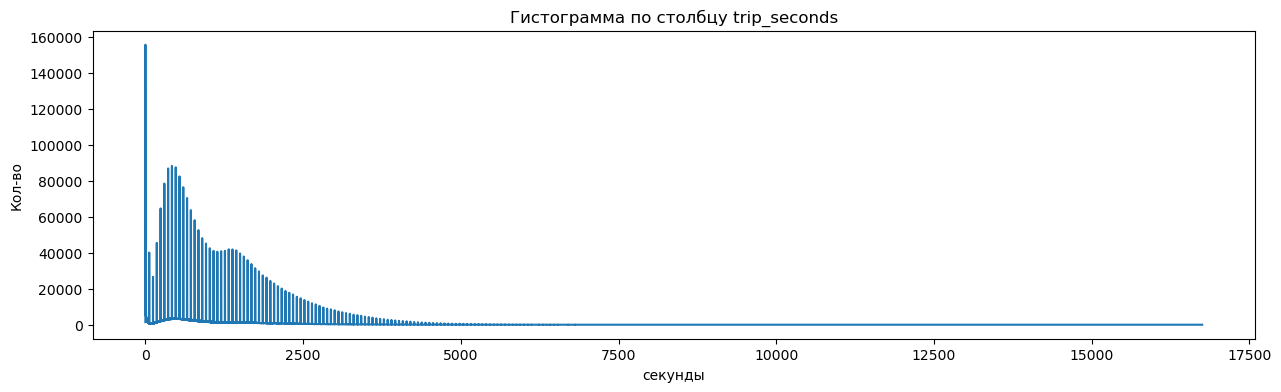

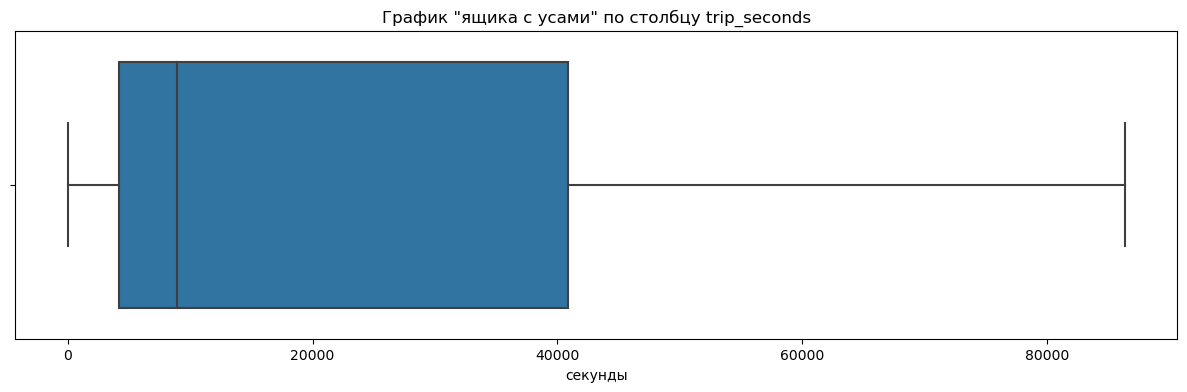

In [34]:
#trip_seconds
graph(taxi_2022_sdf,'trip_seconds','секунды')

In [35]:
print('Посчитаем процент строк с длительностью поездки 0 секунд:',
      taxi_2022_sdf.filter('trip_seconds = 0').count()/len_data_1 * 100)

Посчитаем процент строк с длительностью поездки 0 секунд: 2.438994582780056


Предлагается данные строки оставить, так как они могут быть полезны для обучения. Ведь информация о том, что поездка не состоялась тоже важна.

In [36]:
a = 8000
print(f'Посчитаем процент строк с длительностью поездки свыше {a} секунд :',
      taxi_2022_sdf.filter(f'trip_seconds > {a}').count()/len_data_1 * 100)

Посчитаем процент строк с длительностью поездки свыше 8000 секунд : 0.17267731309024392


Предлагается удалить поездкт свыше 5000 секунд. Их не очень много и сильно не должны повлиять на наше будущее обучение модели.

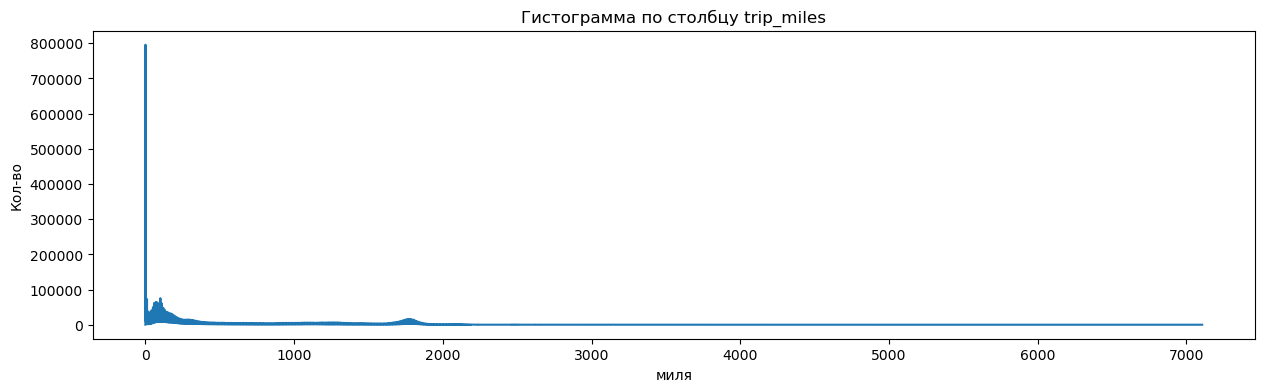

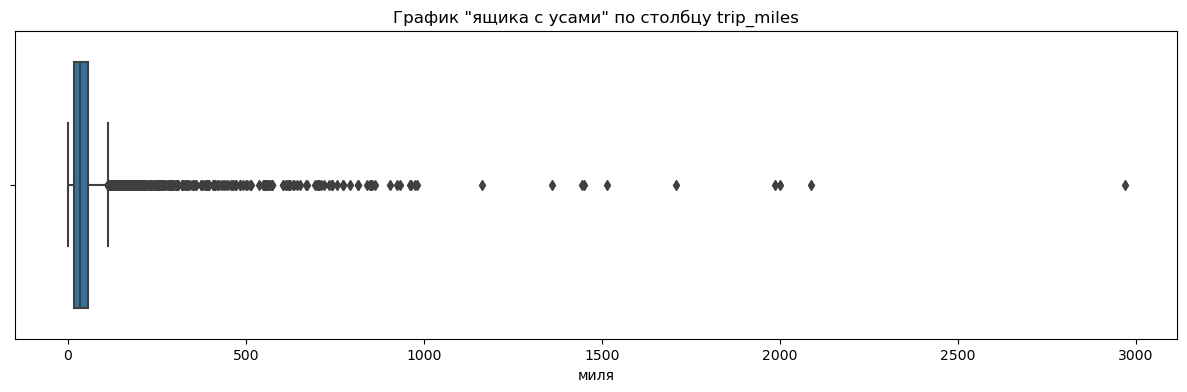

In [37]:
#trip_miles
graph(taxi_2022_sdf, 'trip_miles','миля')

In [38]:
print('Посчитаем процент строк с расстоянием поездки в 0 миль:',
      taxi_2022_sdf.filter('trip_miles = 0').count()/len_data_1 * 100)
a = 200
print(f'Посчитаем процент строк с расстоянием поездки свыше {a} миль:',
      taxi_2022_sdf.filter(f'trip_miles > {a}').count()/len_data_1 * 100)

Посчитаем процент строк с расстоянием поездки в 0 миль: 12.465042675785458
Посчитаем процент строк с расстоянием поездки свыше 200 миль: 0.00354097384614782


Уберем из списка в дальнейшем строки, где расстояние было больше 200 миль.

Наблюдаются поездки с 0 с и 0 миль. В адльнейшем надо будет проверить строки на аномалии характера:
- поездка длилась 0 с, но такси проехало расстояние больше 0 миль.
- Вероятно больше обратная ситуация, когда время такси шло, а она не проехало никакой путь. В этот момент такси могло слишком долго ждать клиента и он мог в итоге отменить поездку, но такси за ожидание заплатил. Однако проверим еще, что вдруг данные в trip_miles и dropoff_community_area не равны при данной случае.

In [39]:
(
    taxi_2022_sdf
    .filter('trip_seconds  = 0')
    .filter('trip_miles  = 0')
    .filter('pickup_community_area != dropoff_community_area')
    .count()/len_data_1 * 100
)

0.01793988961875776

0.017% строк содержит инфомрацию о том, что такси сменило зону, но при это пробыла в пути 0 секунд и 0 миль. есть предположение, что зоны находятся рядом и произошло неудачное округление в сторону 0. Однако предлагается данные строки удалить на этапе предобработки.

In [40]:
(
    taxi_2022_sdf
    .filter('trip_seconds  > 0')
    .filter('trip_miles  = 0')
    .filter('pickup_community_area != dropoff_community_area')
    .count()/len_data_1 * 100
)

5.048143926485622

5% говорит о том, что такси проехало расстояние 0 миль, но сменило при этом зону. Вероятно зоны находились рядом и система округлила в сторону нуля.

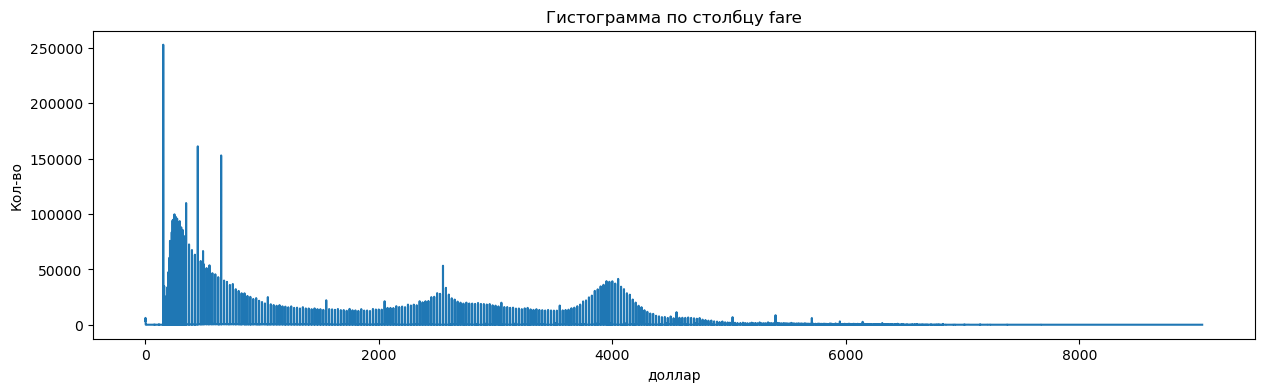

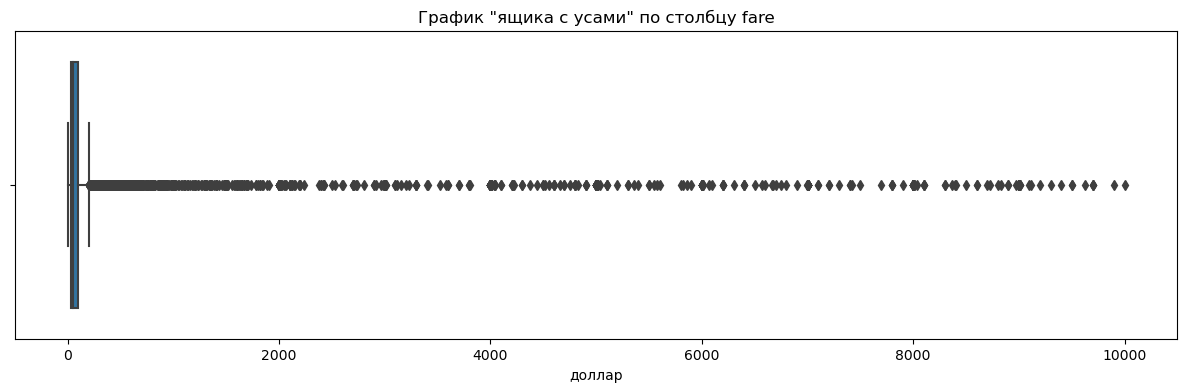

In [41]:
#fare
graph(taxi_2022_sdf, 'fare','доллар')

In [42]:
print('Посчитаем процент строк для стоимости проезда в поездке в 0 долларов:',
      taxi_2022_sdf.filter('fare = 0').count()/len_data_1 * 100)
a = 150
print(f'Посчитаем процент строк для стоимости проезда в поездке свыше {a} долларов:',
      taxi_2022_sdf.filter(f'fare > {a}').count()/len_data_1 * 100)

Посчитаем процент строк для стоимости проезда в поездке в 0 долларов: 0.09635835908765086
Посчитаем процент строк для стоимости проезда в поездке свыше 150 долларов: 0.06082327641922936


Наблюдается выбросы по большим значениям оплаты за проезд, но  кол-во их небольшое. Вероятно это поездки за пределы Чикаго. Выбросим поездки свыше 150 долларов.

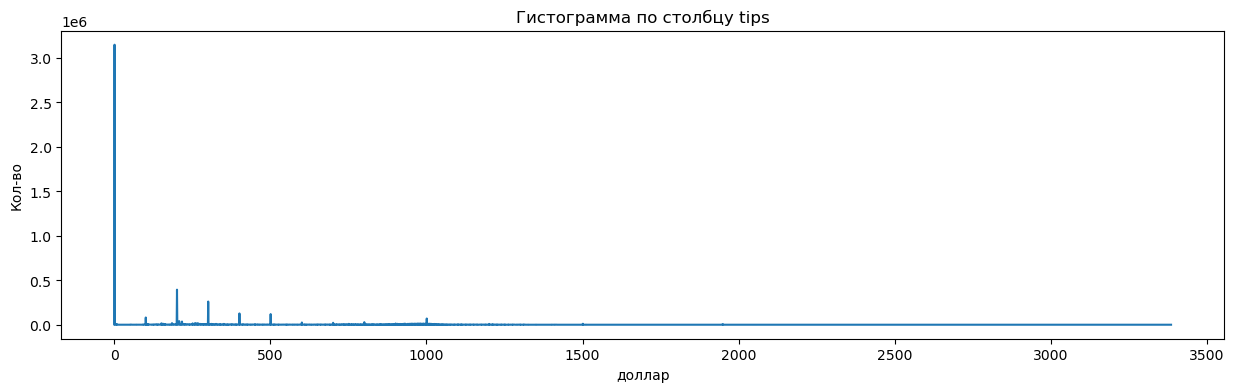

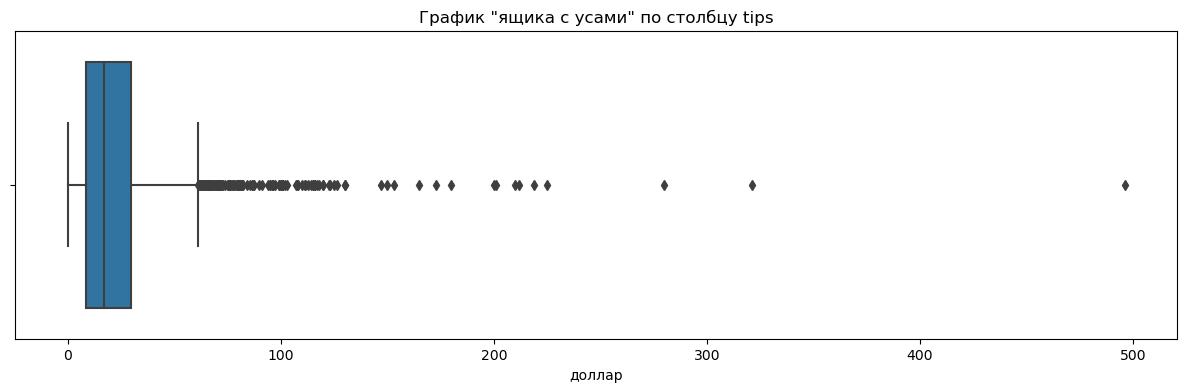

In [43]:
#tips
graph(taxi_2022_sdf, 'tips','доллар')

In [44]:
print('Посчитаем процент строк для чаевых за поездку в 0 долларов:',
      taxi_2022_sdf.filter('tips = 0').count()/len_data_1 * 100)
a = 20
print(f'Посчитаем процент строк для чаевых за поездку свыше {a} долларов:',
      taxi_2022_sdf.filter(f'tips > {a}').count()/len_data_1 * 100)

Посчитаем процент строк для чаевых за поездку в 0 долларов: 49.31970215082825
Посчитаем процент строк для чаевых за поездку свыше 20 долларов: 0.30090443679322515


Выбросим строки с чаевыми свыше 20 долларов. В дальнейшем откажемся от данного столбца, так как столбец Trip Total и так будет всебе содержать информацию об чаевых.

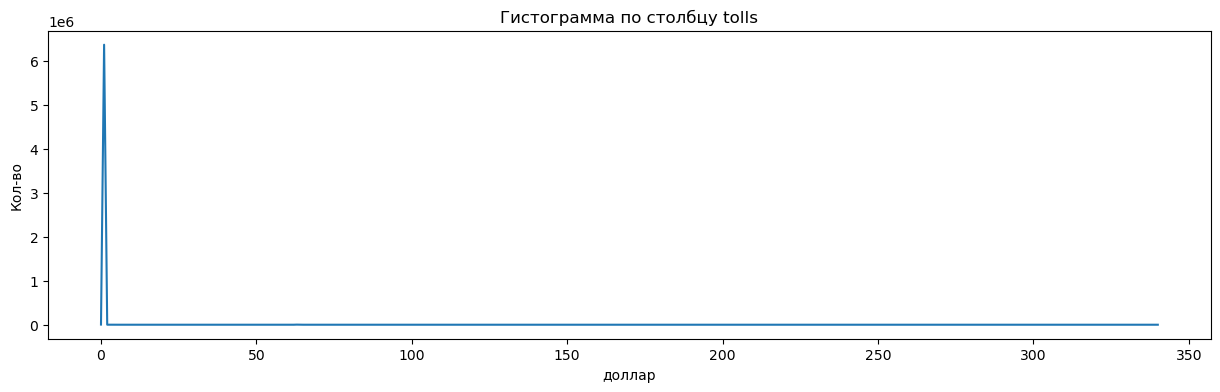

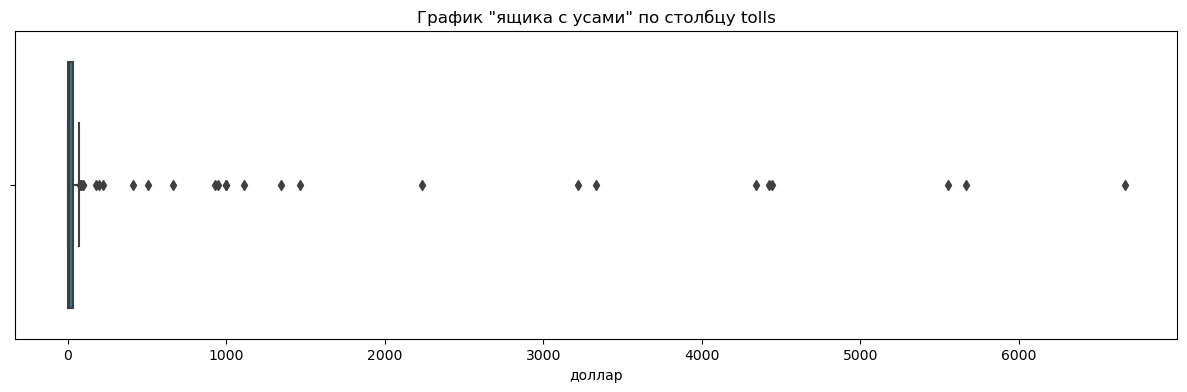

In [45]:
#tolls
graph(taxi_2022_sdf, 'tolls','доллар')

In [46]:
print('Посчитаем процент строк для стоимости проезда  в 0 долларов:',
      taxi_2022_sdf.filter('tolls = 0').count()/len_data_1 * 100)
a = 100
print(f'Посчитаем процент строк для стоимости проезда свыше {a} долларов:',
      taxi_2022_sdf.filter(f'tolls > {a}').count()/len_data_1 * 100)

Посчитаем процент строк для стоимости проезда  в 0 долларов: 99.75150510973494
Посчитаем процент строк для стоимости проезда свыше 100 долларов: 0.0005170448536410534


Болльшое кол-во строк с знаечнием 0. Данный столбец особой пользы для нас не представляет, так как не вносит дополнительную инфомрацию и на итоговую сумму особенно не влияет, хотя корреляция будет наблюдаться. В дальнейшем избавимся от данного столбца.

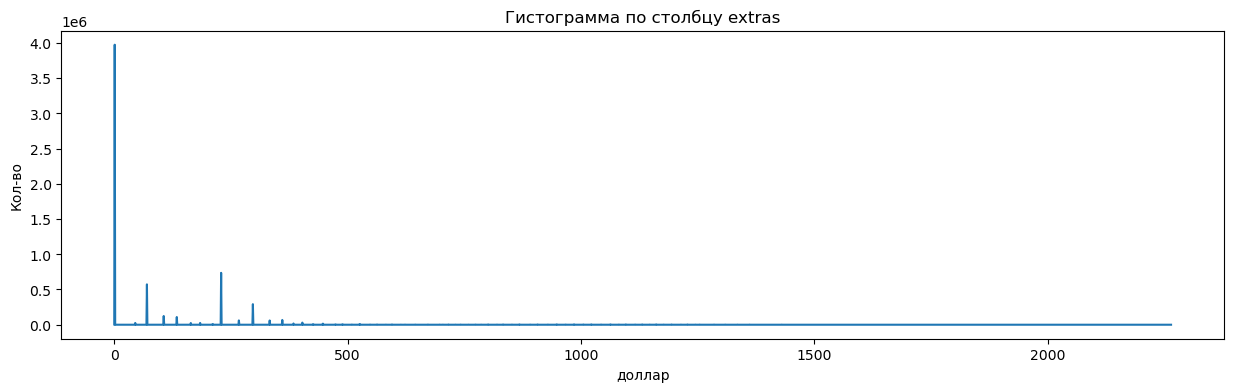

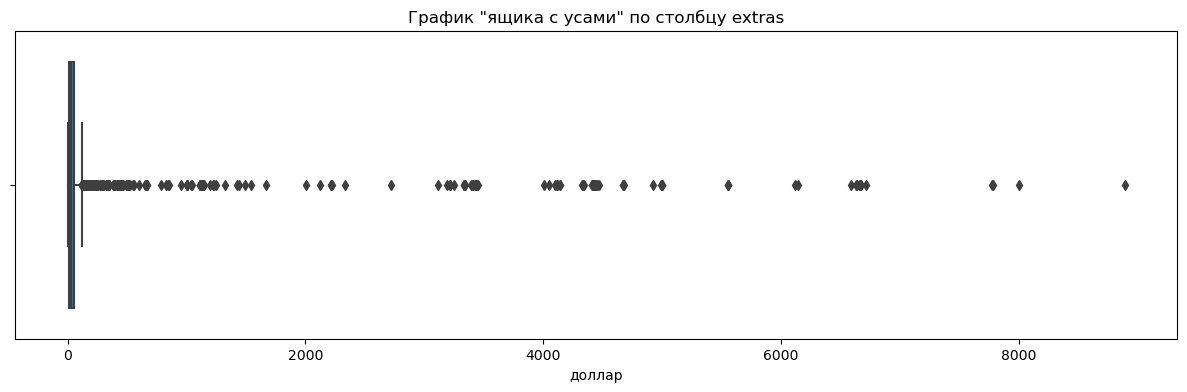

In [47]:
#Extras 
graph(taxi_2022_sdf, 'extras','доллар')

In [48]:
print('Посчитаем процент строк для дополнительной платы в 0 долларов:',
      taxi_2022_sdf.filter('extras = 0').count()/len_data_1 * 100)
a = 35
print(f'Посчитаем процент строк для дополнительной платы свыше {a} долларов:',
      taxi_2022_sdf.filter(f'extras > {a}').count()/len_data_1 * 100)

Посчитаем процент строк для дополнительной платы в 0 долларов: 62.25525564342706
Посчитаем процент строк для дополнительной платы свыше 35 долларов: 0.7486339439946416


Болльшое кол-во строк с знаечнием 0. Данный столбец особой пользы для нас не представляет, так как не вносит дополнительную инфомрацию и на итоговую сумму особенно не влияет, хотя корреляция будет наблюдаться. В дальнейшем избавимся от данного столбца. Выбросим строки  свыше 35 долларов.

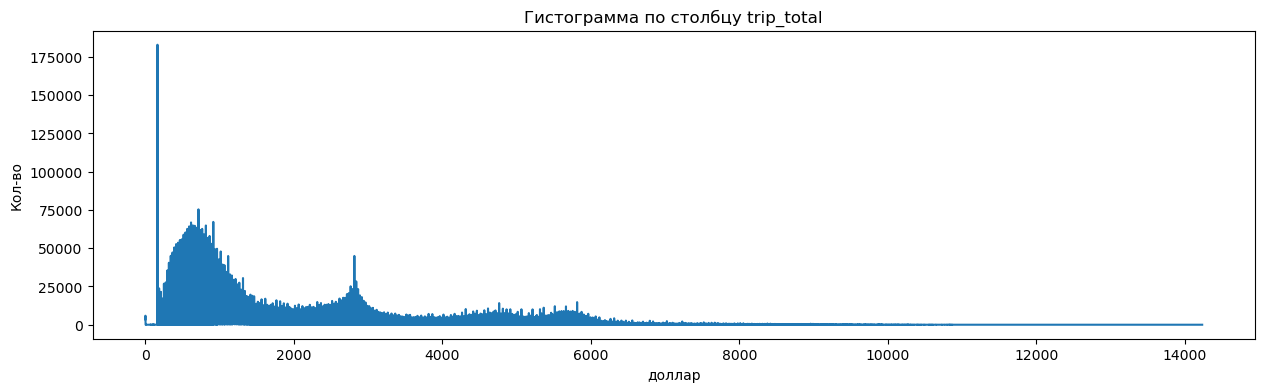

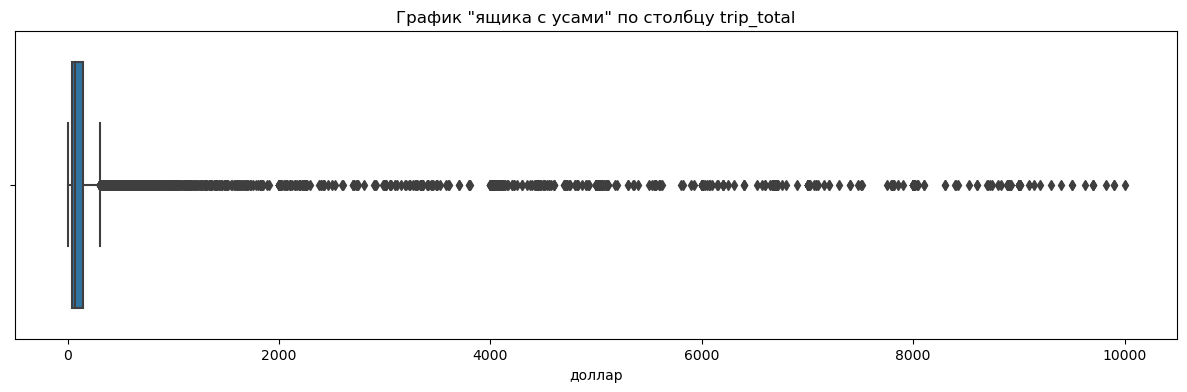

In [49]:
#Trip Total
graph(taxi_2022_sdf, 'trip_total','доллар')

In [50]:
print('Посчитаем процент строк для общей стоимости поездки в 0 долларов:',
      taxi_2022_sdf.filter('trip_total = 0').count()/len_data_1 * 100)
a = 150
print(f'Посчитаем процент строк для общей стоимости поездки свыше {a}:',
      taxi_2022_sdf.filter(f'trip_total > {a}').count()/len_data_1 * 100)

Посчитаем процент строк для общей стоимости поездки в 0 долларов: 0.09215932815505078
Посчитаем процент строк для общей стоимости поездки свыше 150: 0.17714270046259847


Избавимся от строк, где стоимость поездки общей была выше 100 долларов.

**Корреляция между данными:**

Построим матрицу корреляции на 10% данных датафрейма

Построение графиков


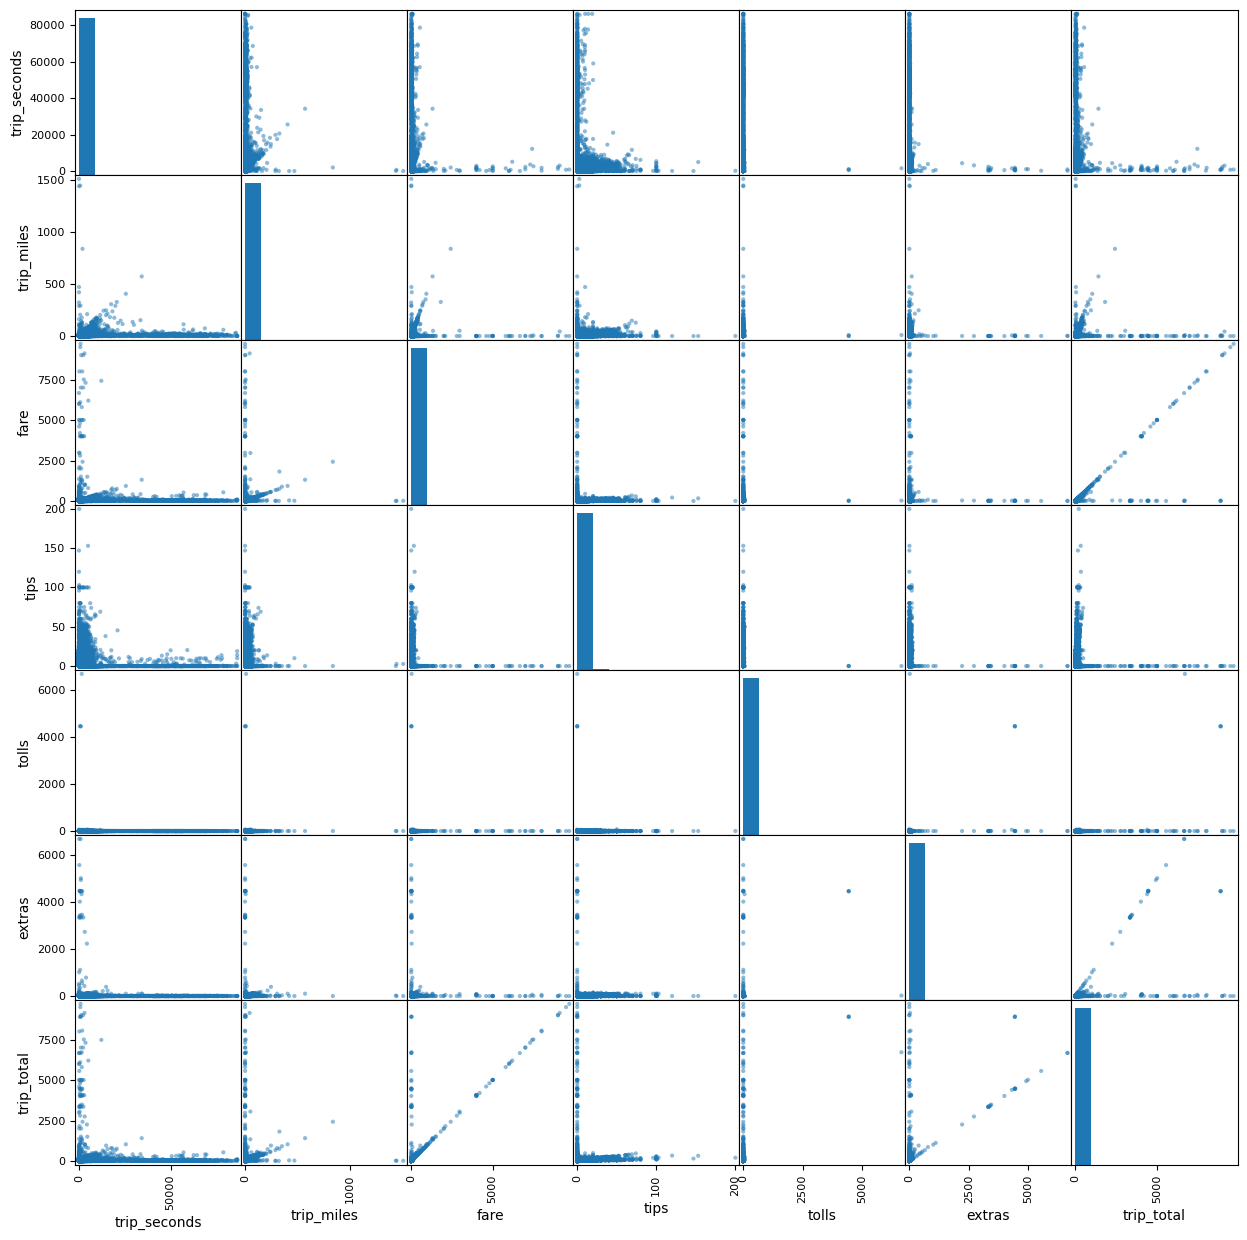

In [51]:
print('Построение графиков')
data_corr_2022 = taxi_2022_sdf.select(
    f.col('trip_seconds'),
    f.col('trip_miles'),
    f.col('fare'),
    f.col('tips'),
    f.col('tolls'),
    f.col('extras'),
    f.col('trip_total')).sample(False, 0.1).toPandas()
pd.plotting.scatter_matrix(data_corr_2022, figsize=(15, 15))
plt.show();
print('');

In [52]:
print('Посчет корреляции')
display(data_corr_2022.corr())
print('')

Посчет корреляции


trip_seconds  trip_miles      fare      tips     tolls  \
trip_seconds      1.000000    0.340094  0.150001  0.184940 -0.000023   
trip_miles        0.340094    1.000000  0.271639  0.406119  0.000487   
fare              0.150001    0.271639  1.000000  0.164751  0.000139   
tips              0.184940    0.406119  0.164751  1.000000 -0.000855   
tolls            -0.000023    0.000487  0.000139 -0.000855  1.000000   
extras            0.022610    0.065148  0.028056  0.070876  0.264266   
trip_total        0.144385    0.277733  0.836397  0.233215  0.324462   

                extras  trip_total  
trip_seconds  0.022610    0.144385  
trip_miles    0.065148    0.277733  
fare          0.028056    0.836397  
tips          0.070876    0.233215  
tolls         0.264266    0.324462  
extras        1.000000    0.530246  
trip_total    0.530246    1.000000

Наблюдается сильная корреляция между trip_total и fare. На итоговую сумму поездки также влияет дополнительная плата. Есть взаимосвязь между чаевыми и расстояние, которое проехало такси. И присутсвует в значении 0.3 взаимосвязь между сколько по времени такси было в пути и самим расстоянием, которое оно проехало. Однако не скзать, что эти взаимосвязи сильные. Стоит правда учесть, что данные расчет производились на 10 процентах данных от всего датафрейма

In [53]:
del data_corr_2022

#### Датафрейм за 2023 год

Проведем ознакомление с датафреймом такое же как и с 2022 годом

In [54]:
col_data_2 = len(taxi_2023_sdf.columns)
len_data_2 = taxi_2023_sdf.count()
print('Всего столбцов в датафреме спарка:', col_data_2)
print('Всего строк в датафреме спарка:', len_data_2)

Всего столбцов в датафреме спарка: 23
Всего строк в датафреме спарка: 3783730


Столбцов в датафрейме столько же как и в 2022 году. Однако строк меньше. Вероятно связанно с тем, что данные за 2022 год даны не полные. Необходимо будет потом посмотреть какой временной диапазон дан.

In [55]:
taxi_2023_sdf.select(
    f.col('trip_id'),
    f.col('taxi_id'))\
.show(5, False, vertical= True)

-RECORD 0-----------------------------------------------------------------------------------------------------------------------------------
 trip_id | 0fca59218b11688279d795c03c4d16f851f13fa0                                                                                         
 taxi_id | e2c349c7cbb608d552aa0b5814031943f13641ef9e50d86361d598aa3277fc35fabc76bd437f793774e6deaa6f2a0f29b8a87b0cf22b5a27b6c10f6f5ed614ae 
-RECORD 1-----------------------------------------------------------------------------------------------------------------------------------
 trip_id | 1e539d6e7501164c6b76b761c3152c235e206d59                                                                                         
 taxi_id | 4ab7a7510c1ebcc9b2e3eaa7bdd6508dbea34da7986aca2d8478bb55d1eabf707cda06384ba05783521e50bd5c027c95e6feda8af5eb623f31aceb1c9cf7c6cf 
-RECORD 2-----------------------------------------------------------------------------------------------------------------------------------
 trip_id | 2b

In [56]:
taxi_2023_sdf.select(
    f.col('trip_start_timestamp'),
    f.col('trip_end_timestamp'),
    f.col('trip_seconds'),
    f.col('trip_miles'),
    f.col('pickup_census_tract'),
    f.col('dropoff_census_tract'),
    f.col('pickup_community_area'),
    f.col('dropoff_community_area'))\
.show(20,False)

+----------------------+----------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+
|trip_start_timestamp  |trip_end_timestamp    |trip_seconds|trip_miles|pickup_census_tract|dropoff_census_tract|pickup_community_area|dropoff_community_area|
+----------------------+----------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+
|01/01/2023 12:00:00 AM|01/01/2023 12:15:00 AM|1037.0      |4.82      |null               |null                |6                    |32                    |
|01/01/2023 12:00:00 AM|01/01/2023 12:15:00 AM|1341.0      |16.63     |null               |null                |76                   |8                     |
|01/01/2023 12:00:00 AM|01/01/2023 12:15:00 AM|844.0       |3.84      |null               |null                |24                   |8                     |
|01/01/2023 12:00:00 AM|01/01/2023 12:00:00 AM|361.0

In [57]:
taxi_2023_sdf.select(
    f.col('fare'),
    f.col('tips'),
    f.col('tolls'),
    f.col('extras'),
    f.col('trip_total'),
    f.col('payment_type'),
    f.col('company'),
    f.col('pickup_centroid_latitude'),
    f.col('pickup_centroid_longitude'))\
.show(20,False)

+-----+-----+-----+------+----------+------------+------------------------------------+------------------------+-------------------------+
|fare |tips |tolls|extras|trip_total|payment_type|company                             |pickup_centroid_latitude|pickup_centroid_longitude|
+-----+-----+-----+------+----------+------------+------------------------------------+------------------------+-------------------------+
|15.75|3.25 |0.0  |0.0   |19.5      |Credit Card |Taxicab Insurance Agency Llc        |41.944226601            |-87.655998182            |
|41.5 |5.0  |0.0  |6.0   |53.0      |Credit Card |Sun Taxi                            |41.980264315            |-87.913624596            |
|16.14|4.03 |0.0  |0.0   |20.17     |Mobile      |Sun Taxi                            |41.901206994            |-87.676355989            |
|5.5  |0.0  |0.0  |1.0   |6.5       |Cash        |5 Star Taxi                         |41.878865584            |-87.625192142            |
|7.75 |0.0  |0.0  |0.0   |7

In [58]:
taxi_2023_sdf.select(
    f.col('pickup_centroid_location'),
    f.col('dropoff_centroid_latitude'),
    f.col('dropoff_centroid_longitude'),
    f.col('dropoff_centroid_location'))\
.show(20,False)

+------------------------------------+-------------------------+--------------------------+------------------------------------+
|pickup_centroid_location            |dropoff_centroid_latitude|dropoff_centroid_longitude|dropoff_centroid_location           |
+------------------------------------+-------------------------+--------------------------+------------------------------------+
|POINT (-87.6559981815 41.9442266014)|41.878865584             |-87.625192142             |POINT (-87.6251921424 41.8788655841)|
|POINT (-87.913624596 41.9802643146) |41.899602111             |-87.633308037             |POINT (-87.6333080367 41.899602111) |
|POINT (-87.6763559892 41.9012069941)|41.899602111             |-87.633308037             |POINT (-87.6333080367 41.899602111) |
|POINT (-87.6251921424 41.8788655841)|41.878865584             |-87.625192142             |POINT (-87.6251921424 41.8788655841)|
|POINT (-87.7215590627 41.968069)    |41.968069                |-87.721559063             |POINT 

**Кол-во пропущенных значений в каждом столбце**

In [59]:
display(null_col(taxi_2023_sdf).sort_values(by=['count'], ascending=False))

name_columns    count    count,%
7         dropoff_census_tract  2166107  57.247927
6          pickup_census_tract  2133498  56.386106
9       dropoff_community_area   364684   9.638214
22   dropoff_centroid_location   341795   9.033282
21  dropoff_centroid_longitude   341795   9.033282
20   dropoff_centroid_latitude   341795   9.033282
8        pickup_community_area   167767   4.433905
19    pickup_centroid_location   166379   4.397222
18   pickup_centroid_longitude   166379   4.397222
17    pickup_centroid_latitude   166379   4.397222
13                      extras     5403   0.142796
14                  trip_total     5403   0.142796
11                        tips     5403   0.142796
12                       tolls     5403   0.142796
10                        fare     5403   0.142796
4                 trip_seconds      718   0.018976
3           trip_end_timestamp       48   0.001269
5                   trip_miles       13   0.000344
1                      taxi_id        0   0.000000
15                payment_type        0   0.000000
16                     company        0   0.000000
2         trip_start_timestamp        0   0.000000
0                      trip_id        0   0.000000

Наблюдаются аналогичные проблемы и пропуски, что и в 2022 году

**Кол-во уникальных значений в каждом столбце**

In [60]:
print(uniq_col(taxi_2023_sdf))

                  name_columns  count_uniq
0                      trip_id     3783730
1                      taxi_id        3189
2         trip_start_timestamp       20349
3           trip_end_timestamp       20368
4                 trip_seconds       12415
5                   trip_miles        6355
6          pickup_census_tract         546
7         dropoff_census_tract         699
8        pickup_community_area          78
9       dropoff_community_area          78
10                        fare        7590
11                        tips        3168
12                       tolls         362
13                      extras        2036
14                  trip_total       12523
15                payment_type           7
16                     company          37
17    pickup_centroid_latitude         538
18   pickup_centroid_longitude         538
19    pickup_centroid_location         539
20   dropoff_centroid_latitude         605
21  dropoff_centroid_longitude         605
22   dropof

In [61]:
print('Уникальные значения в столбце payment_type')
taxi_2023_sdf.select('payment_type').distinct().toPandas()['payment_type']

Уникальные значения в столбце payment_type


0    Credit Card
1      No Charge
2        Unknown
3         Prcard
4           Cash
5        Dispute
6         Mobile
Name: payment_type, dtype: object

В 2023 году отсутсвуют поездки с способом оплаты: Prepaid (предоплачено)

In [62]:
print('Уникальные значения в столбце company')
taxi_2023_sdf.select('company').distinct().toPandas()['company'].sort_values()

Уникальные значения в столбце company


28                 2733 - 74600 Benny Jona
25           312 Medallion Management Corp
0              3556 - 36214 RC Andrews Cab
33                  3591 - 63480 Chuks Cab
2             4053 - 40193 Adwar H. Nikola
29                    4623 - 27290 Jay Kim
27                4787 - 56058 Reny Cab Co
5                              5 Star Taxi
36                 5062 - 34841 Sam Mestas
10              5167 - 71969 5167 Taxi Inc
16             6574 - Babylon Express Inc.
14            Blue Ribbon Taxi Association
35       Blue Ribbon Taxi Association Inc.
34           Chicago City Taxi Association
30                    Chicago Independents
1                          Chicago Taxicab
9                  Choice Taxi Association
20             Choice Taxi Association Inc
32                            City Service
8                                Flash Cab
21                              Globe Taxi
19                   Koam Taxi Association
26                          Leonard Cab Co
18         

Можно заметитьчто компании записаны не корректно и следовательно в данном списке повторяются. Если в дальнейшем придется исследовать популярность компаний, к примеру, то надо будет скорректировать. К примеру:

- Choice Taxi Association и Choice Taxi Association Inc
- Blue Ribbon Taxi Association и Blue Ribbon Taxi Association Inc.
- Taxicab Insurance Agency Llc и Taxicab Insurance Agency, LLC
- Taxi Affiliation Services Llc - Yell и Taxi Affiliation Services
  
Однако информация о названии компании не особо нам пригодится для обучения модели.
Также после того как объединим табицы в одну необходимо посмотреть на итоговые компании. И после корректировки названия ,если необходимо можно изучить какие были в 2022 году и какие работают в 2023 году. 

In [63]:
print('Уникальные значения в столбце pickup_community_area')

taxi_2023_sdf.select('pickup_community_area').distinct().toPandas()['pickup_community_area'].sort_values()

print(
    'Кол-во уникальных значений в столбце pickup_community_area:',
    taxi_2023_sdf.select('pickup_community_area').distinct().count()
)

Уникальные значения в столбце pickup_community_area
Кол-во уникальных значений в столбце pickup_community_area: 78


Представлены все зоны

**Общая инфорация по столбцам**

In [64]:
taxi_2023_sdf.describe('trip_seconds',
                       'trip_miles',
                       'fare',
                       'tips',
                       'tolls',
                       'extras',
                       'trip_total').toPandas()

summary        trip_seconds          trip_miles                fare  \
0   count             3783012             3783717             3778327   
1    mean  1235.3278387697421  6.4712331951675335   21.99551950206311   
2  stddev  1736.5661018295189  7.5933104426805915  22.233947263479642   
3     min                 0.0                 0.0                 0.0   
4     max             86340.0               945.4             9999.75   

                 tips                tolls              extras  \
0             3778327              3778327             3778327   
1  2.9263806635218925  0.05000318387212167  2.2418538840193665   
2  4.2004119396822555    11.56986943960635   19.47903841241146   
3                 0.0                  0.0                 0.0   
4               375.0              6666.66             9446.65   

          trip_total  
0            3778327  
1  27.37113484552593  
2  37.03373570169992  
3                0.0  
4            9999.75

Наблюдаются аномальные поездки с большим расстоянием,временем и стоимостью. Посмотрим на распределение знаечний за 2023 год. Рассмотренные раннее пропущенные значения не повлияют на наши наблюдения, так как нами было принято удалить данные строки.

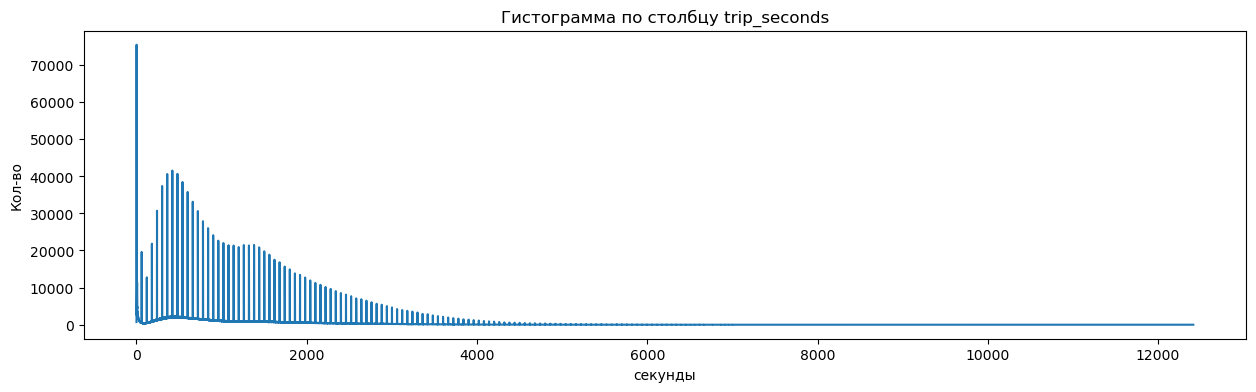

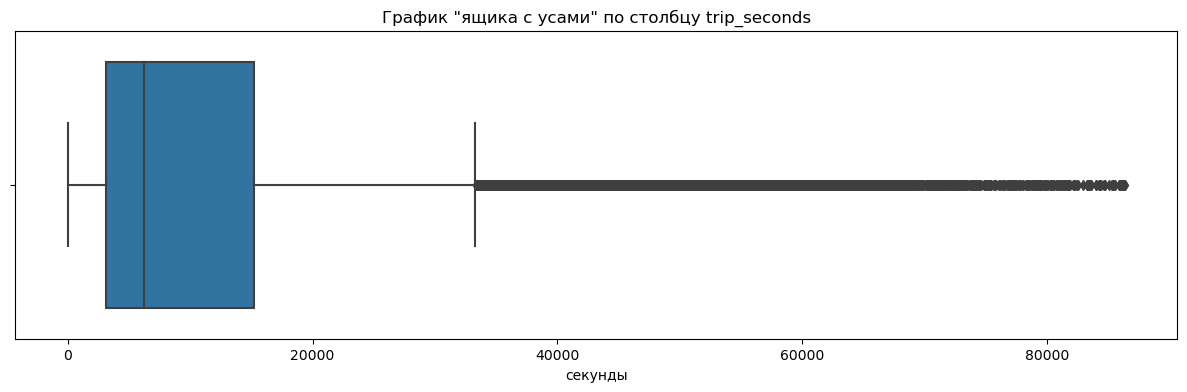

In [65]:
#trip_seconds
graph(taxi_2023_sdf,'trip_seconds','секунды')

In [66]:
print('Посчитаем процент строк с длительностью поездки 0 секунд:',
      taxi_2023_sdf.filter('trip_seconds = 0').count()/len_data_2 * 100)

Посчитаем процент строк с длительностью поездки 0 секунд: 1.9937997690110023


Предлагается данные строки оставить, так как они могут быть полезны для обучения. Ведь информация о том, что поездка не состоялась тоже важна.

In [67]:
a = 6000
print(f'Посчитаем процент строк с длительностью поездки свыше {a} секунд :',
      taxi_2023_sdf.filter(f'trip_seconds > {a}').count()/len_data_2 * 100)

Посчитаем процент строк с длительностью поездки свыше 6000 секунд : 0.275971065588718


Предлагается удалить поездкт свыше 6000 секунд. Их не очень много и сильно не должны повлиять на наше будущее обучение модели.

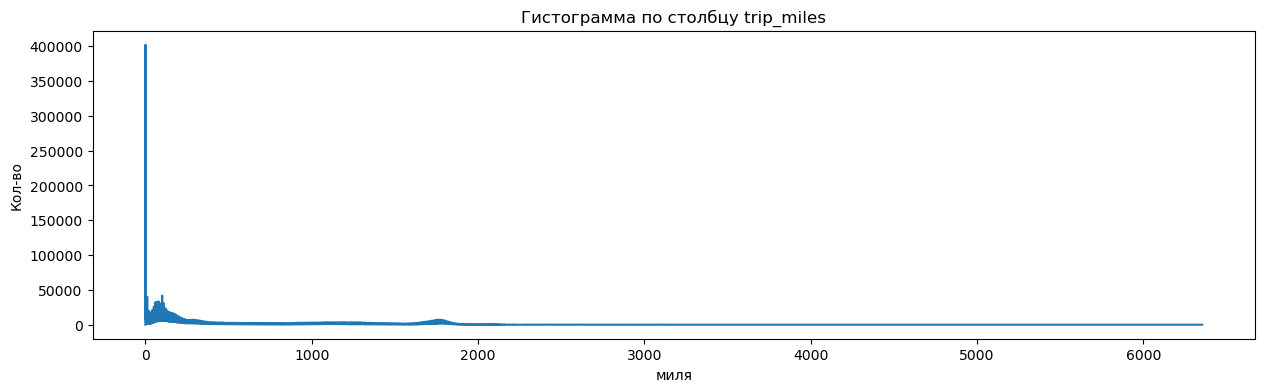

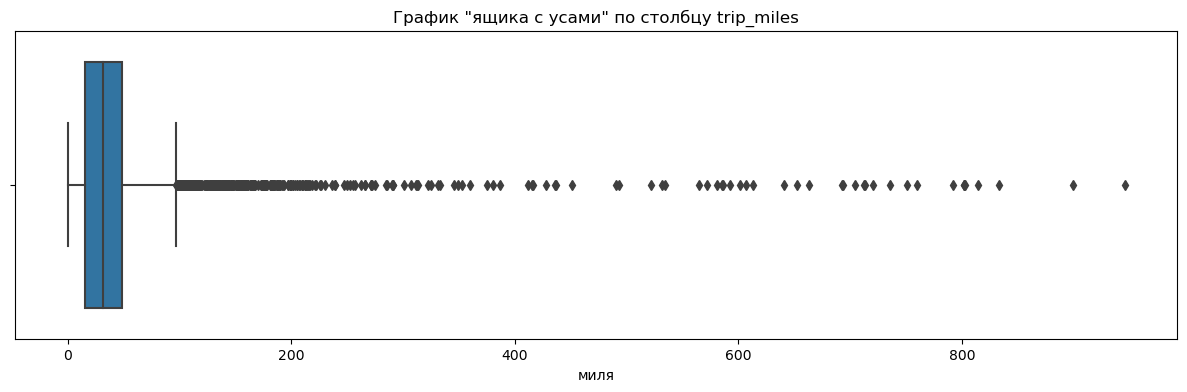

In [68]:
#trip_miles
graph(taxi_2023_sdf, 'trip_miles','миля')

In [69]:
print('Посчитаем процент строк с расстоянием поездки в 0 миль:',
      taxi_2023_sdf.filter('trip_miles = 0').count()/len_data_2 * 100)
a = 50
print(f'Посчитаем процент строк с расстоянием поездки свыше {a} миль:',
      taxi_2023_sdf.filter(f'trip_miles > {a}').count()/len_data_2 * 100)

Посчитаем процент строк с расстоянием поездки в 0 миль: 10.622454562032702
Посчитаем процент строк с расстоянием поездки свыше 50 миль: 0.051695020522077424


Уберем из списка в дальнейшем строки, где расстояние было больше 50 миль.

Наблюдаются поездки с 0 с и 0 миль. В адльнейшем надо будет проверить строки на аномалии характера:
- поездка длилась 0 с, но такси проехало расстояние больше 0 миль.
- Вероятно больше обратная ситуация, когда время такси шло, а она не проехало никакой путь. В этот момент такси могло слишком долго ждать клиента и он мог в итоге отменить поездку, но такси за ожидание заплатил. Однако проверим еще, что вдруг данные в trip_miles и dropoff_community_area не равны при данной случае.

In [70]:
(
    taxi_2023_sdf
    .filter('trip_seconds  = 0')
    .filter('trip_miles  = 0')
    .filter('pickup_community_area != dropoff_community_area')
    .count()/len_data_2 * 100
)

0.010888726204036758

0.01% строк содержит инфомрацию о том, что такси сменило зону, но при это пробыла в пути 0 секунд и 0 миль. есть предположение, что зоны находятся рядом и произошло неудачное округление в сторону 0. Однако предлагается данные строки удалить на этапе предобработки.

In [71]:
(
    taxi_2023_sdf
    .filter('trip_seconds  > 0')
    .filter('trip_miles  = 0')
    .filter('pickup_community_area != dropoff_community_area')
    .count()/len_data_2 * 100
)

3.882438757522339

3.8% говорит о том, что такси проехало расстояние 0 миль, но сменило при этом зону. Вероятно зоны находились рядом и система округлила в сторону нуля.

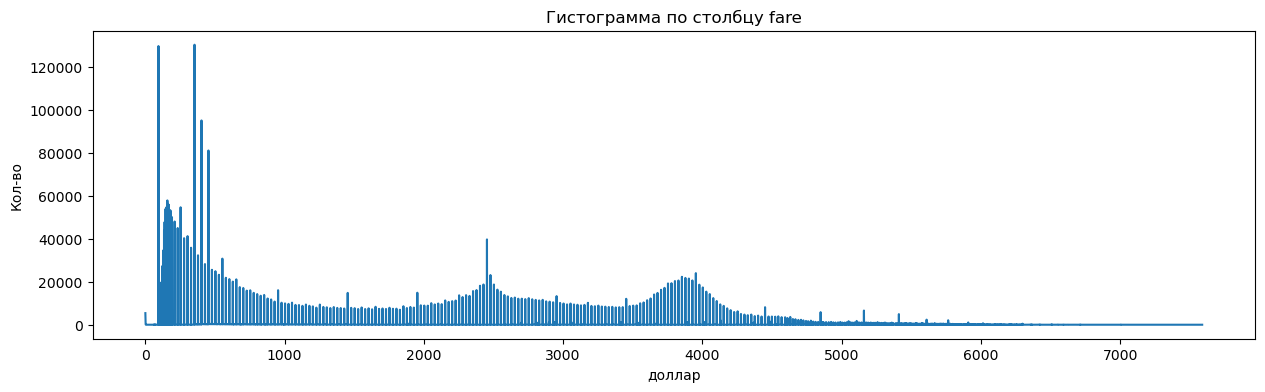

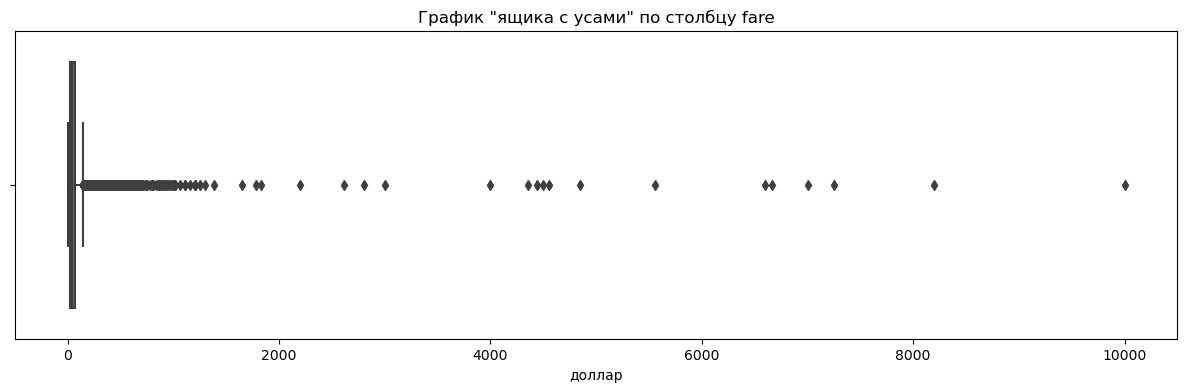

In [72]:
#fare
graph(taxi_2023_sdf, 'fare','доллар')

In [73]:
print('Посчитаем процент строк для стоимости проезда в поездке в 0 долларов:',
      taxi_2023_sdf.filter('fare = 0').count()/len_data_2 * 100)
a = 150
print(f'Посчитаем процент строк для стоимости проезда в поездке свыше {a} долларов:',
      taxi_2023_sdf.filter(f'fare > {a}').count()/len_data_2 * 100)

Посчитаем процент строк для стоимости проезда в поездке в 0 долларов: 0.07764824657150483
Посчитаем процент строк для стоимости проезда в поездке свыше 150 долларов: 0.0566900915234438


Наблюдается выбросы по большим значениям оплаты за проезд, но  кол-во их небольшое. Вероятно это поездки за пределы Чикаго. Выбросим поездки свыше 150 долларов.

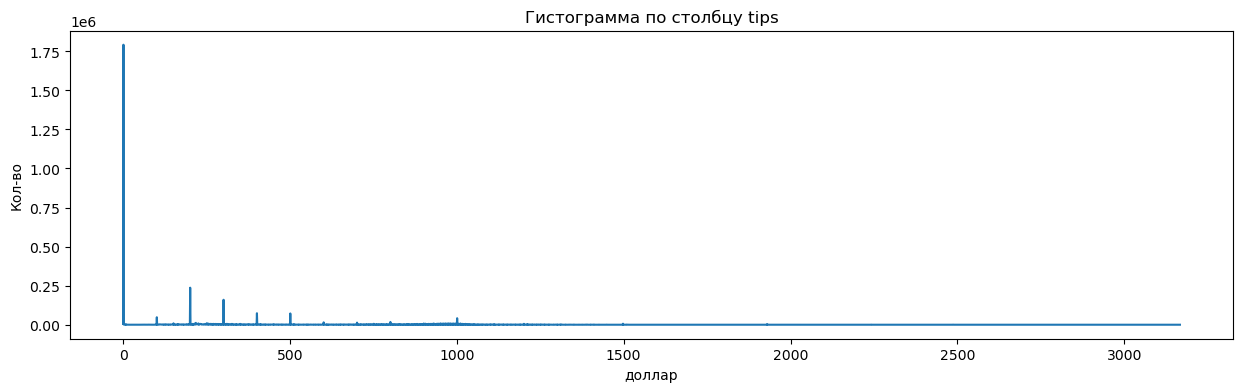

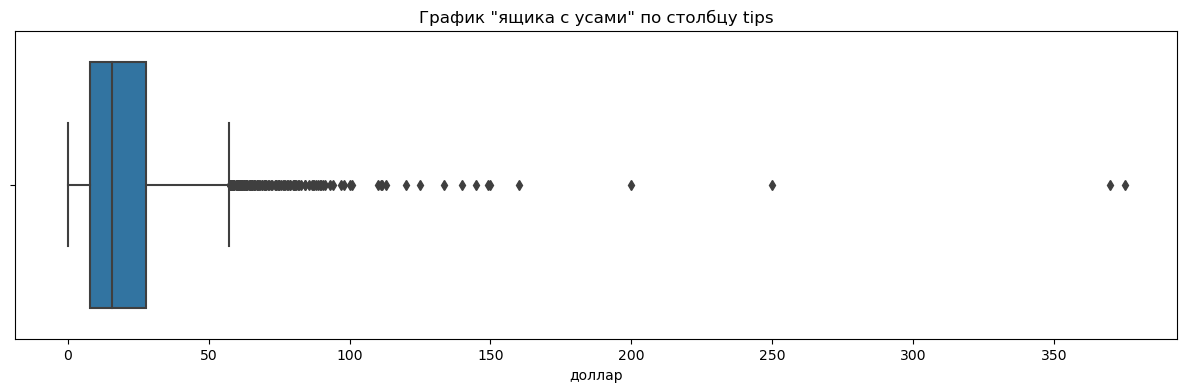

In [74]:
#tips
graph(taxi_2023_sdf, 'tips','доллар')

In [75]:
print('Посчитаем процент строк для чаевых за поездку в 0 долларов:',
      taxi_2023_sdf.filter('tips = 0').count()/len_data_2 * 100)
a = 20
print(f'Посчитаем процент строк для чаевых за поездку свыше {a} долларов:',
      taxi_2023_sdf.filter(f'tips > {a}').count()/len_data_2 * 100)

Посчитаем процент строк для чаевых за поездку в 0 долларов: 47.35327309295325
Посчитаем процент строк для чаевых за поездку свыше 20 долларов: 0.3337711728902432


Выбросим строки с чаевыми свыше 20 долларов. В дальнейшем откажемся от данного столбца, так как столбец Trip Total и так будет всебе содержать информацию об чаевых.

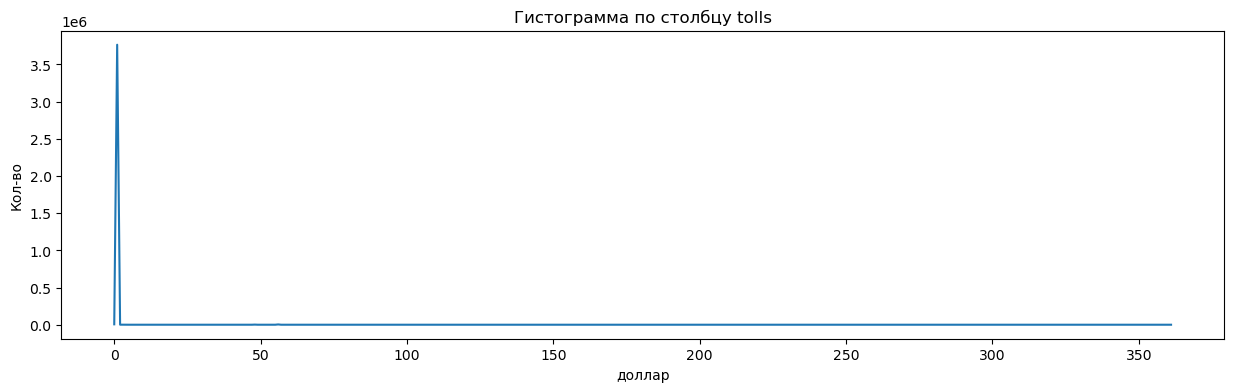

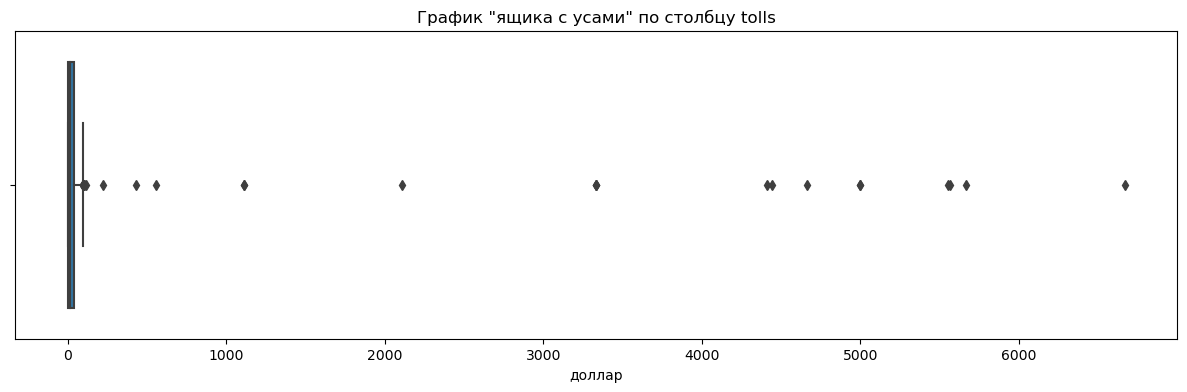

In [76]:
#tolls
graph(taxi_2023_sdf, 'tolls','доллар')

In [77]:
print('Посчитаем процент строк для стоимости проезда  в 0 долларов:',
      taxi_2023_sdf.filter('tolls = 0').count()/len_data_2 * 100)
a = 100
print(f'Посчитаем процент строк для стоимости проезда свыше {a} долларов:',
      taxi_2023_sdf.filter(f'tolls > {a}').count()/len_data_2 * 100)

Посчитаем процент строк для стоимости проезда  в 0 долларов: 99.46769457651577
Посчитаем процент строк для стоимости проезда свыше 100 долларов: 0.0008192973600124744


Болльшое кол-во строк с знаечнием 0. Данный столбец особой пользы для нас не представляет, так как не вносит дополнительную инфомрацию и на итоговую сумму особенно не влияет, хотя корреляция будет наблюдаться. В дальнейшем избавимся от данного столбца.

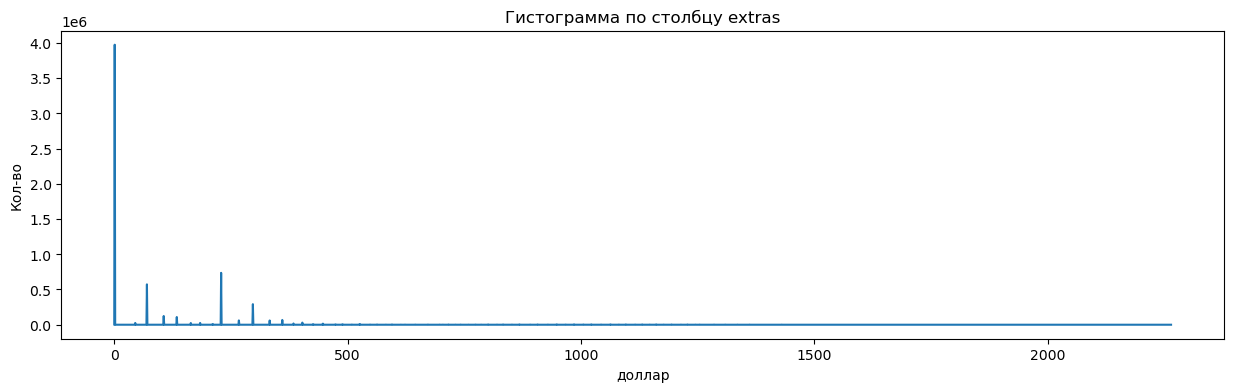

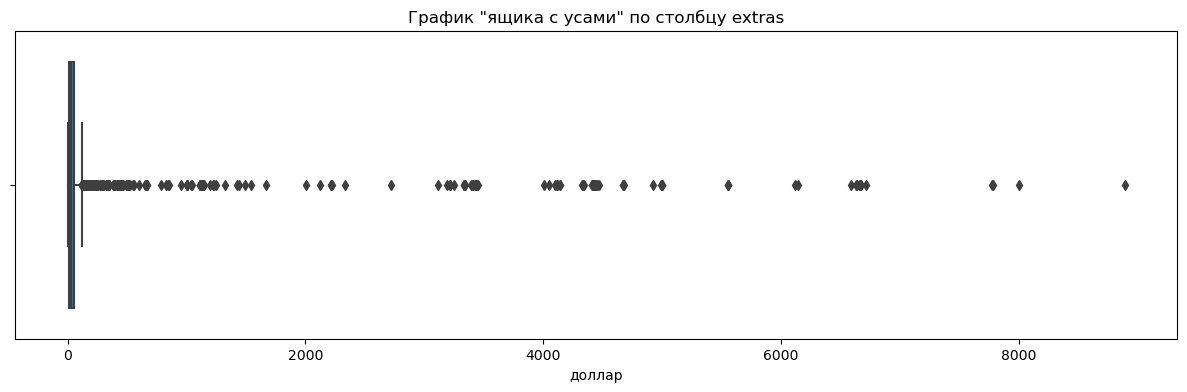

In [78]:
#Extras 
graph(taxi_2022_sdf, 'extras','доллар')

In [79]:
print('Посчитаем процент строк для дополнительной платы в 0 долларов:',
      taxi_2023_sdf.filter('extras = 0').count()/len_data_2 * 100)
a = 50
print(f'Посчитаем процент строк для дополнительной платы свыше {a} долларов:',
      taxi_2023_sdf.filter(f'extras > {a}').count()/len_data_2 * 100)

Посчитаем процент строк для дополнительной платы в 0 долларов: 62.41431074627418
Посчитаем процент строк для дополнительной платы свыше 50 долларов: 0.23875910807589334


Болльшое кол-во строк с знаечнием 0. Данный столбец особой пользы для нас не представляет, так как не вносит дополнительную инфомрацию и на итоговую сумму особенно не влияет, хотя корреляция будет наблюдаться. В дальнейшем избавимся от данного столбца. Выбросим строки  свыше 50 долларов.

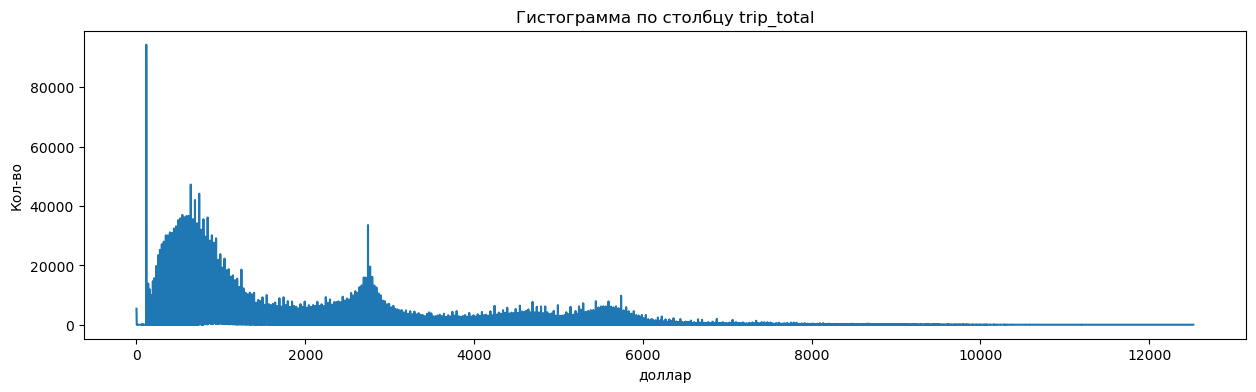

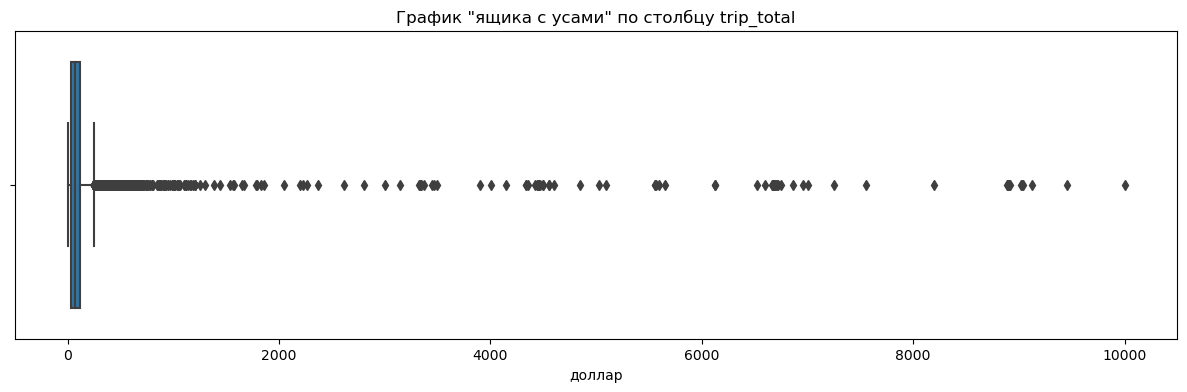

In [80]:
#Trip Total
graph(taxi_2023_sdf, 'trip_total','доллар')

In [81]:
print('Посчитаем процент строк для общей стоимости поездки в 0 долларов:',
      taxi_2023_sdf.filter('trip_total = 0').count()/len_data_2 * 100)
a = 150
print(f'Посчитаем процент строк для общей стоимости поездки свыше {a}:',
      taxi_2023_sdf.filter(f'trip_total > {a}').count()/len_data_2 * 100)

Посчитаем процент строк для общей стоимости поездки в 0 долларов: 0.07534892817405048
Посчитаем процент строк для общей стоимости поездки свыше 150: 0.1823861639176157


Избавимся от строк, где стоимость поездки общей была выше 150 долларов.

**Корреляция между данными:**

Построим матрицу корреляции на 10% данных датафрейма

Построение графиков


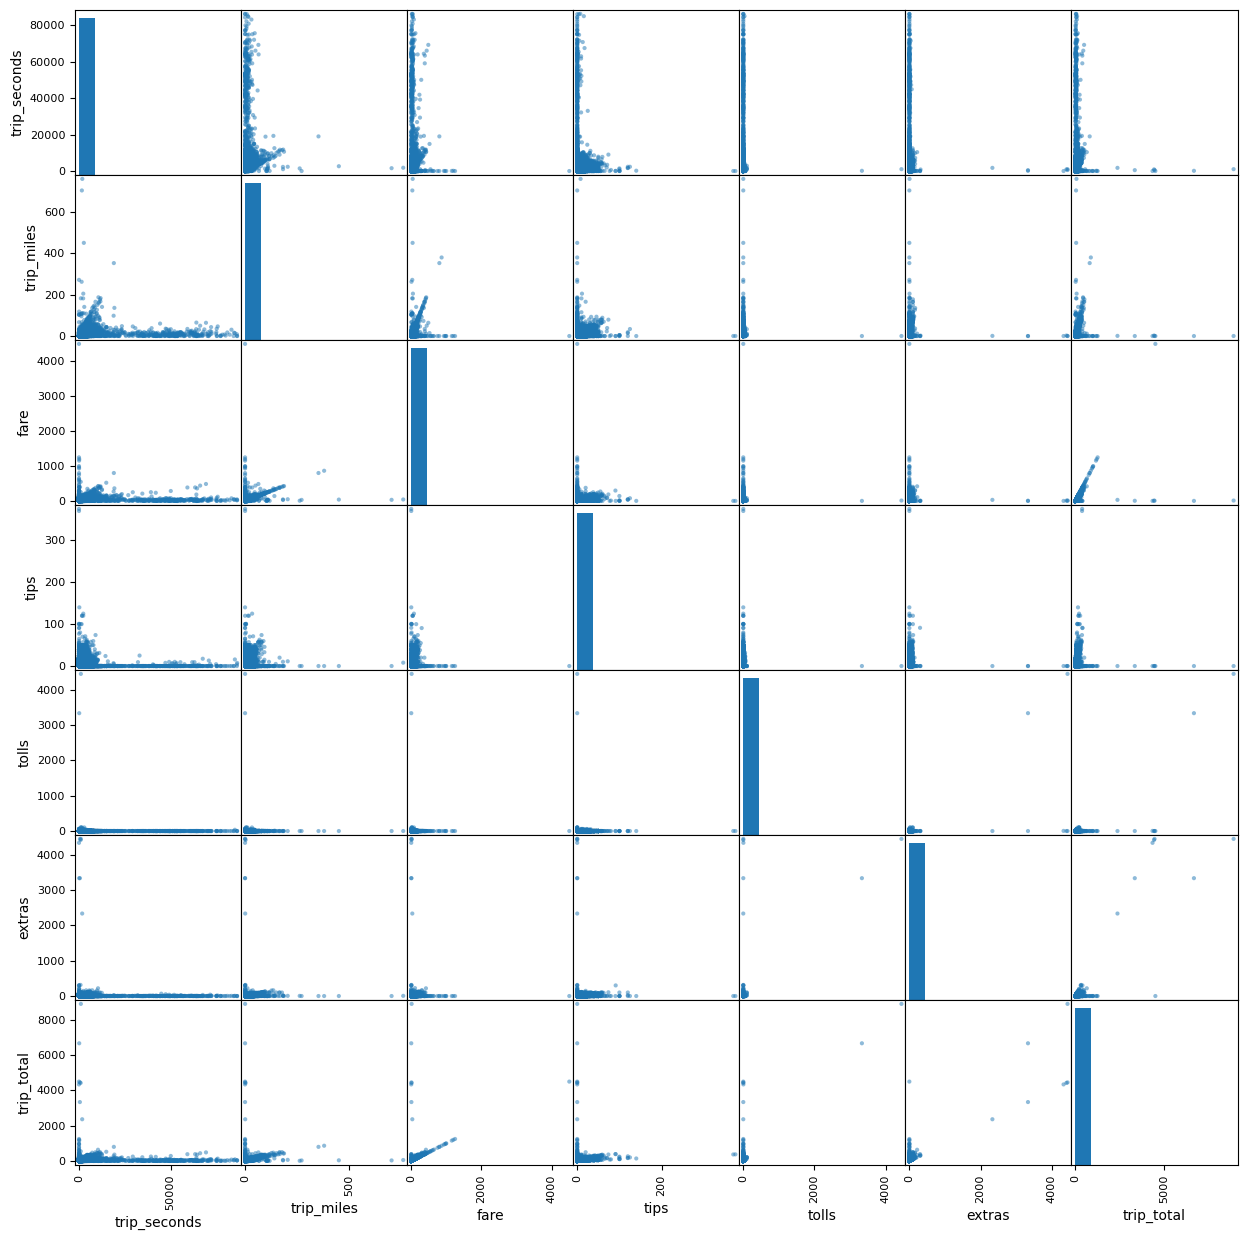

In [82]:
print('Построение графиков')
data_corr_2023 = taxi_2023_sdf.select(
    f.col('trip_seconds'),
    f.col('trip_miles'),
    f.col('fare'),
    f.col('tips'),
    f.col('tolls'),
    f.col('extras'),
    f.col('trip_total')).sample(False, 0.1).toPandas()
pd.plotting.scatter_matrix(data_corr_2023, figsize=(15, 15))
plt.show();
print('');

In [83]:
print('Посчет корреляции')
display(data_corr_2023.corr())
print('')

Посчет корреляции


trip_seconds  trip_miles      fare      tips     tolls  \
trip_seconds      1.000000    0.401807  0.400892  0.207844  0.000150   
trip_miles        0.401807    1.000000  0.711035  0.441534  0.000762   
fare              0.400892    0.711035  1.000000  0.440362  0.000676   
tips              0.207844    0.441534  0.440362  1.000000  0.000955   
tolls             0.000150    0.000762  0.000676  0.000955  1.000000   
extras            0.039095    0.114839  0.102320  0.122831  0.508155   
trip_total        0.282288    0.536257  0.698945  0.453399  0.534811   

                extras  trip_total  
trip_seconds  0.039095    0.282288  
trip_miles    0.114839    0.536257  
fare          0.102320    0.698945  
tips          0.122831    0.453399  
tolls         0.508155    0.534811  
extras        1.000000    0.737219  
trip_total    0.737219    1.000000

In [84]:
del data_corr_2023

Наблюдается более сильная взаимосвязь между trip_total и fare,tips,tolls,extras.

Однако, стоит учесть, что данные корреляции были рассмотрены только на 10% процентах датасета.

#### Вывод по пункту 2.1.

На оснвании представленных данных можно выделить следующее:
- датасет за 2022 содержит  6382425 строк и 23 столбца
- датасет за 2023 содержит  3783730 строк и 23 столбца
- столбцы trip_start_timestamp и trip_end_timestamp перевести в тип данных timestamp и уйти от AM/PM к 24ч
- удалить столбцы: pickup_centroid_latitude, pickup_centroid_latitude, pickup_centroid_longitude, pickup_centroid_location, dropoff_centroid_latitude, dropoff_centroid_longitude, dropoff_centroid_location, trip_id, pickup_census_tract, dropoff_census_tract, taxi_id
- пустые знаечния в pickup_community_area и dropoff_community_area заполнить нулями.
- удалить строки в столбцах которых присуствуеют пропуски: extras, trip_total, tips, tolls, fare, trip_seconds, trip_miles
- В датасет за 2022 переименоват компании:
  - Blue Ribbon Taxi Association и Blue Ribbon Taxi Association Inc.
  - Taxicab Insurance Agency Llc и Taxicab Insurance Agency, LLC
  - KOAM Taxi Association и Koam Taxi Association
- В датасет за 2023 переименоват компании:
  - Choice Taxi Association и Choice Taxi Association Inc
  - Blue Ribbon Taxi Association и Blue Ribbon Taxi Association Inc.
  - Taxicab Insurance Agency Llc и Taxicab Insurance Agency, LLC
  - Taxi Affiliation Services Llc - Yell и Taxi Affiliation Services
- В датасет за 2022 выполнить фильтрацию и оставить следующие значения:
  -  trip_seconds < 5000
  -  trip_miles < 200
  -  fare < 150
  -  tips < 20
  -  tolls < 100
  -  extras < 35
  -  trip_total < 150
- В датасет за 2023 выполнить фильтрацию и оставить следующие значения:
  -  trip_seconds < 6000
  -  trip_miles < 50
  -  fare < 150
  -  tips < 20
  -  tolls < 100
  -  extras < 50
  -  trip_total < 150
- после фильтрации удалим столбцы fare, tips, tolls, extras, так как trip_total будет нести в себе всю информацию об данных столбцах.

### 2.2 Предварительная обработка данных

1. **Выполним удаление столбцов из датасета за 2022 и 2023**

In [85]:
value = ['pickup_centroid_latitude', 'pickup_centroid_latitude', 'pickup_centroid_longitude',
         'pickup_centroid_location', 'dropoff_centroid_latitude', 'dropoff_centroid_longitude', 
         'dropoff_centroid_location', 'trip_id', 'taxi_id','pickup_census_tract', 'dropoff_census_tract']

In [86]:
for i in value:
    taxi_2022_sdf = taxi_2022_sdf.drop(i)
    taxi_2023_sdf = taxi_2023_sdf.drop(i)

2. **Удалим строки с пустым значением в столбцах extras, trip_total, tips, tolls, fare, trip_seconds, trip_end_timestamp, trip_miles**

In [87]:
taxi_2022_sdf = (
    taxi_2022_sdf
    .na.fill(value='unknown',subset=["trip_end_timestamp"])
    .filter('trip_end_timestamp != "unknown"')
)

In [88]:
taxi_2023_sdf = (
    taxi_2023_sdf
    .na.fill(value='unknown',subset=["trip_end_timestamp"])
    .filter('trip_end_timestamp != "unknown"')
)

In [89]:
for i in ['extras','trip_total','tips','tolls','fare','trip_seconds','trip_miles']:
    taxi_2022_sdf = taxi_2022_sdf.dropna(how='any',subset=i)
    taxi_2023_sdf = taxi_2023_sdf.dropna(how='any',subset=i)

3. **Заполним строки с пустым значением в столбцах pickup_community_area и dropoff_community_area**

In [90]:
for i in ['pickup_community_area', 'dropoff_community_area']:
    taxi_2022_sdf = taxi_2022_sdf.fillna(value=0,subset=[i])
    taxi_2023_sdf = taxi_2023_sdf.fillna(value=0,subset=[i])

4. **Перевод времени в столбцах trip_start_timestamp и trip_end_timestamp в тип данных timestamp**

In [91]:
taxi_2022_sdf = taxi_2022_sdf.withColumn(
    "trip_start_timestamp",
    f.to_timestamp("trip_start_timestamp","MM/dd/yyyy hh:mm:ss a")
)

taxi_2022_sdf = taxi_2022_sdf.withColumn(
    "trip_end_timestamp",
    f.to_timestamp("trip_end_timestamp","MM/dd/yyyy hh:mm:ss a")
)

taxi_2023_sdf = taxi_2023_sdf.withColumn(
    "trip_start_timestamp",
    f.to_timestamp("trip_start_timestamp","MM/dd/yyyy hh:mm:ss a")
)

taxi_2023_sdf = taxi_2023_sdf.withColumn(
    "trip_end_timestamp",
    f.to_timestamp("trip_end_timestamp","MM/dd/yyyy hh:mm:ss a")
)

Посмотрим за какой временной диапазон представлены данны за 2022 и 2023 года.

In [92]:
print('Временной диапазон данных за 2022 год')
taxi_2022_sdf.select(f.min('trip_start_timestamp'),f.max('trip_start_timestamp')).show()
taxi_2022_sdf.select(f.min('trip_end_timestamp'),f.max('trip_end_timestamp')).show()
print('')
print('Временной диапазон данных за 2023 год')
taxi_2023_sdf.select(f.min('trip_start_timestamp'),f.max('trip_start_timestamp')).show()
taxi_2023_sdf.select(f.min('trip_end_timestamp'),f.max('trip_end_timestamp')).show()

Временной диапазон данных за 2022 год
+-------------------------+-------------------------+
|min(trip_start_timestamp)|max(trip_start_timestamp)|
+-------------------------+-------------------------+
|      2022-01-01 00:00:00|      2022-12-31 23:45:00|
+-------------------------+-------------------------+

+-----------------------+-----------------------+
|min(trip_end_timestamp)|max(trip_end_timestamp)|
+-----------------------+-----------------------+
|    2022-01-01 00:00:00|    2023-01-01 16:00:00|
+-----------------------+-----------------------+


Временной диапазон данных за 2023 год
+-------------------------+-------------------------+
|min(trip_start_timestamp)|max(trip_start_timestamp)|
+-------------------------+-------------------------+
|      2023-01-01 00:00:00|      2023-08-01 00:00:00|
+-------------------------+-------------------------+

+-----------------------+-----------------------+
|min(trip_end_timestamp)|max(trip_end_timestamp)|
+-----------------------+-----

trip_start_timestamp:
- Данные за 2022 год представлены с  2022-01-01 по 2022-12-31
- Данные за 2023 год представлены с  2023-01-01 по 2023-08-01. Данные за 2023 год не полные.

trip_end_timestamp:
- Данные за 2022 год представлены с  2022-01-01 по 2023-01-01. В данную выборку попали данные за 2023 год
- Данные за 2023 год представлены с  2023-01-01 по 2023-08-01. Данные за 2023 год не полные.

Так нас интересует предсказание с кол-вом заказов на слеующий час, то нам понадобится в trip_start_timestamp и trip_end_timestamp избавится от минут и округлить до ближйшего часа и затем мы посчиатем сколько было сделано заказов в кажом регионе в данное время. Будем работать с столбцом trip_start_timestamp, так как он имеет информацию о времени посадки. Столбец trip_end_timestamp предлагается удалить

5. **Переименование компаний**

In [93]:
taxi_2022_sdf = (
    taxi_2022_sdf
    .withColumn("company",
                f.regexp_replace('company',
                                 'Blue Ribbon Taxi Association Inc.',
                                 'Blue Ribbon Taxi Association')
                )
    .withColumn("company", 
                f.regexp_replace('company', 
                                 'Taxicab Insurance Agency Llc', 
                                 'Taxicab Insurance Agency, LLC')
               )
    .withColumn("company",
                f.regexp_replace('company', 
                                 'Taxicab Insurance Agency Llc',
                                 'Taxicab Insurance Agency, LLC')
                )
    .withColumn("company", 
                f.regexp_replace('company', 
                                 'Koam Taxi Association',
                                 'KOAM Taxi Association')
                )
)

In [94]:
taxi_2023_sdf = (
    taxi_2023_sdf
    .withColumn("company",
                f.regexp_replace('company',
                                 'Blue Ribbon Taxi Association Inc.',
                                 'Blue Ribbon Taxi Association')
                )
    .withColumn("company", 
                f.regexp_replace('company', 
                                 'Choice Taxi Association Inc',
                                 'Choice Taxi Association')
               )
    .withColumn("company",
                f.regexp_replace('company', 
                                 'Taxicab Insurance Agency Llc',
                                 'Taxicab Insurance Agency, LLC')
                )
    .withColumn("company", 
                f.regexp_replace('company', 
                                 'Taxi Affiliation Services Llc - Yell',
                                 'Taxi Affiliation Services')
                )
)

6. **Фильтрация данных от выбросов**

In [95]:
taxi_2022_sdf = (
    taxi_2022_sdf
    .filter('trip_seconds <= 5000')
    .filter('trip_miles <= 200')
    .filter('fare <= 150') 
    .filter('tips <= 20') 
    .filter('tolls <= 100') 
    .filter('extras <= 35') 
    .filter('trip_total <= 150')
)

In [96]:
taxi_2023_sdf = (
    taxi_2023_sdf
    .filter('trip_seconds <= 6000')
    .filter('trip_miles <= 50')
    .filter('fare <= 150') 
    .filter('tips <= 20') 
    .filter('tolls <= 100') 
    .filter('extras <= 35') 
    .filter('trip_total <= 150')
)

Поверим,пустых значений не имеется

In [97]:
display(null_col(taxi_2022_sdf).sort_values(by=['count'], ascending=False))

name_columns  count  count,%
0     trip_start_timestamp      0      0.0
1       trip_end_timestamp      0      0.0
2             trip_seconds      0      0.0
3               trip_miles      0      0.0
4    pickup_community_area      0      0.0
5   dropoff_community_area      0      0.0
6                     fare      0      0.0
7                     tips      0      0.0
8                    tolls      0      0.0
9                   extras      0      0.0
10              trip_total      0      0.0
11            payment_type      0      0.0
12                 company      0      0.0

In [98]:
display(null_col(taxi_2023_sdf).sort_values(by=['count'], ascending=False))

name_columns  count  count,%
0     trip_start_timestamp      0      0.0
1       trip_end_timestamp      0      0.0
2             trip_seconds      0      0.0
3               trip_miles      0      0.0
4    pickup_community_area      0      0.0
5   dropoff_community_area      0      0.0
6                     fare      0      0.0
7                     tips      0      0.0
8                    tolls      0      0.0
9                   extras      0      0.0
10              trip_total      0      0.0
11            payment_type      0      0.0
12                 company      0      0.0

In [99]:
print('Процент потерянных данных после обработки за 2022 год:',100 - taxi_2022_sdf.count()/len_data_1 * 100)
print('Процент потерянных данных после обработки за 2023 год :',100 - taxi_2023_sdf.count()/len_data_2 * 100)

Процент потерянных данных после обработки за 2022 год: 1.4975029083772995
Процент потерянных данных после обработки за 2023 год : 1.4346689642231354


7. **Удалим столбцы  extras, tips, tolls, fare, trip_end_timestamp**

Столбец trip_end_timestamp удалим, так как он несет информаци об окончании поездки, но нас интересует когда была начата поездка, чтобы понимать сколько было закзаов на начало часа. Плюс время окончания поездки мы можем узнать через столбец длительности поездки.

In [100]:
taxi_2022_sdf = taxi_2022_sdf.drop('extras', 'tips', 'tolls', 'fare','trip_end_timestamp')
taxi_2023_sdf = taxi_2023_sdf.drop('extras', 'tips', 'tolls', 'fare','trip_end_timestamp')

Проверим, что кол-во колонок совпадает

In [101]:
len(taxi_2022_sdf.columns) == len(taxi_2023_sdf.columns)

True

Проверим, что колонки стоят в нужном порядке

In [102]:
for i in range(0,len(taxi_2022_sdf.columns)):
    if (taxi_2022_sdf.columns[i] == taxi_2023_sdf.columns[i]) == False:
        print('Колонки не совпадают. Необходимо проверить последовательность или содержание')
    print('Колонка стоит в нужном порядке')

Колонка стоит в нужном порядке
Колонка стоит в нужном порядке
Колонка стоит в нужном порядке
Колонка стоит в нужном порядке
Колонка стоит в нужном порядке
Колонка стоит в нужном порядке
Колонка стоит в нужном порядке
Колонка стоит в нужном порядке


8. **Выполним объединения датафреймов за 2022 и 2023 год**

In [103]:
taxi_union_sdf = taxi_2022_sdf.union(taxi_2023_sdf).cache()

In [104]:
col_data_union = len(taxi_union_sdf.columns)
len_data_union = taxi_union_sdf.count()
print('Всего столбцов в датафреме спарка:', col_data_union)
print('Всего строк в датафреме спарка:', len_data_union)

Всего столбцов в датафреме спарка: 8
Всего строк в датафреме спарка: 10016294


In [105]:
taxi_union_sdf.show(5)

+--------------------+------------+----------+---------------------+----------------------+----------+------------+--------------------+
|trip_start_timestamp|trip_seconds|trip_miles|pickup_community_area|dropoff_community_area|trip_total|payment_type|             company|
+--------------------+------------+----------+---------------------+----------------------+----------+------------+--------------------+
| 2022-01-01 00:00:00|       152.0|       0.1|                    0|                     0|      3.75|        Cash|    Medallion Leasin|
| 2022-01-01 00:00:00|      2360.0|     17.44|                    0|                     8|     52.75|        Cash|           Flash Cab|
| 2022-01-01 00:00:00|       536.0|      4.83|                   28|                    22|     14.75|        Cash|          Globe Taxi|
| 2022-01-01 00:00:00|       897.0|      2.07|                    8|                    32|     11.25|        Cash|            Sun Taxi|
| 2022-01-01 00:00:00|      2200.0|      

In [106]:
taxi_union_sdf.printSchema()

root
 |-- trip_start_timestamp: timestamp (nullable = true)
 |-- trip_seconds: float (nullable = true)
 |-- trip_miles: float (nullable = true)
 |-- pickup_community_area: integer (nullable = true)
 |-- dropoff_community_area: integer (nullable = true)
 |-- trip_total: float (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)



#### Вывод по пункту 2.2

Была выполнена следующая предобработка:

- столбцы trip_start_timestamp и trip_end_timestamp перевести в тип данных timestamp. Также изучили начало и конец временного диапазона представленного за 2022 и 2023 года.

  
Временной диапазон данных за 2022 год: \
min(trip_start_timestamp) - 2022-01-01 00:00:00
max(trip_start_timestamp) - 2022-12-31 23:45:00
min(trip_end_timestamp) -  2022-01-01 00:00:00
max(trip_end_timestamp) - 2023-01-01 16:00:00


Временной диапазон данных за 2023 год \
min(trip_start_timestamp) - 2023-01-01 00:00:00
max(trip_start_timestamp) - 2023-08-01 00:00:00
min(trip_end_timestamp) - 2023-01-01 00:00:00
max(trip_end_timestamp) - 2023-08-01 13:15:00

  
- удалили столбцы: pickup_centroid_latitude, pickup_centroid_latitude, pickup_centroid_longitude, pickup_centroid_location, dropoff_centroid_latitude, dropoff_centroid_longitude, dropoff_centroid_location, trip_id, pickup_census_tract, dropoff_census_tract, taxi_id
- пустые знаечния в pickup_community_area и dropoff_community_area заполнили нулями.
- удалили строки в столбцах которых присуствуеют пропуски: extras, trip_total, tips, tolls, fare, trip_seconds, trip_miles
- В датасет за 2022 переименовали компании:
  - Blue Ribbon Taxi Association и Blue Ribbon Taxi Association Inc.
  - Taxicab Insurance Agency Llc и Taxicab Insurance Agency, LLC
  - KOAM Taxi Association и Koam Taxi Association
- В датасет за 2023 переименовали компании:
  - Choice Taxi Association и Choice Taxi Association Inc
  - Blue Ribbon Taxi Association и Blue Ribbon Taxi Association Inc.
  - Taxicab Insurance Agency Llc и Taxicab Insurance Agency, LLC
  - Taxi Affiliation Services Llc - Yell и Taxi Affiliation Services
- В датасет за 2022 выполнили фильтрацию и оставить следующие значения:
  -  trip_seconds < 5000
  -  trip_miles < 200
  -  fare < 150
  -  tips < 20
  -  tolls < 100
  -  extras < 35
  -  trip_total < 150
- В датасет за 2023 выполнили фильтрацию и оставили следующие значения:
  -  trip_seconds < 6000
  -  trip_miles < 50
  -  fare < 150
  -  tips < 20
  -  tolls < 100
  -  extras < 50
  -  trip_total < 150
- после фильтрации удалили столбцы fare, tips, tolls, extras, так как trip_total будет нести в себе всю информацию об данных столбцах
- объединили taxi_2022_sdf и taxi_2023_sdf в один общий датасет


### 2.3 Исследование данных

1. **Распределение заказов по регионам**

In [107]:
area_count_partitioned = taxi_union_sdf.repartition('pickup_community_area')
area_count = area_count_partitioned.groupby('pickup_community_area').count().sort('pickup_community_area').toPandas()
area_count.sort_values(by=['count'], ascending=False).head(10)

pickup_community_area    count
8                       8  2281694
76                     76  1674006
32                     32  1631913
28                     28   868533
0                       0   656140
33                     33   374923
6                       6   357247
56                     56   307326
7                       7   229555
3                       3   157805

In [108]:
area_count_2022_partitioned = taxi_2022_sdf.repartition('pickup_community_area')
area_count_2022 = (
    area_count_2022_partitioned
    .groupby('pickup_community_area')
    .count()
    .sort('pickup_community_area')
    .toPandas()
)
area_count_2022.sort_values(by=['count'], ascending=False).head(10)

pickup_community_area    count
8                       8  1473230
32                     32  1025289
76                     76   951604
28                     28   528558
0                       0   494925
33                     33   227981
6                       6   227675
56                     56   178087
7                       7   149571
3                       3    99688

In [109]:
area_count_2023_partitioned = taxi_2023_sdf.repartition('pickup_community_area')
area_count_2023 = area_count_2023_partitioned.groupby('pickup_community_area').count().sort('pickup_community_area').toPandas()
area_count_2023.sort_values(by=['count'], ascending=False).head(10)

pickup_community_area   count
8                       8  808464
76                     76  722402
32                     32  606624
28                     28  339975
0                       0  161215
33                     33  146942
6                       6  129572
56                     56  129239
7                       7   79984
3                       3   58117

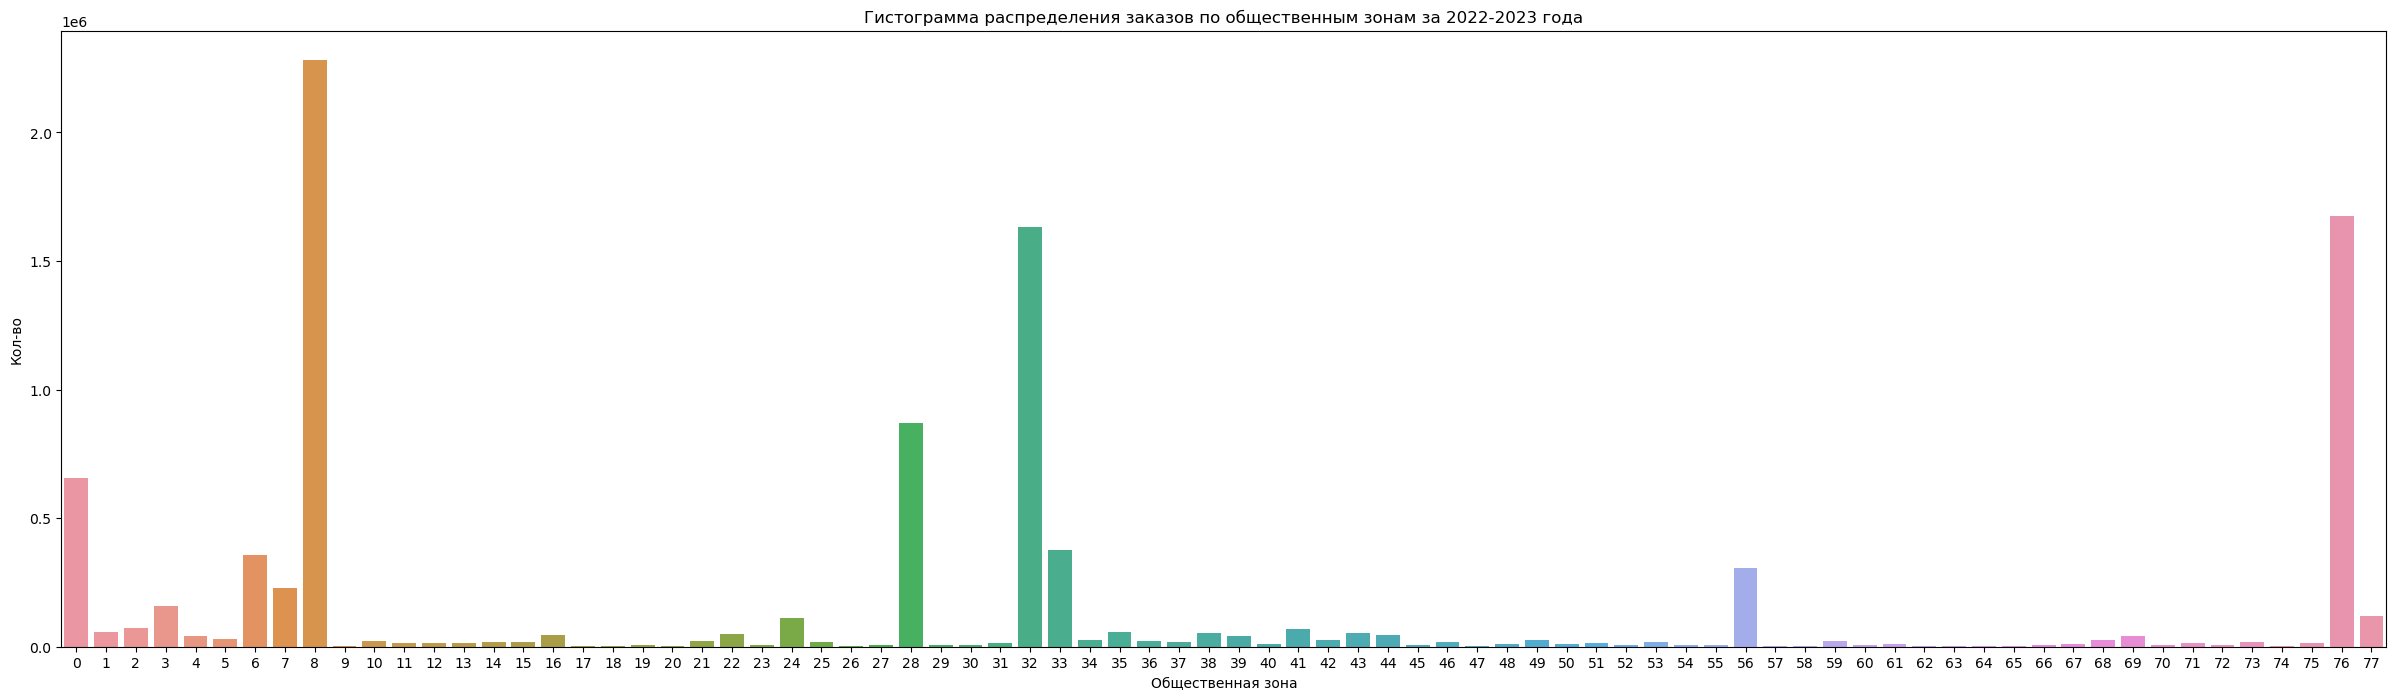

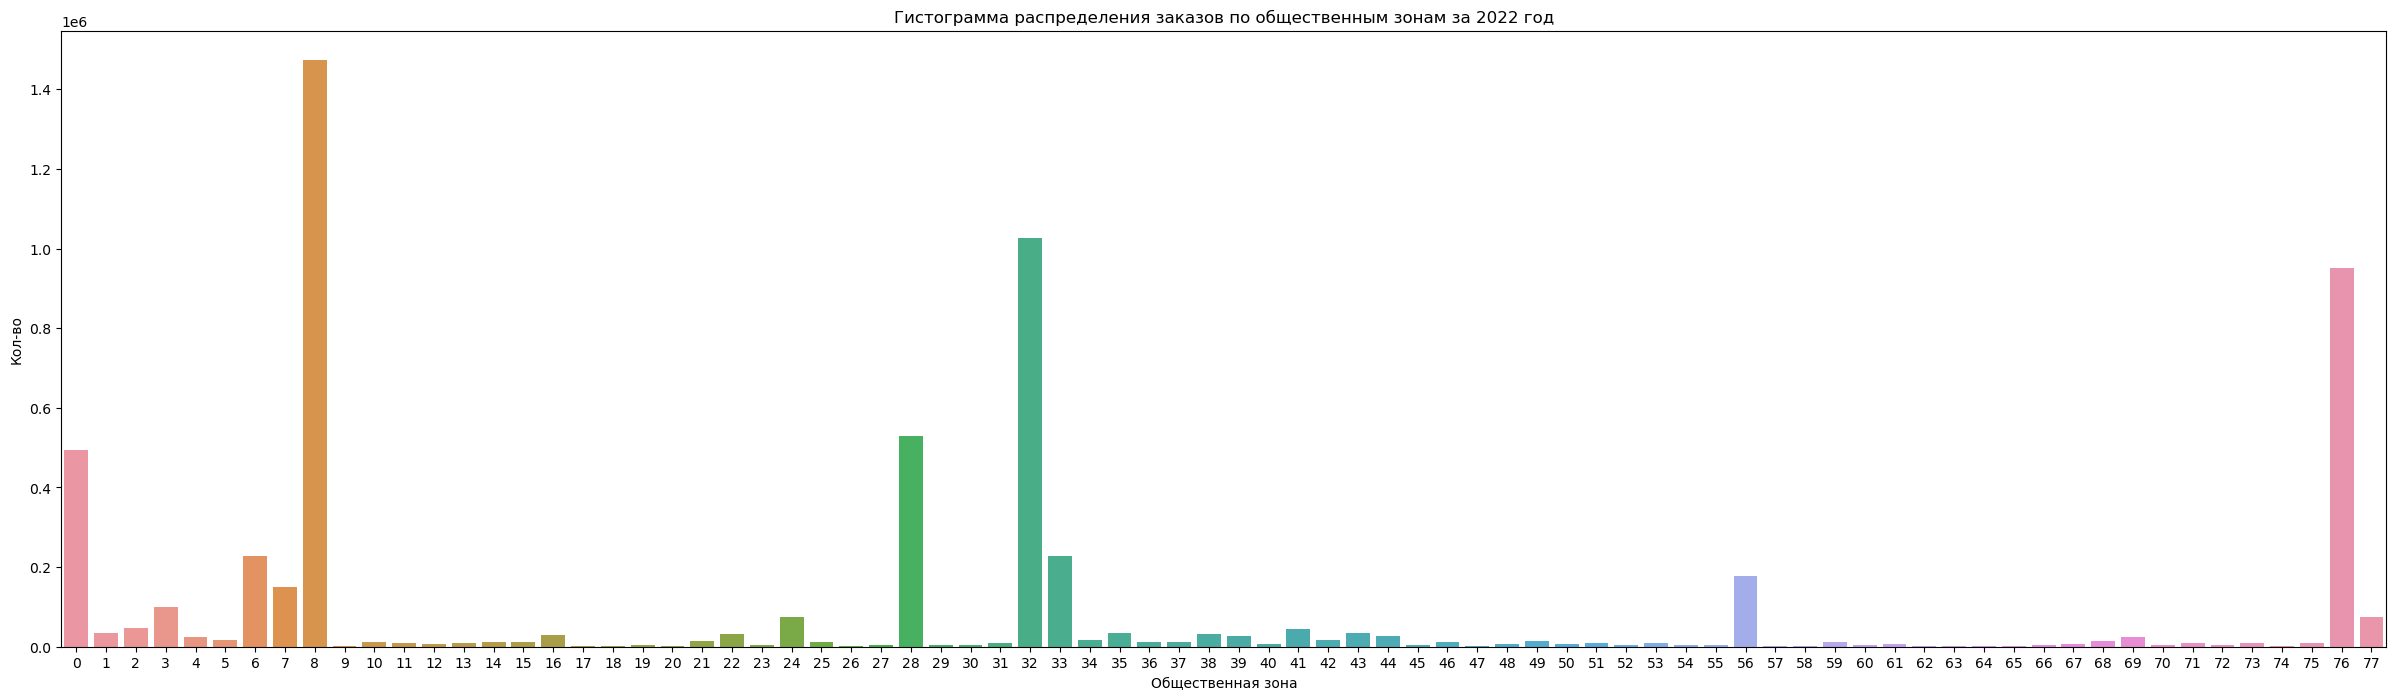

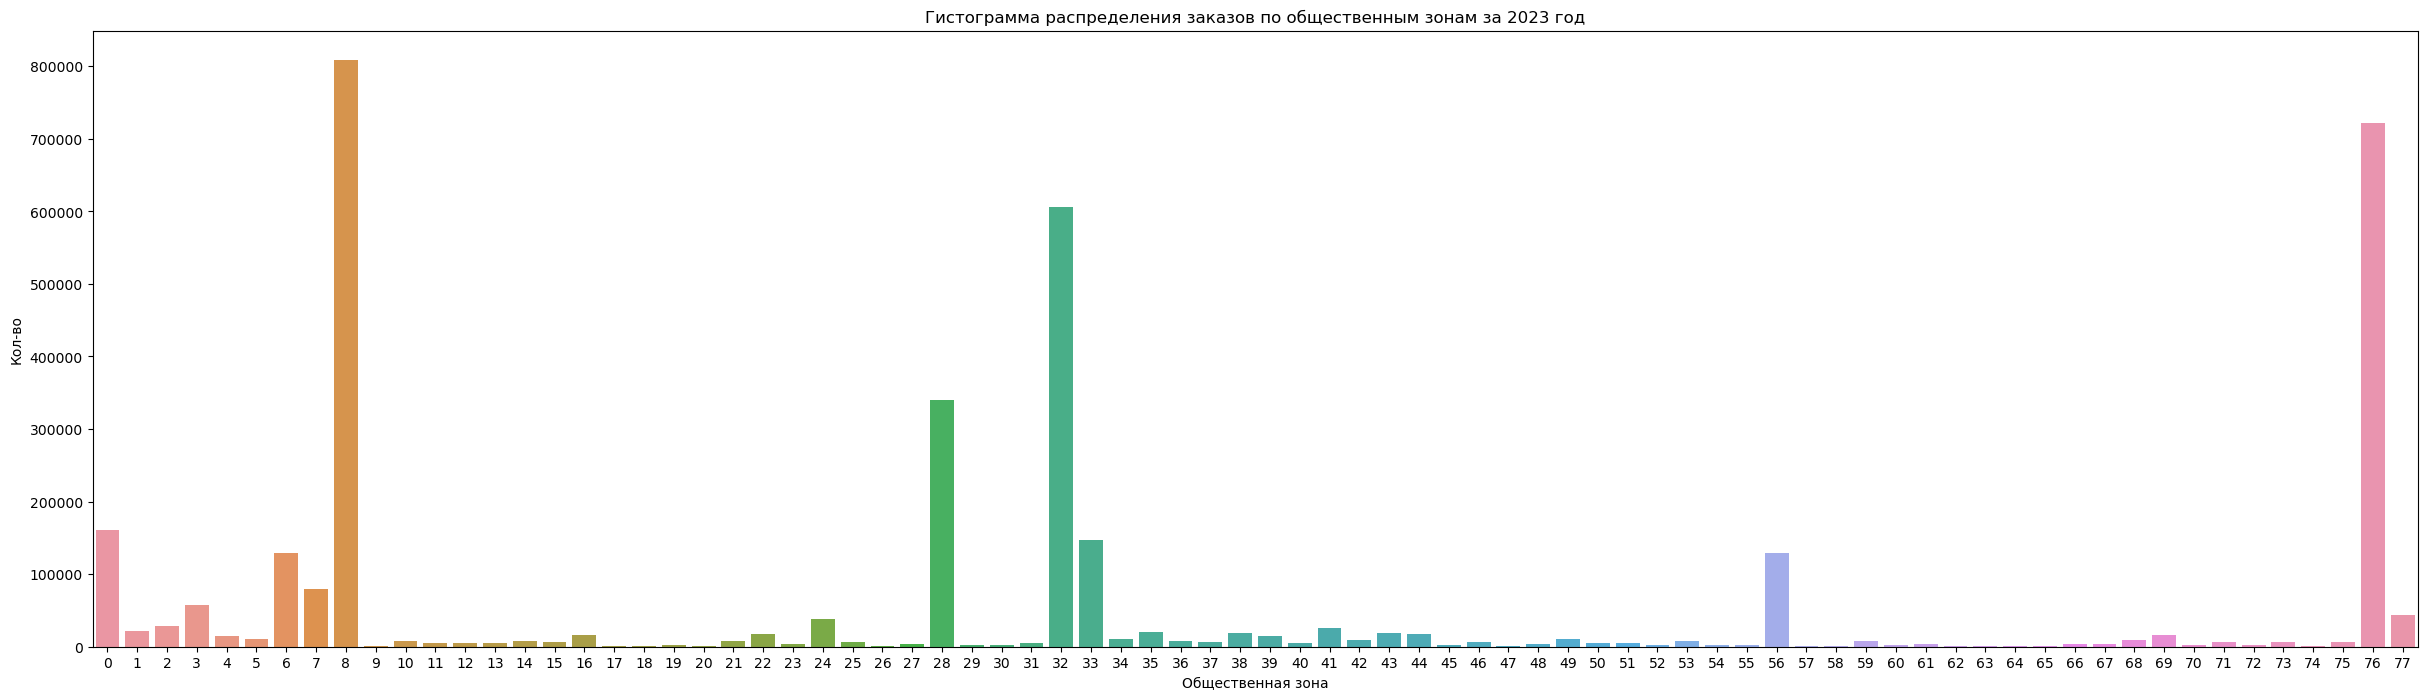

In [110]:
plt.figure(figsize=(30, 8))
sns.barplot(data=area_count, x='pickup_community_area', y='count')
plt.xlabel('Общественная зона')
plt.ylabel('Кол-во')
plt.title('Гистограмма распределения заказов по общественным зонам за 2022-2023 года');
plt.show();

plt.figure(figsize=(30, 8))
sns.barplot(data=area_count_2022, x='pickup_community_area', y='count')
plt.xlabel('Общественная зона')
plt.ylabel('Кол-во')
plt.title('Гистограмма распределения заказов по общественным зонам за 2022 год');
plt.show();

plt.figure(figsize=(30, 8))
sns.barplot(data=area_count_2023, x='pickup_community_area', y='count')
plt.xlabel('Общественная зона')
plt.ylabel('Кол-во')
plt.title('Гистограмма распределения заказов по общественным зонам за 2023 год');
plt.show();

Рассмотрели на кол-во заказов по регионам. Выделили первые топ-10 зон по заказам. За 2022 и 2023 год эти зоны совпадают.

In [111]:
print('Топ-10 районов по заказам')
top_10 = list(area_count.sort_values(by=['count'], ascending=False).head(10).index)
p = 0
for i in top_10:
    b = list(data_areas.loc[data_areas['number_area'] == i, 'community_areas'])[0]
    c = list(data_areas.loc[data_areas['number_area'] == i, 'sides'])[0]
    print(f"{p+1}.{b} - ({c}) ")
    p += 1

Топ-10 районов по заказам
1.Near North Side - (Central) 
2.O'Hare - (Far North Side) 
3.(The) Loop[11] - (Central) 
4.Near West Side - (West Side) 
5.Unknown - (Unknown) 
6.Near South Side - (Central) 
7.Lake View - (North side) 
8.Garfield Ridge - (Southwest Side) 
9.Lincoln Park - (North side) 
10.Uptown - (Far North Side) 


Очень много заказов из центральной зоны (Central). Посмотрим как представленные популярные места располагаются на карте Чикаго.

In [112]:
map_chicago_area = folium.Map(location=[41.8500300, -87.6500500],
               zoom_start = 11
              )

In [113]:
for i in tqdm(top_10):
    b = list(data_areas.loc[data_areas['number_area'] == i,
             'latitude'])[0]
    c = list(data_areas.loc[data_areas['number_area'] == i,
             'longitude'])[0]
    f = list(data_areas.loc[data_areas['number_area'] == i, 
             'community_areas'])[0]
    folium.Marker(
        location=[b, c], popup=f).add_to(map_chicago_area);

100%|██████████| 10/10 [00:00<00:00, 465.50it/s]


Посмотрим на 10 популярных мест высадки за 2022-2023 год

In [114]:
area_count_partitioned = taxi_union_sdf.repartition('dropoff_community_area')
area_count_dropoff = area_count_partitioned.groupby('dropoff_community_area').count().sort('dropoff_community_area').toPandas()

print('Топ-10 районов по высадкам')
top_10_dropoff = list(area_count_dropoff.sort_values(by=['count'], ascending=False).head(10).index)
p = 0
for i in tqdm(top_10_dropoff):
    b = list(data_areas.loc[data_areas['number_area'] == i, 'community_areas'])[0]
    c = list(data_areas.loc[data_areas['number_area'] == i, 'sides'])[0]
    print(f"{p+1}.{b} - ({c}) ");
    p += 1

Топ-10 районов по высадкам


100%|██████████| 10/10 [00:00<00:00, 1559.80it/s]

1.Near North Side - (Central) 
2.(The) Loop[11] - (Central) 
3.Unknown - (Unknown) 
4.Near West Side - (West Side) 
5.O'Hare - (Far North Side) 
6.Lake View - (North side) 
7.Near South Side - (Central) 
8.Lincoln Park - (North side) 
9.West Town - (West Side) 
10.Uptown - (Far North Side) 


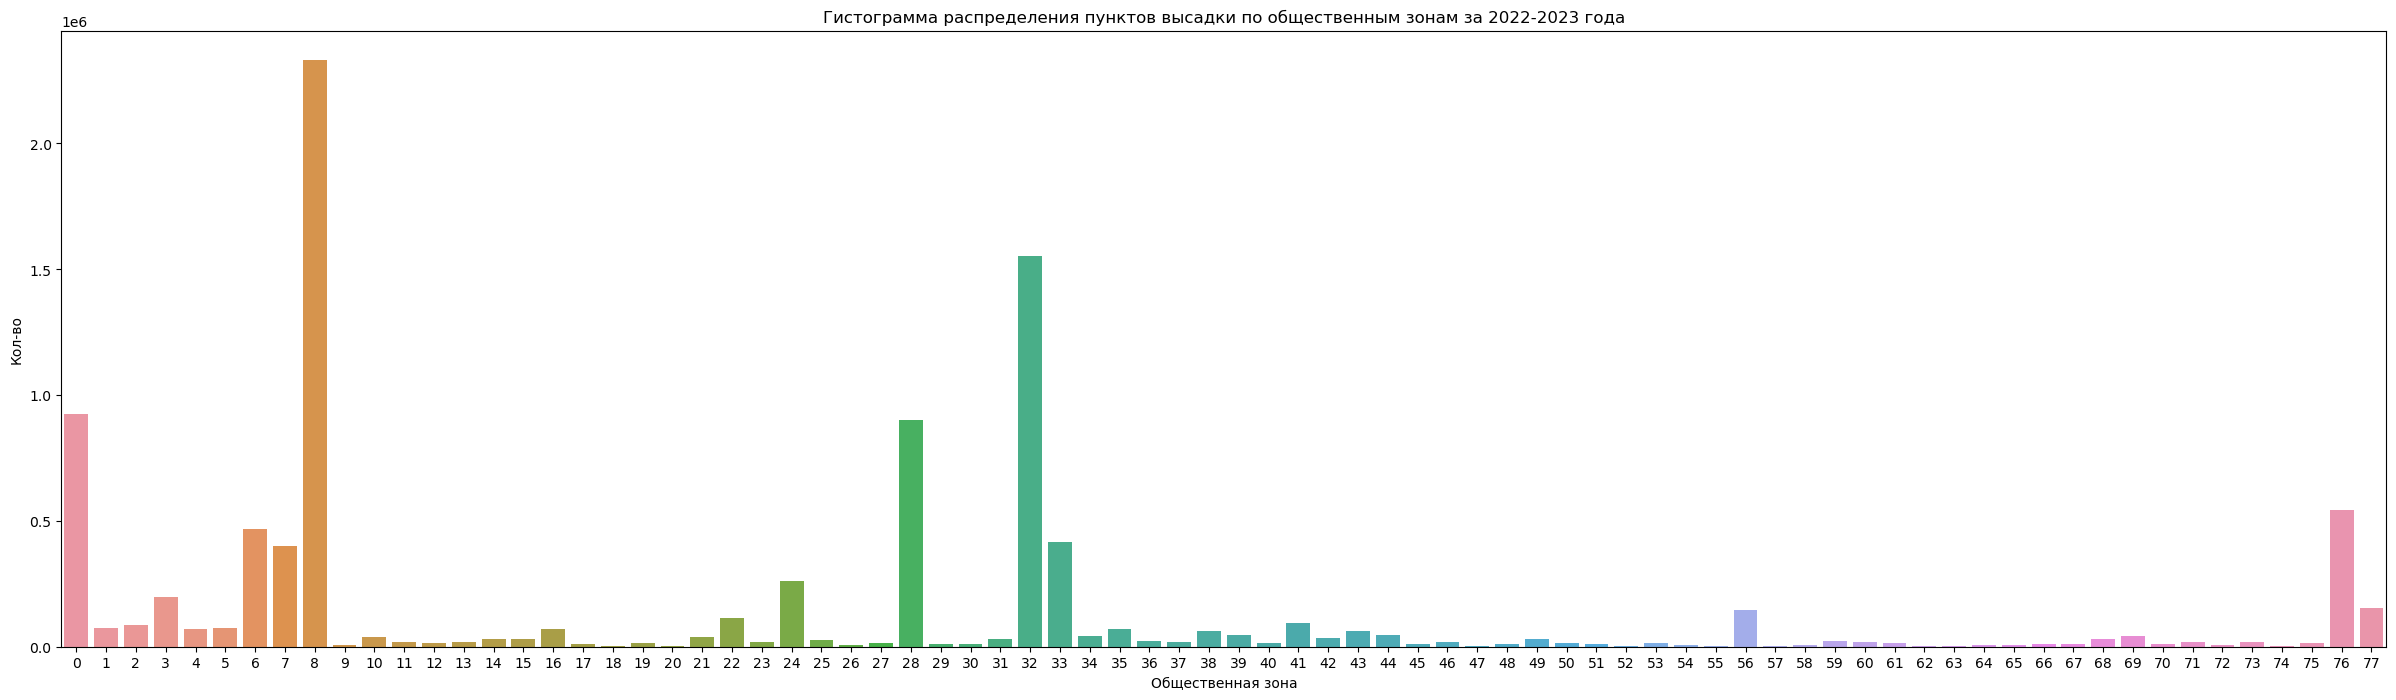

In [115]:
plt.figure(figsize=(30, 8))
sns.barplot(data=area_count_dropoff, x='dropoff_community_area', y='count')
plt.xlabel('Общественная зона')
plt.ylabel('Кол-во')
plt.title('Гистограмма распределения пунктов высадки по общественным зонам за 2022-2023 года');
plt.show();

In [116]:
for i in tqdm(top_10_dropoff):
    b = list(data_areas.loc[data_areas['number_area'] == i,
             'latitude'])[0]
    c = list(data_areas.loc[data_areas['number_area'] == i,
             'longitude'])[0]
    f = list(data_areas.loc[data_areas['number_area'] == i, 
             'community_areas'])[0]
    folium.Marker(
        location=[b, c], popup=f, icon=folium.Icon(color="green")).add_to(map_chicago_area) ;

100%|██████████| 10/10 [00:00<00:00, 1110.93it/s]


In [117]:
map_chicago_area

Можно наблюдать, что в 10 по посадкам и высадкам входят одни и теже зоны. Также в основнм люди вызывают такси, те кто живет вдоль берега или находится в аэропорту. По карте можно наблюдать, что в чикаго два аэропорта.

Посмотрим на расположение метро на карте.

Данные взяты с сайта: https://data.cityofchicago.org/Transportation/CTA-System-Information-List-of-L-Stops-Map/zbnc-zirh 
файл: `CTA_-_System_Information_-_List_of__L__Stops.csv`

Если необходимо будет исследовать данные по автобусным остановкам, то данне можно взять отсюда: https://data.cityofchicago.org/Transportation/CTA-Bus-Stops/hvnx-qtky
файл:`CTA_BusStops.csv`

In [118]:
data_train_staton = pd.read_csv('CTA_-_System_Information_-_List_of__L__Stops.csv')

In [119]:
data_train_staton = data_train_staton.loc[:,['STATION_NAME','Location']]

In [120]:
for i in range(0, len(data_train_staton)):
    data_train_staton.loc[i,'Location'] = (
        data_train_staton.loc[i,'Location']
        .replace('(', '')
        .replace(')', '')
        .replace(',', '')
        .split()
    )

In [121]:
for i in tqdm(range(0, len(data_train_staton))):
    b = float(data_train_staton.loc[i,'Location'][0])
    c = float(data_train_staton.loc[i,'Location'][1])
    f = data_train_staton.loc[i,'Location']
    folium.Marker(
        location=[b, c], popup=f, icon=folium.Icon(color="red")).add_to(map_chicago_area) ;

100%|██████████| 300/300 [00:00<00:00, 389.57it/s]


In [122]:
map_chicago_area

Можно наблюдать, что расположение метро ни как не влияет на популярность зоны на вызов такси. Думаю с автобусными остановками также. Так как их в разы больше. 

2. **Распределение заказов по таксомоторным компаниям за 2022-2023**

In [123]:
company_count_partitioned = taxi_union_sdf.repartition('company')
company_count = company_count_partitioned.groupby('company').count().sort('company').toPandas()
company_count.sort_values(by=['count'], ascending=False).head(10)

company    count
21                      Flash Cab  2112966
34      Taxi Affiliation Services  2025467
33                       Sun Taxi  1115349
20                   City Service   965060
35  Taxicab Insurance Agency, LLC   963789
16           Chicago Independents   541277
26               Medallion Leasin   391536
22                     Globe Taxi   376838
9                     5 Star Taxi   327734
13   Blue Ribbon Taxi Association   296247

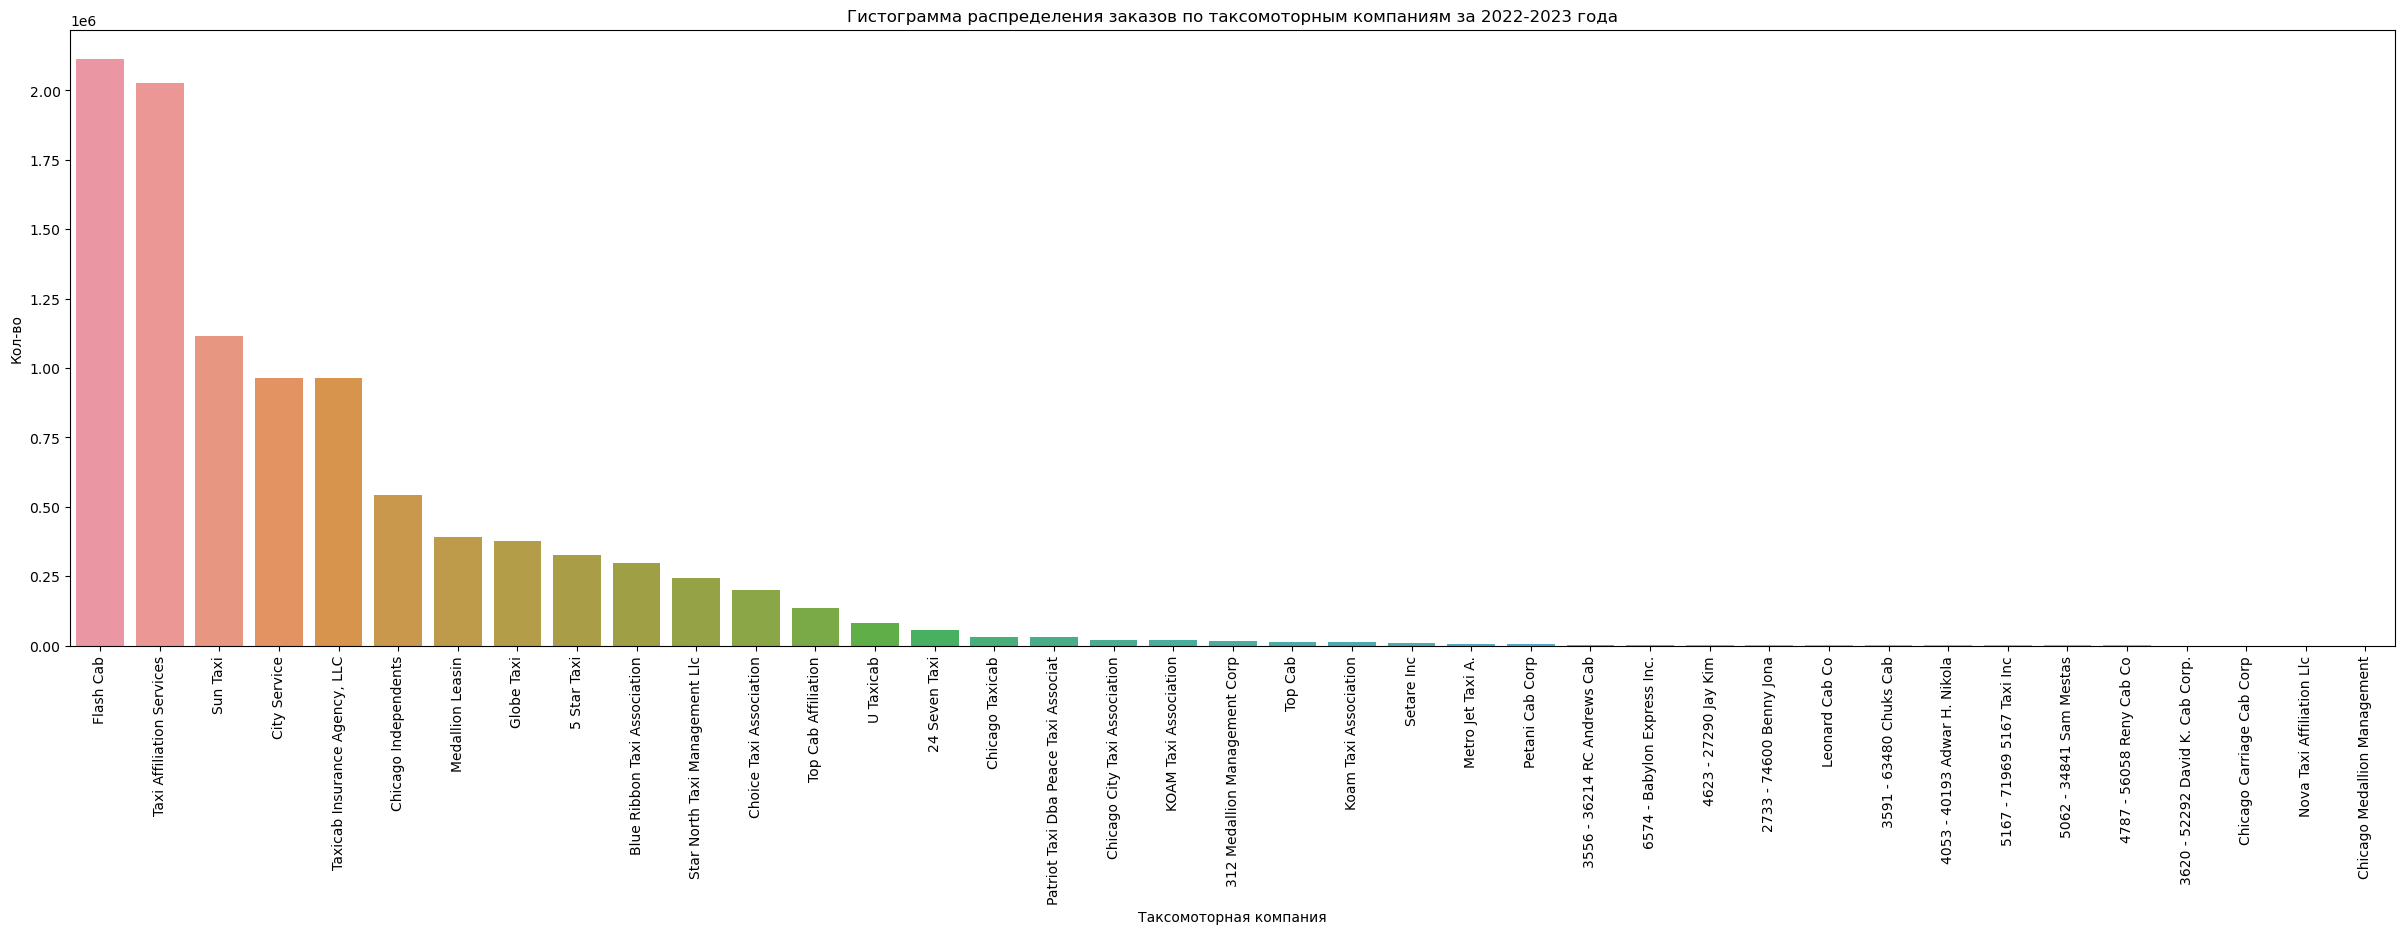

In [124]:
plt.figure(figsize=(30, 8))
sns.barplot(data=company_count.sort_values(by=['count'], ascending=False), x='company', y='count')
plt.xlabel('Таксомоторная компания')
plt.ylabel('Кол-во')
plt.title('Гистограмма распределения заказов по таксомоторным компаниям за 2022-2023 года');
plt.xticks(rotation=90)
plt.show();

In [125]:
print('Топ-10 таксомоторных компаний по заказам за 2022-2023')
top_10 = company_count.sort_values(by=['count'], ascending=False).head(10).index
p = 0
for i in tqdm(top_10):
    b = company_count.loc[ i, 'company']
    print(f"{p+1}.{b} ")
    p += 1

Топ-10 таксомоторных компаний по заказам за 2022-2023


100%|██████████| 10/10 [00:00<00:00, 19915.97it/s]

1.Flash Cab 
2.Taxi Affiliation Services 
3.Sun Taxi 
4.City Service 
5.Taxicab Insurance Agency, LLC 
6.Chicago Independents 
7.Medallion Leasin 
8.Globe Taxi 
9.5 Star Taxi 
10.Blue Ribbon Taxi Association 


Наблюдаются компании у которых за 2022 -2023 года было сделано меньше 100 заказов

In [126]:
company_count.loc[company_count['count'] <= 100]

company  count
5   3620 - 52292 David K. Cab Corp.     98
14        Chicago Carriage Cab Corp     17
17     Chicago Medallion Management      2
28        Nova Taxi Affiliation Llc      5

 3. **Какие компании в каких регионах обычно работают**

In [127]:
uniq_area = []
area = []
uniq_count_area = []
for value in tqdm(list(company_count.loc[:,'company'])):
    z = (taxi_union_sdf.filter(f'company = "{value}"')
         .select('pickup_community_area').distinct().toPandas()['pickup_community_area'].sort_values())    
    uniq_area.append(list(z))
    area.append(value)
    uniq_count_area.append(len(z))
    
data_company_count_uniq = pd.DataFrame( {'name_area': pd.Series(area),
                                         'area_uniq': pd.Series(uniq_area),
                                         'count_area_uniq': pd.Series(uniq_count_area)}
                                      ).sort_values(by=['count_area_uniq'], ascending=False)

100%|██████████| 39/39 [00:23<00:00,  1.63it/s]


data_company_count_uniq

In [128]:
data_company_count_uniq

name_area  \
38                             U Taxicab   
13          Blue Ribbon Taxi Association   
35         Taxicab Insurance Agency, LLC   
34             Taxi Affiliation Services   
33                              Sun Taxi   
26                      Medallion Leasin   
22                            Globe Taxi   
9                            5 Star Taxi   
21                             Flash Cab   
20                          City Service   
16                  Chicago Independents   
37                   Top Cab Affiliation   
32        Star North Taxi Management Llc   
19               Choice Taxi Association   
29  Patriot Taxi Dba Peace Taxi Associat   
18                       Chicago Taxicab   
0                          24 Seven Taxi   
15         Chicago City Taxi Association   
23                 KOAM Taxi Association   
36                               Top Cab   
3            3556 - 36214 RC Andrews Cab   
27                     Metro Jet Taxi A.   
2          312 Medallion Management Corp   
31                            Setare Inc   
24                 Koam Taxi Association   
25                        Leonard Cab Co   
11            5167 - 71969 5167 Taxi Inc   
30                       Petani Cab Corp   
4                 3591 - 63480 Chuks Cab   
12           6574 - Babylon Express Inc.   
1                2733 - 74600 Benny Jona   
6           4053 - 40193 Adwar H. Nikola   
10               5062 - 34841 Sam Mestas   
5        3620 - 52292 David K. Cab Corp.   
14             Chicago Carriage Cab Corp   
28             Nova Taxi Affiliation Llc   
17          Chicago Medallion Management   
8               4787 - 56058 Reny Cab Co   
7                   4623 - 27290 Jay Kim   

                                                                                                                                                                                                                                                                                                         area_uniq  \
38  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]   
13  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]   
35  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]   
34  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]   
33  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]   
26  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]   
22  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2

In [129]:
print('Компании закзаы у которых были во всех регионах:')
print(list(data_company_count_uniq
           .loc[data_company_count_uniq['count_area_uniq'] > 77,'name_area']
          )
     )
print('')
print('Кол-во компаний:')
print(len(data_company_count_uniq
           .loc[data_company_count_uniq['count_area_uniq'] > 77,'name_area']
          )
     )

Компании закзаы у которых были во всех регионах:
['U Taxicab', 'Blue Ribbon Taxi Association', 'Taxicab Insurance Agency, LLC', 'Taxi Affiliation Services', 'Sun Taxi', 'Medallion Leasin', 'Globe Taxi', '5 Star Taxi', 'Flash Cab', 'City Service', 'Chicago Independents']

Кол-во компаний:
11


10 из 11 компаний входи в наш топ 10 по заказам за весь 2022-2023 года

Nакже можно заметить, что регион 0 входит практически во все компании, но так как нам он не нужен для обучения посчитаем скольк данных потеряется при этом. Также было замечено, что еть компании, которые принимали посадку только из региона 0

In [130]:
taxi_union_sdf.filter('pickup_community_area = 0').count() / len_data_union * 100

6.550726246653703

Потеряется менее 7% от всего объединенного датасета. До это до объединения мы уже избавились от 1,5% данных от каждого датасета. Данным в сумме мы потеряем меньше 10%, считаю примемлимым в нашем случае.

In [131]:
taxi_union_sdf = taxi_union_sdf.filter('pickup_community_area != 0')

In [132]:
company_count_partitioned_2 = taxi_union_sdf.repartition('company')
company_count_2 = company_count_partitioned_2.groupby('company').count().sort('company').toPandas()
company_count_2.sort_values(by=['count'], ascending=False).head(15)

company    count
32       Taxi Affiliation Services  1990577
19                       Flash Cab  1947957
31                        Sun Taxi  1018141
18                    City Service   910305
33   Taxicab Insurance Agency, LLC   898497
14            Chicago Independents   493727
24                Medallion Leasin   360283
20                      Globe Taxi   351748
7                      5 Star Taxi   294420
11    Blue Ribbon Taxi Association   284287
30  Star North Taxi Management Llc   225278
17         Choice Taxi Association   187627
35             Top Cab Affiliation   109586
36                       U Taxicab    72477
0                    24 Seven Taxi    52456

In [133]:
sum(company_count_2.sort_values(by=['count'], ascending=False).head(11)['count'])/len_data_union * 100

87.60944916353294

In [134]:
company_other = list(
    company_count_2
    .sort_values(by=['count'], ascending=False)
    .tail((len(company_count_2) - 15))['company']
)

11 первых топовых компаний в нашем списке выполнили 87% заказов и они практически раотали во всех регионах.
Предлагаю оставить первые 15 компаний в нашем списке выше. Все компании после 15 в нашем списке приравнять к компании 'Other', таким образом мы уменьши кол-во категориальных признаков и не потеряем информацию о строках.
Получим список компаний, которые надо переименовать

In [135]:
#импортируем снова библиотеку
#поскольку к этому моменту пайспарк забыл, что она у меня уже импортирована 
import pyspark.sql.functions as f

In [136]:
p = 0
for i in tqdm(range(0,len(company_other))):
    p = company_other[i]
    taxi_union_sdf = taxi_union_sdf.withColumn("company", 
                                               f.regexp_replace('company',
                                                                p,
                                                                'Other')
                                              )

100%|██████████| 22/22 [00:00<00:00, 79.71it/s]


In [137]:
taxi_union_sdf.printSchema()

root
 |-- trip_start_timestamp: timestamp (nullable = true)
 |-- trip_seconds: float (nullable = true)
 |-- trip_miles: float (nullable = true)
 |-- pickup_community_area: integer (nullable = true)
 |-- dropoff_community_area: integer (nullable = true)
 |-- trip_total: float (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)



 4. **Статистика по способам оплаты**

In [138]:
payment_type_count_partitioned = taxi_union_sdf.repartition('payment_type')
payment_type_count = payment_type_count_partitioned.groupby('payment_type').count().sort('payment_type').toPandas()
payment_type_count.sort_values(by=['count'], ascending=False).head(15)

payment_type    count
1  Credit Card  3556641
0         Cash  2906229
3       Mobile  1462333
5       Prcard   950833
7      Unknown   477342
4    No Charge     3442
2      Dispute     3333
6      Prepaid        1

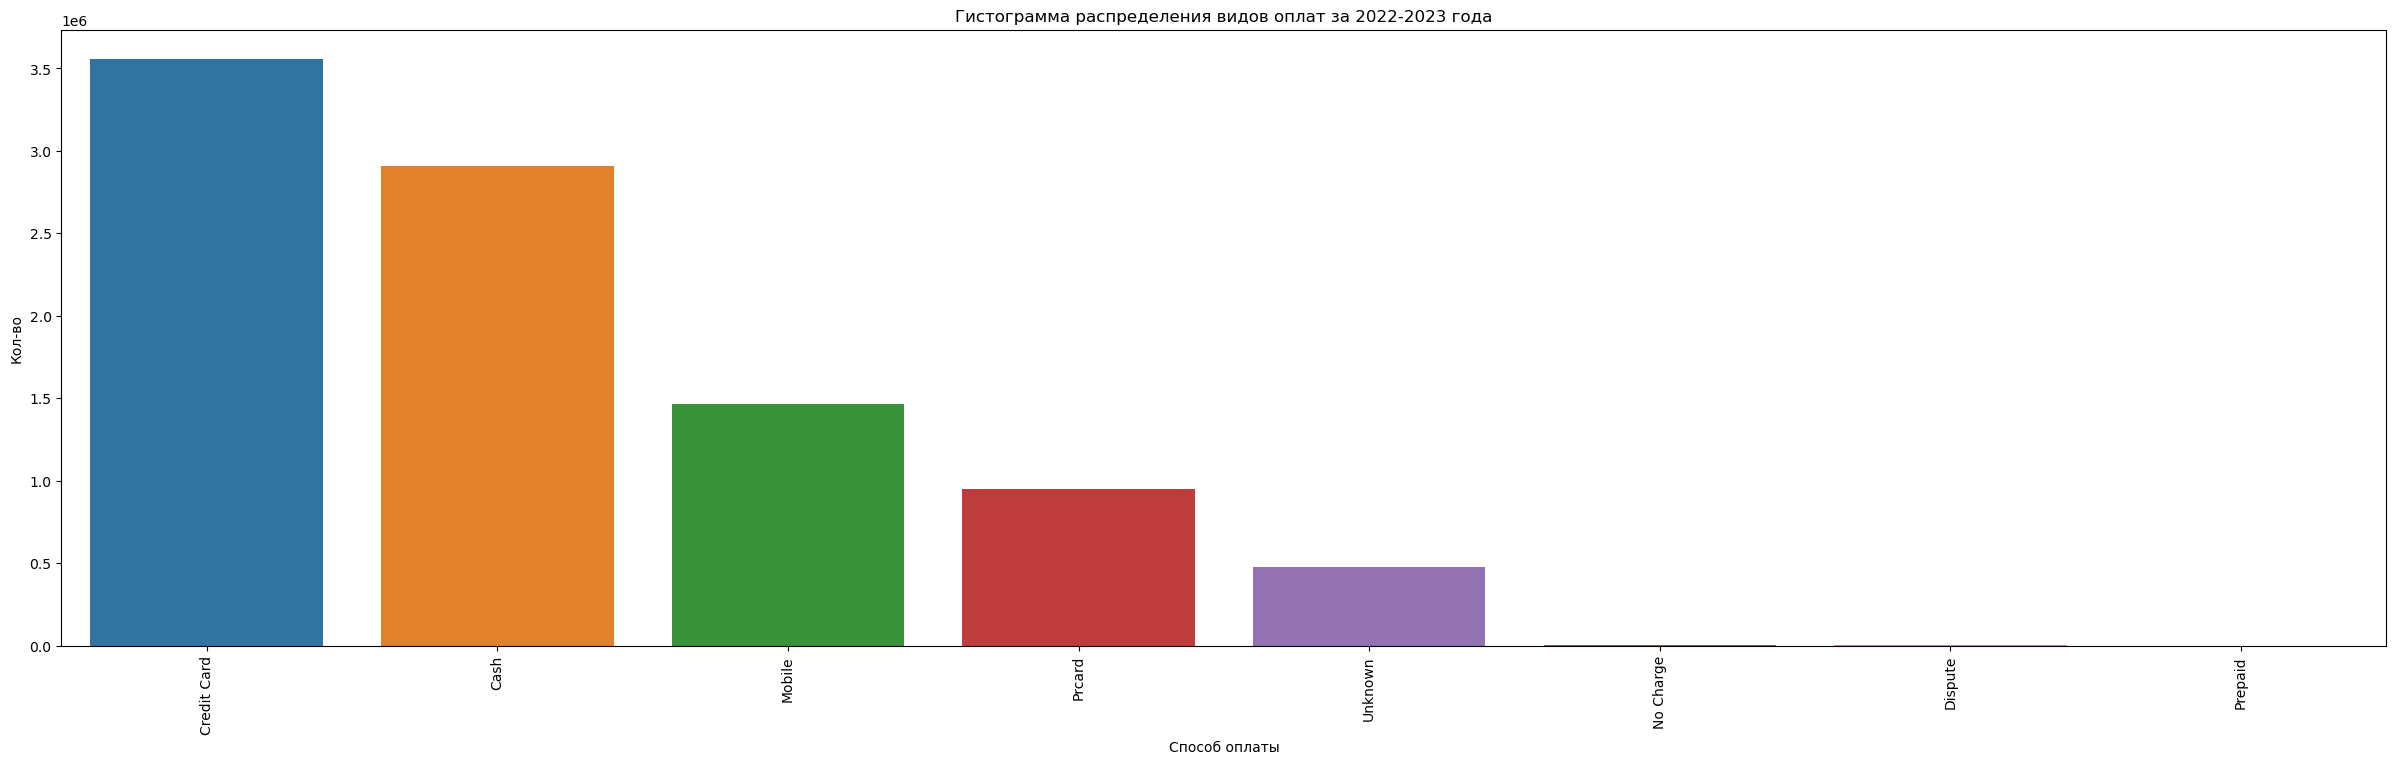

In [139]:
plt.figure(figsize=(30, 8))
sns.barplot(data=payment_type_count
            .sort_values(by=['count'], ascending=False),
            x='payment_type',
            y='count')
plt.xlabel('Способ оплаты')
plt.ylabel('Кол-во')
plt.title('Гистограмма распределения видов оплат за 2022-2023 года');
plt.xticks(rotation=90)
plt.show();

НАибольшей популярностью пользуются Способы оплаты с помощью кредитных карт и налички. Предоплата встречается один раз. Предлагается удалить данный тип платежа, чтобы уменьшить кол-во категориальных признаков

Также у видов оплат:
 - No Charge (бесплатно)
 - Dispute (диспут. возврат средств)
маленькое кол-во закзаов. данные строки можно удалить, чтобы уменьшить кол-во категориальных признаков. Или внести в уже существующий. Таких данных не очень много по отношению ко всему датасету. предлагается их исключить.

In [140]:
taxi_union_sdf = (
    taxi_union_sdf
    .filter('payment_type != "Prepaid"')
    .filter('payment_type != "No Charge"')
    .filter('payment_type != "Dispute"')
)

5. **Изучим как во времени меняется кол-во заказов**

**Построим график временного ряда**

Выполним округление значений до ближайшего часа.

In [141]:
taxi_union_sdf = (
    taxi_union_sdf
    .orderBy('trip_start_timestamp')
    .withColumn("hourly_timestamp",
                f.date_trunc("hour", taxi_union_sdf.trip_start_timestamp))
)

In [142]:
taxi_union_sdf.printSchema()

root
 |-- trip_start_timestamp: timestamp (nullable = true)
 |-- trip_seconds: float (nullable = true)
 |-- trip_miles: float (nullable = true)
 |-- pickup_community_area: integer (nullable = true)
 |-- dropoff_community_area: integer (nullable = true)
 |-- trip_total: float (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)
 |-- hourly_timestamp: timestamp (nullable = true)



Сгрупируем данные по каждому часу и посчитаем кол-во всего заказов в чикаго за 2022-2023 год за каждый час. Далее переведем таблицу в pandas и будет проводить исследование временного ряда.

In [143]:
resample_houtly_partitioned = taxi_union_sdf.repartition('hourly_timestamp')
resample_houtly_count = (
    resample_houtly_partitioned
    .groupby('hourly_timestamp')
    .count().orderBy('hourly_timestamp')
    .toPandas()
)

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


In [144]:
resample_houtly_count = resample_houtly_count.set_index('hourly_timestamp')

Проверим, в хронологическом ли порядке расположены даты и время

In [145]:
print(resample_houtly_count.index.is_monotonic)

True


/tmp/ipykernel_13487/3723174798.py:1: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  print(resample_houtly_count.index.is_monotonic)


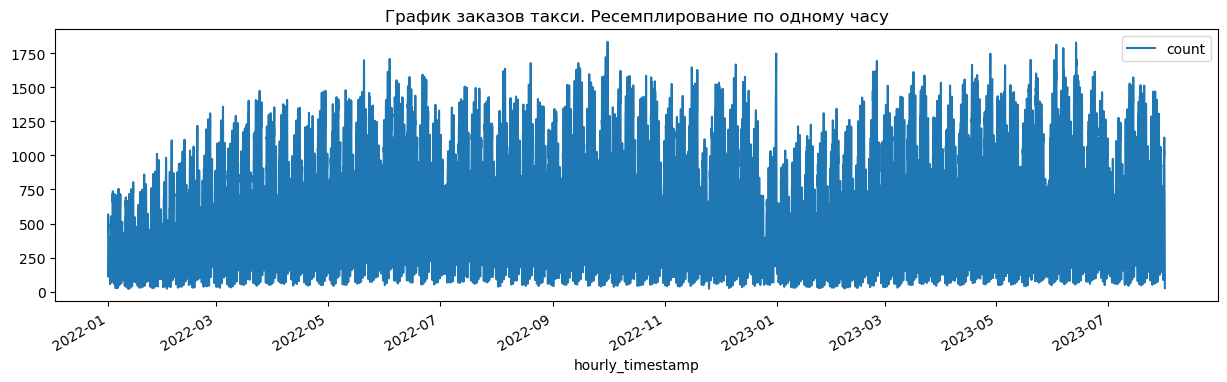

In [146]:
resample_houtly_count.plot(figsize=(15, 4))
plt.title('График заказов такси. Ресемплирование по одному часу');

График малоинформативен. Посмотрим как данные меняются при ресемплирование по дням, по неделям, по месяцам

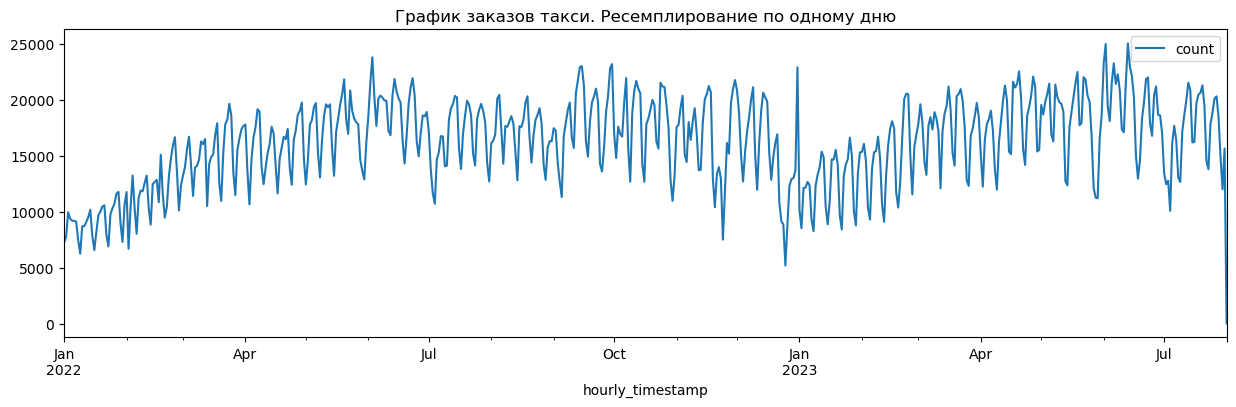

In [147]:
resample_houtly_count.resample('1D').sum().plot(figsize=(15, 4))
plt.title('График заказов такси. Ресемплирование по одному дню');

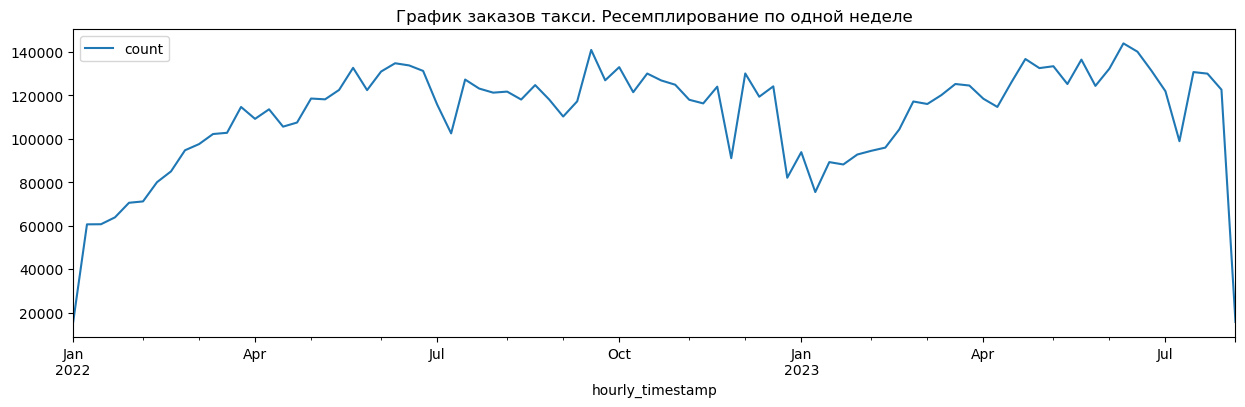

In [148]:
resample_houtly_count.resample('1W').sum().plot(figsize=(15, 4))
plt.title('График заказов такси. Ресемплирование по одной неделе');

Text(0.5, 1.0, 'График заказов такси. Ресемплирование по одному месяцу')

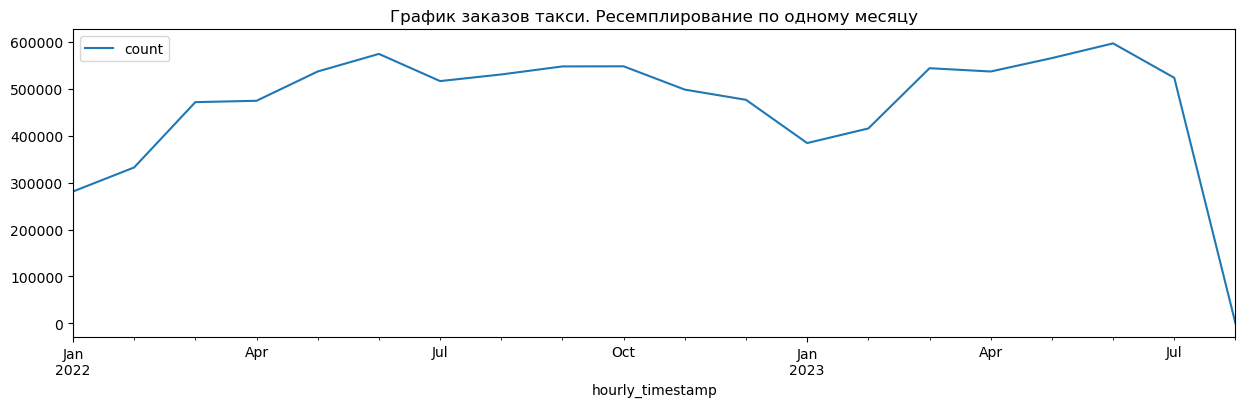

In [149]:
resample_houtly_count.resample('1M').sum().plot(figsize=(15, 4))
plt.title('График заказов такси. Ресемплирование по одному месяцу')

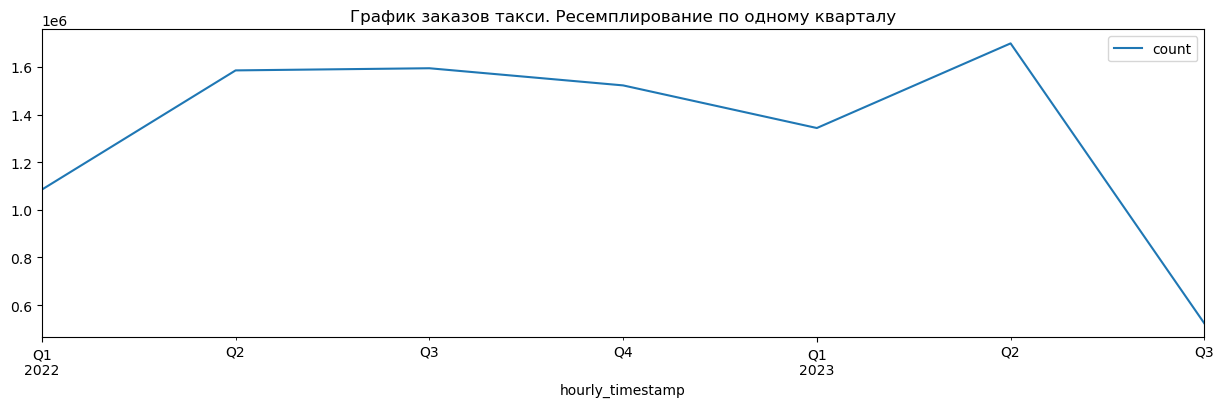

In [150]:
resample_houtly_count.resample('1Q').sum().plot(figsize=(15, 4))
plt.title('График заказов такси. Ресемплирование по одному кварталу');

Можно наблюдать, что суммарное кол-во заказов со временем в течении года в Чикаго растет до мая. Затем в июне небольшой болшой спад. И до октября идет небольшой рост снова. а затем начинает неспеша падать к концу года. Если смотреть по ресемплированию по кварталам, то в Q2 и Q3 кол-во заказов практически не менятеся, а потом начинает падать. Если смотреть ресемплирование по дням и дню недели, то наблюдаются незначительные колебания заказов. Однако наш датасет содержит информацию за 2022 и 2023 год и наблюдается часчтичная периодичность заказов. И посколькльу данные за 2023 год у нас не полные также происходит резкое падение заказов к 3 кварталу.
Так как мы заметили небольшую закономерность, то рассмотрим как веду себя знаечния в течении 2022 года

**Скользящее среднее**

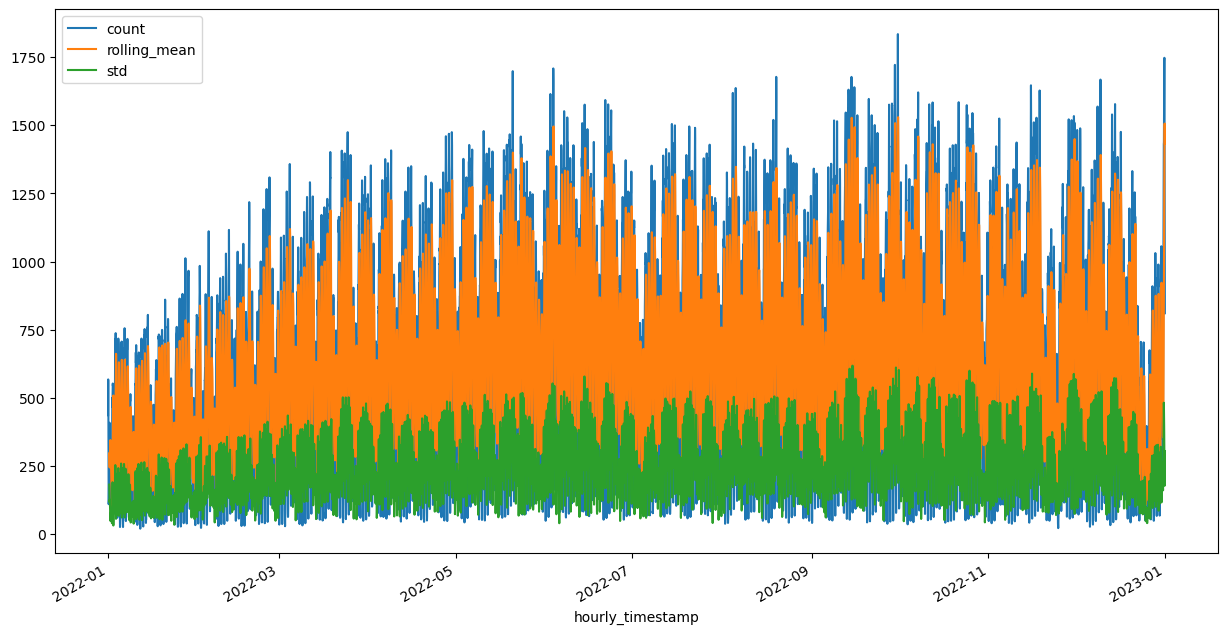

In [151]:
data_1 = resample_houtly_count['2022-01-01 00:00:00':'2022-12-31 23:00:00'].copy()
data_1['rolling_mean'] = data_1['count'].rolling(10).mean() 
data_1['std'] = data_1['count'].rolling(10).std()
data_1.plot(figsize=(15, 8));

Ряд не станционарный. Среднее значение менятеся со временем.

**Тренды и сезонность**

Ряд временной у нас возрастает, но могу возникнуть потери во времени. Проверим, что ряд не имеет потерянных значений и если имеет, то восполним пробелы.

Для начала создадим необходимый нам диапазон значений

In [152]:
data_2 = pd.DataFrame({'hourly_timestamp' : pd.date_range(start="2022-01-01 00:00:00", end = '2022-12-31 23:00:00', freq="1H")})

In [153]:
len(data_2)

8760

Посмотрим на длину нашей сводной таблицы 

In [154]:
len(data_1)

8759

Кол-во строк отличается значит в нашей таблице есть потерянный временной участок. Добивим потерянный временной промежуток и заполним пропущенной значение с помошью интерполяции в столбце count

In [155]:
data_union = (
    pd.merge(data_2,
             data_1.reset_index(),
             how='left', on='hourly_timestamp')
    .set_index('hourly_timestamp')
)

In [156]:
data_union['count'] = data_union['count'].interpolate()

In [157]:
def  seasonal(data):
    decomposed = seasonal_decompose(data['count']) 

    plt.figure(figsize=(15, 10))

    plt.subplot(311)

    decomposed.trend.plot(ax=plt.gca())
    plt.title('Trend')

    plt.subplot(312)
    decomposed.seasonal.plot(ax=plt.gca())
    plt.title('Seasonality')

    plt.subplot(313)
    decomposed.resid.plot(ax=plt.gca())
    plt.title('Residuals')
    plt.tight_layout()


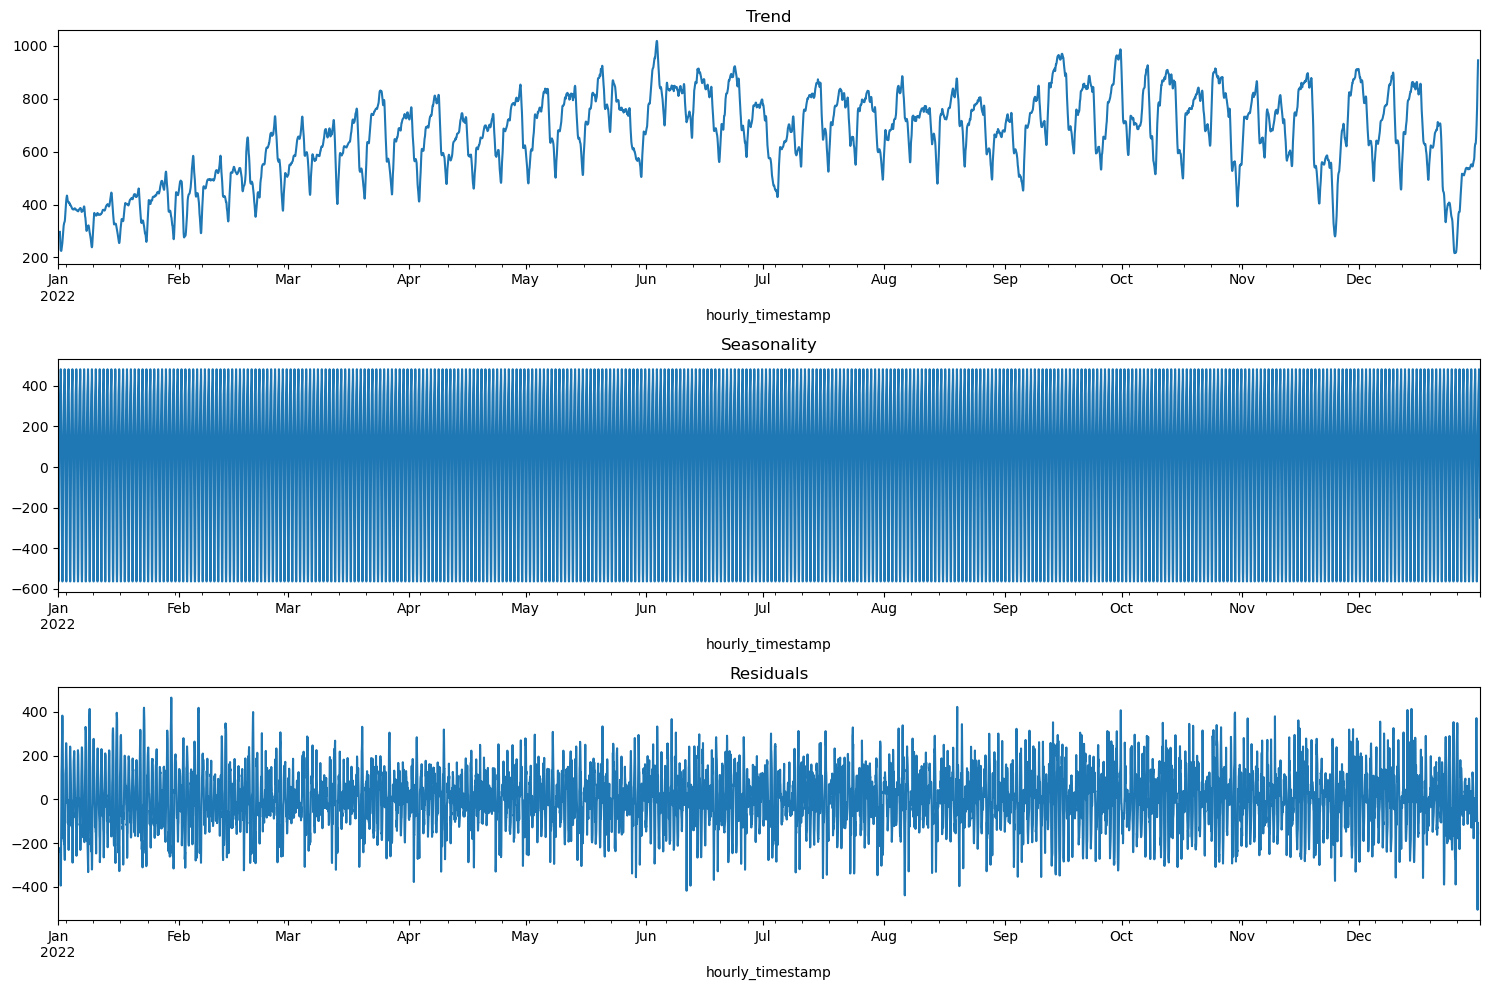

In [158]:
seasonal(data_union)

Тренд у нас растет с незначительными колебаниям, но затем спадает. Наблюдается Сезонность, но данных слишком много, необходимо рассмотреть отдельно. Попробуем ее выявить рассмотрев в мае последний день, последнюю неделю и месяц в датасете. Май берем так как один из самых активных месяцев по заказам. Далее относительно месяца общее кол-во будет меняться, но сезонность внутри месяца уже будет более менее одинаковая


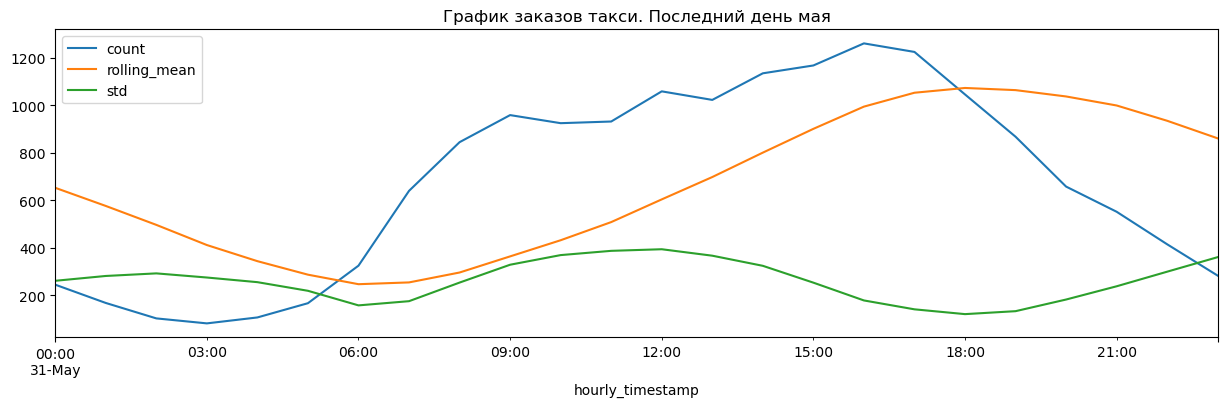

In [159]:
data_union.loc['2022-05-31 00:00:00':'2022-05-31 23:00:00'].plot(figsize=(15, 4))
plt.title('График заказов такси. Последний день мая');

Рост заказов начинается с 56утра. В это время самое маленькое число заказов. Затем начинается рост до 18 часов. Период пика закзов  16-18 ч. Затем снова начинается спадать

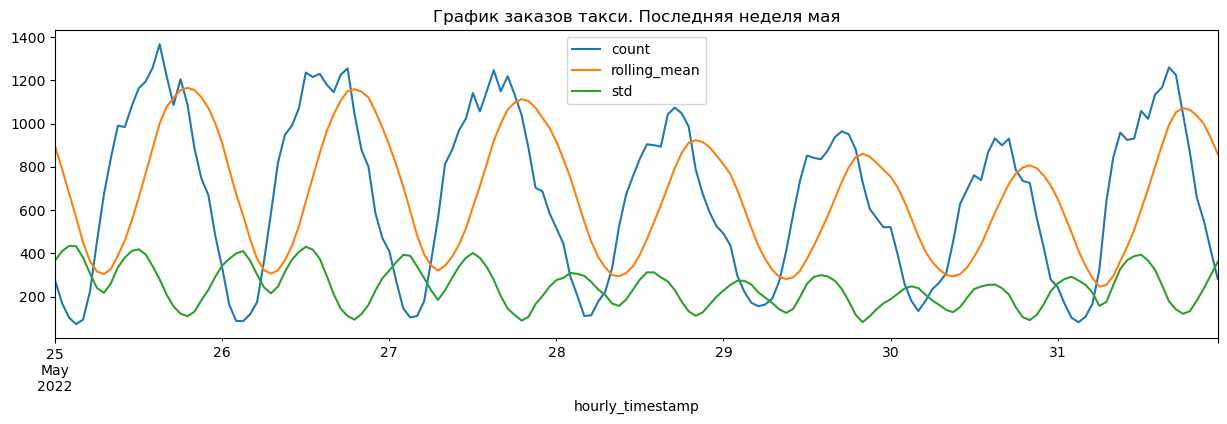

In [160]:
data_union.loc['2022-05-25 00:00:00':'2022-05-31 23:00:00'].plot(figsize=(15, 4))
plt.title('График заказов такси. Последняя неделя мая');

Наблюдается нв течении 25 мая наблюдалось большое кол-во заказов. Затем к 30-му числу с каждым днем общее кол-во сападает и 31 снова выросло. Вероятно есть зависимость от дня недели.

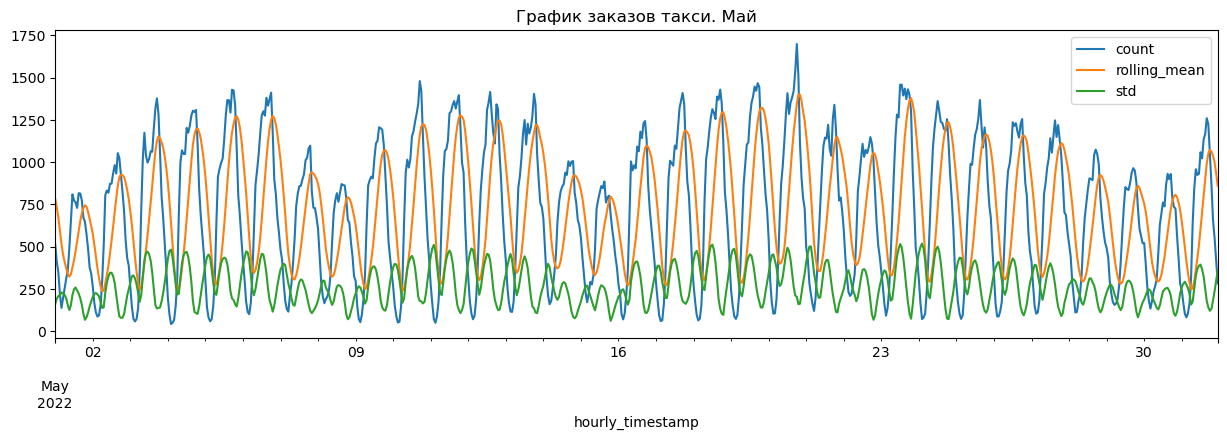

In [161]:
data_union.loc['2022-05-01 00:00:00':'2022-05-31 23:00:00'].plot(figsize=(15, 4))
plt.title('График заказов такси. Май');

Наблюдатся периодичности изменения кол-во заказов с шагом 7 дней

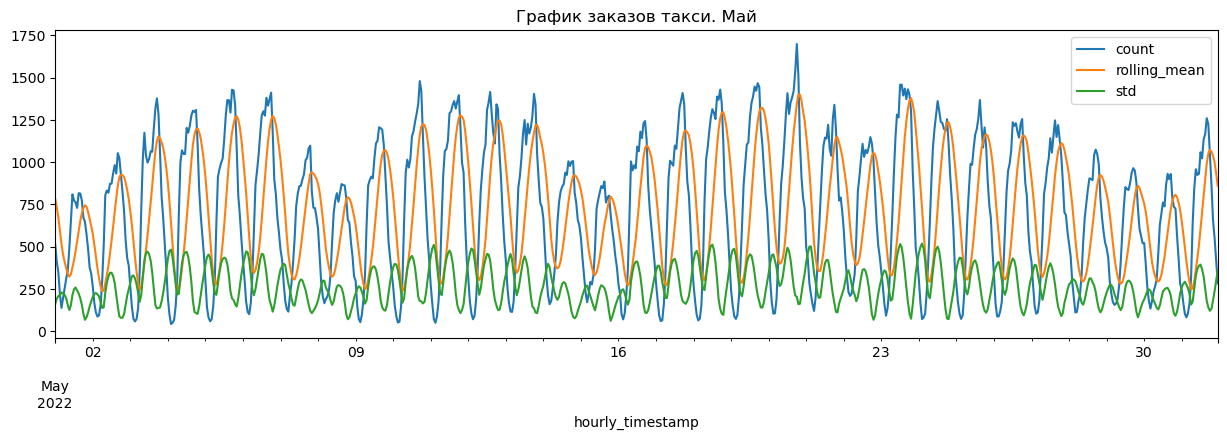

In [162]:
data_union.loc['2022-05-01 00:00:00':'2022-05-31 23:00:00'].plot(figsize=(15, 4))
plt.title('График заказов такси. Май');

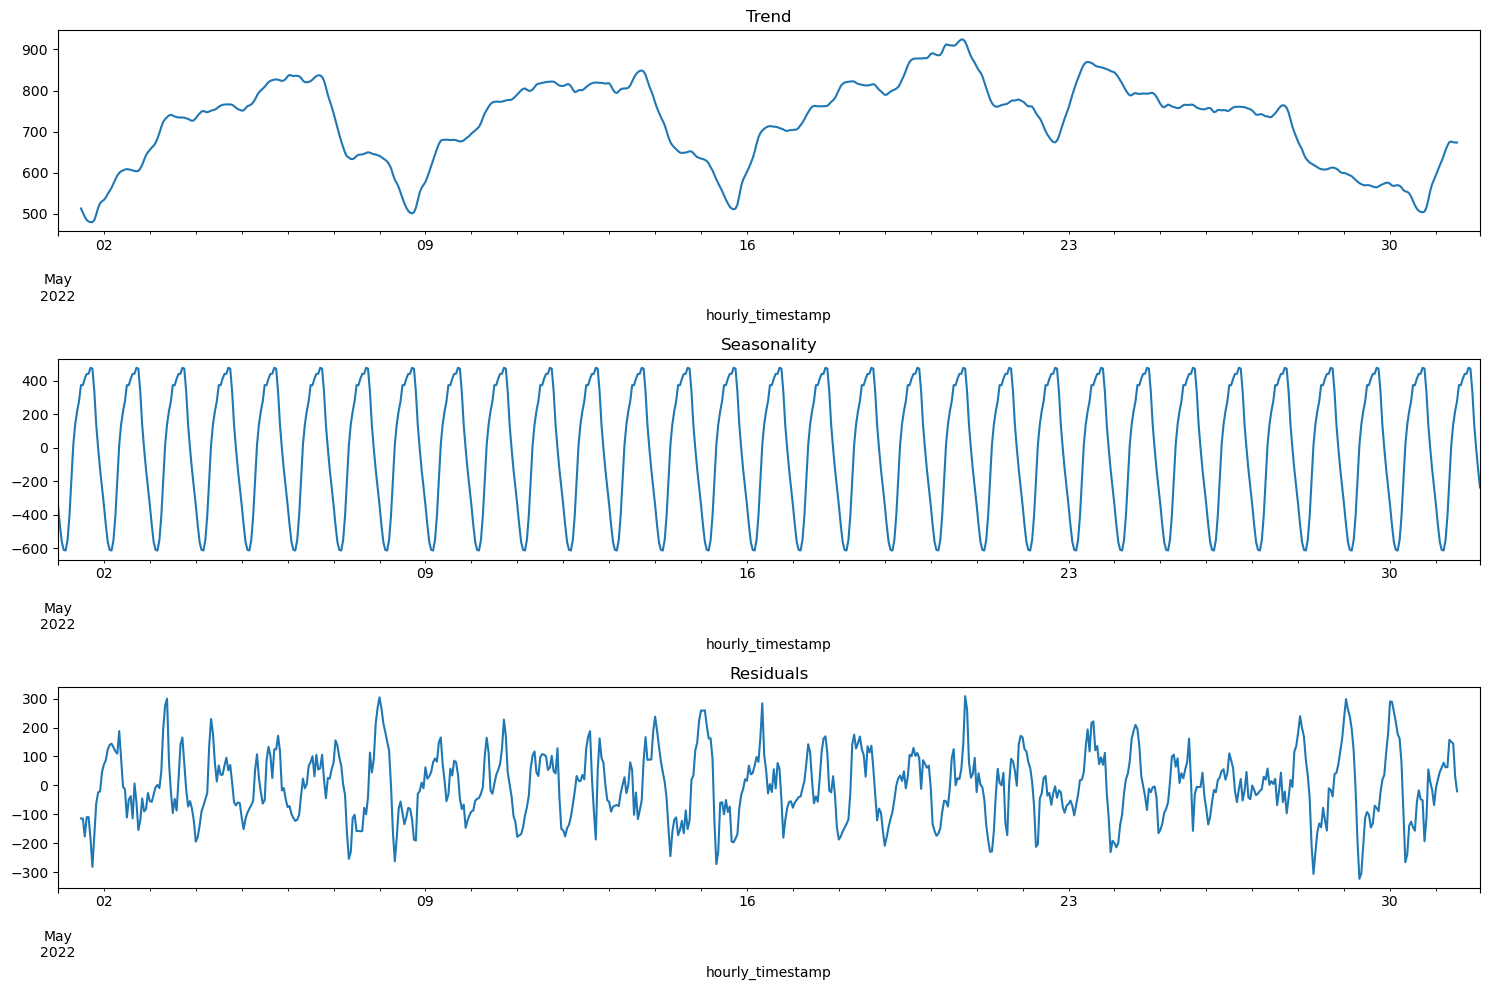

In [163]:
seasonal(data_union.loc['2022-05-01 00:00:00':'2022-05-31 23:00:00'])

Наименьшее кол-во заказов выпадало на 9 мая, 16, 23, 30

In [164]:
print('День недели 2022-05-09:',
      data_union['2022-05-09'].index.dayofweek.unique())
print('День недели 2022-05-16:',
      data_union['2022-05-16'].index.dayofweek.unique())
print('День недели 2022-05-23:',
      data_union['2022-05-23'].index.dayofweek.unique())
print('День недели 2022-05-30:',
      data_union['2022-05-30'].index.dayofweek.unique())

День недели 2022-05-09: Int64Index([0], dtype='int64', name='hourly_timestamp')
День недели 2022-05-16: Int64Index([0], dtype='int64', name='hourly_timestamp')
День недели 2022-05-23: Int64Index([0], dtype='int64', name='hourly_timestamp')
День недели 2022-05-30: Int64Index([0], dtype='int64', name='hourly_timestamp')


/tmp/ipykernel_13487/1748236952.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_union['2022-05-09'].index.dayofweek.unique())
/tmp/ipykernel_13487/1748236952.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_union['2022-05-16'].index.dayofweek.unique())
/tmp/ipykernel_13487/1748236952.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_union['2022-05-23'].index.dayofweek.unique())
/tmp/ipykernel_13487/1748236952.py:8: FutureWarning: Indexing a DataFrame with a datetim

Можно заметить, что это один и тот же день. А именно понедельник. В понедельник спадает спрос на такси в Чикаго. В остальные дни начиная с вторника растет к пятнице/субботе и начинает падать. Посмотрим как меняется кол-во заказов в течении дня в непопулярные дни.

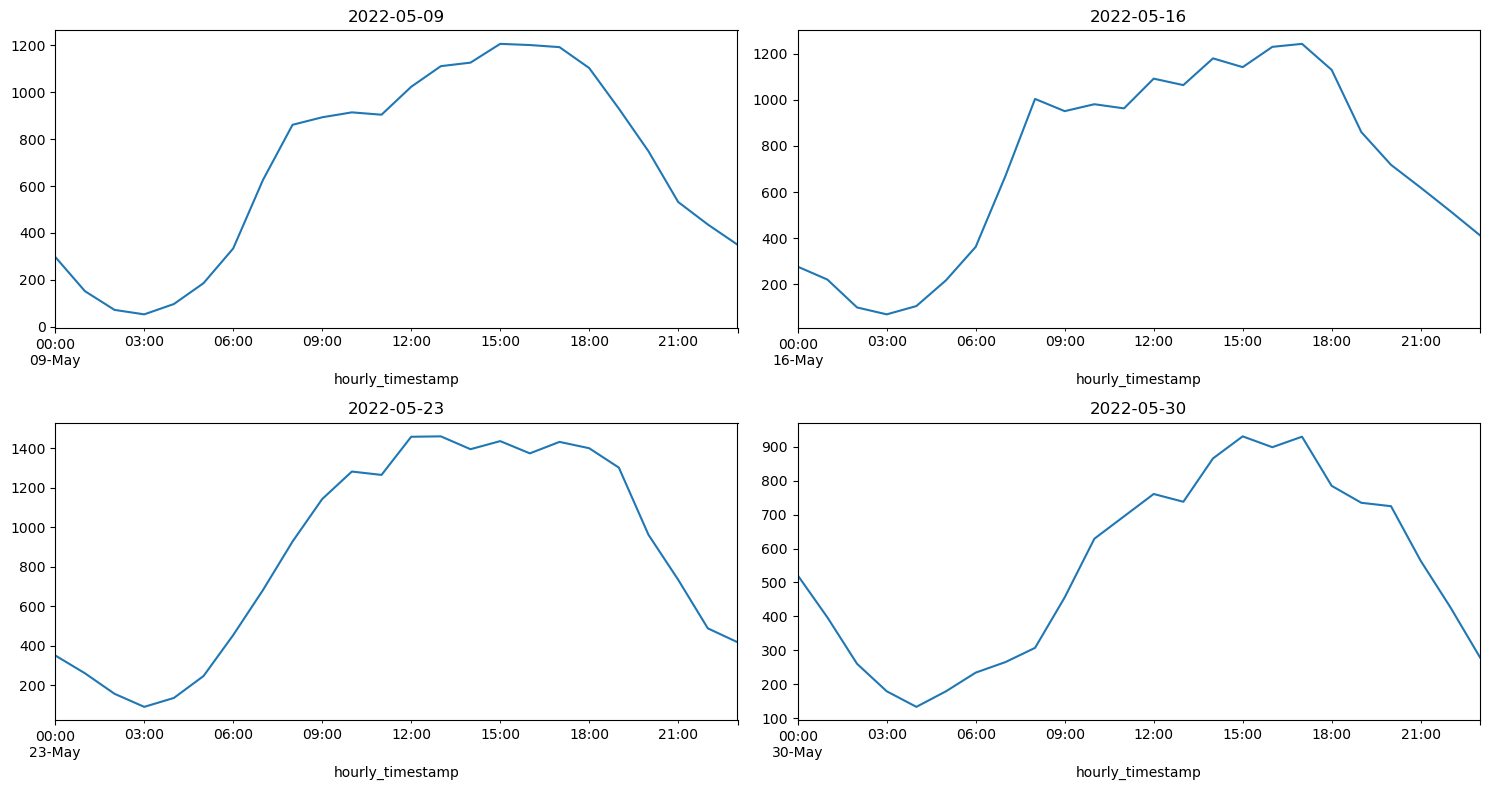

In [165]:
plt.figure(figsize=(15, 10));

plt.subplot(221);

data_union.loc['2022-05-09 00:00:00':'2022-05-09 23:00:00','count'].plot(figsize=(15, 8));
plt.title('2022-05-09');

plt.subplot(222);
data_union.loc['2022-05-16 00:00:00':'2022-05-16 23:00:00','count'].plot(figsize=(15, 8));
plt.title('2022-05-16');

plt.subplot(223);
data_union.loc['2022-05-23 00:00:00':'2022-05-23 23:00:00','count'].plot(figsize=(15, 8));
plt.title('2022-05-23');
    
plt.subplot(224);
data_union.loc['2022-05-30 00:00:00':'2022-05-30 23:00:00','count'].plot(figsize=(15, 8));
plt.title('2022-05-30');
plt.tight_layout();

Тенденция на временной период по популярности закзаов такси такаяже, что и в популярные дни.

#### Вывод по пункту 2.3

Было выполнено исслдеование данных:

Топ-10 районов по заказам:
 - 1.Near North Side - (Central) 
 - 2.O'Hare - (Far North Side) 
 - 3.(The) Loop[11] - (Central) 
 - 4.Near West Side - (West Side) 
 - 5.Unknown - (Unknown) 
 - 6.Near South Side - (Central) 
 - 7.Lake View - (North side) 
 - 8.Garfield Ridge - (Southwest Side) 
 - 9.Lincoln Park - (North side) 
 - 10.Uptown - (Far North Side)
   
Районы располагаются побольшей части у аэропорта и центра (возле берега озера)

Топ-10 компаний по заказам:
 - Taxi Affiliation Services
 - Flash Cab	
 - Sun Taxi
 - City Service
 - Taxicab Insurance Agency, LLC	
 - Chicago Independents	
 - Medallion Leasin	
 - Globe Taxi	
 - 5 Star Taxi	
 - Blue Ribbon Taxi Association	
 - Star North Taxi Management Llc	
 - Choice Taxi Association	
 - Top Cab Affiliation	
 - U Taxicab	
 - 24 Seven Taxi

Компании работают во всех регионах

Топ-4 способа оплаты в такси:
 - Credit Card	
 - Cash	
 - Mobile	
 - Prcard	

Было выполнена частичная дополнительная предобработка данных, к примеру, избавились от строк, где ест ькомпании с общим за весь периодом кол-вом заказов меньше 100. А также избавились от строк, где регион поасадки был 0.

В даннном пункте были проанализированы предоставленные данные во времени.

- было замеченно, среднее значение спроса к услугам такси растет со временем.Ряд не станционарный.
- наблюдается сезонность дня.
- даты не влияют на спрос. влияет день недели/месяц/время/квартал. было замечено, что очень мальенький спрос каждый понедельник.
- к выходным срос спадает
- временные периода спроса ориентировочно: 12-19ч. Максимум приходится на 16-18ч.

In [166]:
del taxi_2022_sdf, taxi_2023_sdf

variant = [area_count_partitioned,
           area_count,
           area_count_2022_partitioned,
           area_count_2022,
           area_count_2023_partitioned,
           area_count_2023,
           map_chicago_area,
           area_count_partitioned,
           area_count_dropoff,
           company_count_partitioned,
           company_count,
           data_company_count_uniq,
           company_count_partitioned_2,
           company_count_2,
           company_other,
           payment_type_count_partitioned,
           payment_type_count,
           resample_houtly_partitioned,
           resample_houtly_count,
           data_1,
           data_2,
           data_union]

for value in variant:
    del value

## 3. Выделение признаков


In [167]:
taxi_union_sdf.printSchema()

root
 |-- trip_start_timestamp: timestamp (nullable = true)
 |-- trip_seconds: float (nullable = true)
 |-- trip_miles: float (nullable = true)
 |-- pickup_community_area: integer (nullable = true)
 |-- dropoff_community_area: integer (nullable = true)
 |-- trip_total: float (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)
 |-- hourly_timestamp: timestamp (nullable = true)



Удалим стобцы dropoff_community_area, payment_type, company, trip_start_timestamp. Компании и вид оплаты нас не будет интересовать, так как региональный спрос они сильно влиять не должны. Компании практически во всех районах присутсвуют и выделяются лидеры. А вот спрос на сами компании с видом оплат может быть в принципе связан. Информация о месте высадки нам не особо нужна, нам важнее педсказывать именно посадки, а если такси уехало в другой район, то скорее всего в это районе она и взяла новго клиента, таким образом информация о посадке все равно будет присутсвовать. trip_start_timestamp нам не нужен, так как hourly_timestamp уже несет необхоиму в себе инфомрацию о времени.

Далее из представленного набора данных создадим признаки для дальнейшего обучения модели. Для каждого региона сформируем таблицу в которой будет информация о количестве поездок за каждый час, медианном времени поездки, пути, итоговой стоимости, найдем скользящую среднюю для кол-ва поездок. Выделим час, месяц, день недели,  и квартал, но переведм в тригинометические значения, как описано на сайте: https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning/notebook  

Создадим лаги с смещением от 1 до 6 ч, с смещением на сутки, с смещением на неделю. Создадим скользящуюю среднюю.

In [168]:
# функция по созданию признаков для региона
def make_features(data, number_area):
    w_rolling = Window.rowsBetween(-2, -1)
    w_lag = Window.orderBy('hourly_timestamp')

    data_1 = (
        data
        .filter(f'pickup_community_area = {number_area}')
        .drop('pickup_community_area',
              'dropoff_community_area',
              'payment_type',
              'company',
              'trip_start_timestamp')
        .groupBy('hourly_timestamp')
        .agg(f.count('*').alias('count_taxi_orders'),
             f.avg('trip_seconds').alias('avg_trip_seconds'),
             f.avg('trip_miles').alias('avg_trip_miles_avg'),
             f.avg('trip_total').alias('avg_trip_total')
            )
        .withColumn('hour_sin', f.hour(f.col('hourly_timestamp')))
        .withColumn('hour_sin',
                    f.sin(2 * f.hour(f.col('hourly_timestamp')) * (math.pi / 24)))
        .withColumn('hour_cos', 
                    f.cos(2 * f.hour(f.col('hourly_timestamp')) * (math.pi / 24)))
        .withColumn('day_of_week_sin', 
                    f.sin(2 * f.dayofweek(f.col('hourly_timestamp')) * (math.pi / 7)))
        .withColumn('day_of_week_cos', 
                    f.cos(2 * f.dayofweek(f.col('hourly_timestamp')) * (math.pi / 7)))
        .withColumn('month_sin', 
                    f.sin(2 * f.month(f.col('hourly_timestamp')) * (math.pi / 12)))
        .withColumn('month_cos', 
                    f.cos(2 * f.month(f.col('hourly_timestamp')) * (math.pi / 12)))
        .withColumn('quarter_sin', 
                    f.sin(2 * f.quarter(f.col('hourly_timestamp')) * (math.pi / 4)))
        .withColumn('quarter_cos', 
                    f.cos(2 * f.quarter(f.col('hourly_timestamp')) * (math.pi / 4)))
        .orderBy('hourly_timestamp')
        .withColumn('rolling_mean_2', f.avg(f.col('count_taxi_orders')).over(w_rolling))
        .withColumn('lag_1h', (f.lag('count_taxi_orders', 1).over(w_lag)).cast(IntegerType()))
        .withColumn('lag_2h', (f.lag('count_taxi_orders', 2).over(w_lag)).cast(IntegerType()))
        .withColumn('lag_3h', (f.lag('count_taxi_orders', 3).over(w_lag)).cast(IntegerType()))
        .withColumn('lag_4h', (f.lag('count_taxi_orders', 4).over(w_lag)).cast(IntegerType()))
        .withColumn('lag_5h', (f.lag('count_taxi_orders', 5).over(w_lag)).cast(IntegerType()))
        .withColumn('lag_6h', (f.lag('count_taxi_orders', 6).over(w_lag)).cast(IntegerType()))
        .withColumn('lag_23h', (f.lag('count_taxi_orders', 23).over(w_lag)).cast(IntegerType()))
        .withColumn('lag_24h', (f.lag('count_taxi_orders', 24).over(w_lag)).cast(IntegerType()))
        .withColumn('lag_1w', (f.lag('count_taxi_orders', 24*7).over(w_lag)).cast(IntegerType()))
        .withColumn("rank", f.percent_rank().over(Window.partitionBy().orderBy("hourly_timestamp")))
        .dropna()
    )
    
    return data_1

In [169]:
#функция по разбиению датасета на регионы 
#и разбиение каждого региона на обучающую/валидационную/тестовую выборку
def taxi_data_split(data):
    # разбиваем датасет в соотношении 60:30:10
    train = data.where("rank <= .6").drop("rank")
    valid = data.where("rank > .6").where("rank < .8").drop("rank")
    test = data.where("rank >= .8").drop("rank")
    return [train, valid, test]

**Стандартизация данных**

Кодирование категориальных признаков у нас не осталось в датасете, поэтому остается только выполним стандартизацию данных 

In [170]:
features_taxi = ['avg_trip_seconds', 'avg_trip_miles_avg', 'avg_trip_total', 
                 'hour_sin','hour_cos', 'day_of_week_sin', 'day_of_week_cos',
                 'month_sin', 'month_cos','quarter_sin', 'quarter_cos',
                 'rolling_mean_2', 
                 'lag_1h',
                 'lag_2h',
                 'lag_3h',
                 'lag_4h',
                 'lag_5h',
                 'lag_6h',
                 'lag_23h',
                 'lag_24h',
                 'lag_1w']

target_taxi = ['count_taxi_orders']

выделим признаки исключив из них целево признак count_taxi_orders

**Используем a VectorAssembler, чтобы положить фичи в вектор фичей:**

In [171]:
def taxi_scaled(data, features_name):
    assembler = VectorAssembler(inputCols=features_name, outputCol="features") 
    assembled_df_train = assembler.transform(data[0].drop("hourly_timestamp"))
    assembled_df_valid = assembler.transform(data[1].drop("hourly_timestamp"))
    assembled_df_test = assembler.transform(data[2].drop("hourly_timestamp"))
    # Инициилизируем `standardScaler`
    standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
    # Обучим его
    scaled_df_train = standardScaler.fit(assembled_df_train).transform(assembled_df_train)
    scaled_df_valid = standardScaler.fit(assembled_df_valid).transform(assembled_df_valid)
    scaled_df_test = standardScaler.fit(assembled_df_test).transform(assembled_df_test)
    scaled_train = scaled_df_train.select("count_taxi_orders", "features_scaled")
    scaled_valid = scaled_df_valid.select("count_taxi_orders", "features_scaled")
    scaled_test = scaled_df_test.select("count_taxi_orders", "features_scaled")
    return [scaled_train, scaled_valid, scaled_test]

In [172]:
for area in tqdm(list(range(1, 78))):
    data = taxi_scaled(taxi_data_split(make_features(taxi_union_sdf,area)), features_taxi)
    globals()[f'taxi_sdf_train_{area}'] = data[0].cache()
    globals()[f'taxi_sdf_valid_{area}'] = data[1].cache()
    globals()[f'taxi_sdf_test_{area}'] = data[2].cache()

100%|██████████| 77/77 [07:21<00:00,  5.73s/it]


## 4. Обучение моделей

Для предсказаний были использованы три модели из билиотеки MLlibrary Spark: LinearRegression, GBTRegressor и RandomForestRegressor. D качетсве метрики выберем MAE

1. **LinearRegression**

In [173]:
all_linear_area = []
all_linear_model = []
all_linear_mae = []

In [174]:
# Инициилизируем модель
linear = LinearRegression(featuresCol='features_scaled',
                          labelCol="count_taxi_orders",
                          predictionCol='pred_count_taxi_orders', 
                          maxIter=10,
                          regParam=0.3,
                          elasticNetParam=0.8,
                          standardization=False)

for area in tqdm(list(range(1, 78))):
    data = taxi_scaled(
        taxi_data_split(make_features(taxi_union_sdf,area)),
        features_taxi
    )
    
    globals()[f'taxi_sdf_test_{area}'] = data[2]
    
    # Обучиаем модель на данных
    model = linear.fit(data[0])
    predictions = model.transform(data[1])
    
    # Вытаскиваем предсказания и истинные ответы)
    predandlabels_linear = predictions.select("count_taxi_orders",
                                              "pred_count_taxi_orders")
    
    evaluator = RegressionEvaluator(predictionCol="pred_count_taxi_orders",
                                    labelCol='count_taxi_orders',
                                    metricName='mae')
    
    all_linear_area.append(area)
    all_linear_model.append(model)
    all_linear_mae.append(evaluator.evaluate(predandlabels_linear))

100%|██████████| 77/77 [11:54<00:00,  9.28s/it]


In [175]:
result_linear = pd.DataFrame([all_linear_area, all_linear_model, all_linear_mae], 
                             index=['area','model', 'mae'])

2. **RandomForestRegressor**

In [176]:
all_forest_area = []
all_forest_model = []
all_forest_mae = []

In [177]:
r_forest = RandomForestRegressor(featuresCol='features_scaled',
                                 labelCol='count_taxi_orders',
                                 predictionCol='pred_count_taxi_orders',
                                 seed=rnd_seed)
for area in tqdm(list(range(1, 78))):
    # Обучиаем модель на данных
    model = r_forest.fit(globals()[f'taxi_sdf_train_{area}'])
    predictions = model.transform(globals()[f'taxi_sdf_valid_{area}'])
    # Вытаскиваем предсказания и истинные ответы)
    predandlabels_forest = predictions.select("count_taxi_orders",
                                              "pred_count_taxi_orders")
    evaluator = RegressionEvaluator(predictionCol="pred_count_taxi_orders",
                                    labelCol='count_taxi_orders',
                                    metricName='mae')
    all_forest_area.append(area)
    all_forest_model.append(model)
    all_forest_mae.append(evaluator.evaluate(predandlabels_forest))

100%|██████████| 77/77 [12:27<00:00,  9.71s/it]


In [178]:
result_forest = pd.DataFrame([all_forest_area, all_forest_model, all_forest_mae], 
                             index=['area', 'model','mae'])

3. **GBTRegressor**

In [179]:
all_gbt_area = []
all_gbt_model = []
all_gbt_mae = []

In [180]:
gbt  = GBTRegressor(featuresCol='features_scaled',
                    labelCol='count_taxi_orders',
                    predictionCol='pred_count_taxi_orders',
                    seed=rnd_seed)

for area in tqdm(list(range(1, 78))):
    
    # Обучиаем модель на данных
    model = gbt.fit(globals()[f'taxi_sdf_train_{area}'])
    predictions = model.transform(globals()[f'taxi_sdf_valid_{area}'])
    
    # Вытаскиваем предсказания и истинные ответы)
    predandlabels_gbt = predictions.select("count_taxi_orders",
                                           "pred_count_taxi_orders")
    
    evaluator = RegressionEvaluator(predictionCol="pred_count_taxi_orders", 
                                    labelCol='count_taxi_orders',
                                    metricName='mae')
    all_gbt_area.append(area)
    all_gbt_model.append(model)
    all_gbt_mae.append(evaluator.evaluate(predandlabels_gbt))

100%|██████████| 77/77 [07:28<00:00,  5.83s/it]


In [181]:
result_gbt = pd.DataFrame([all_gbt_area, all_gbt_model, all_gbt_mae], 
                          index=['area','model','mae'])

## 5. Выбор лучшей модели

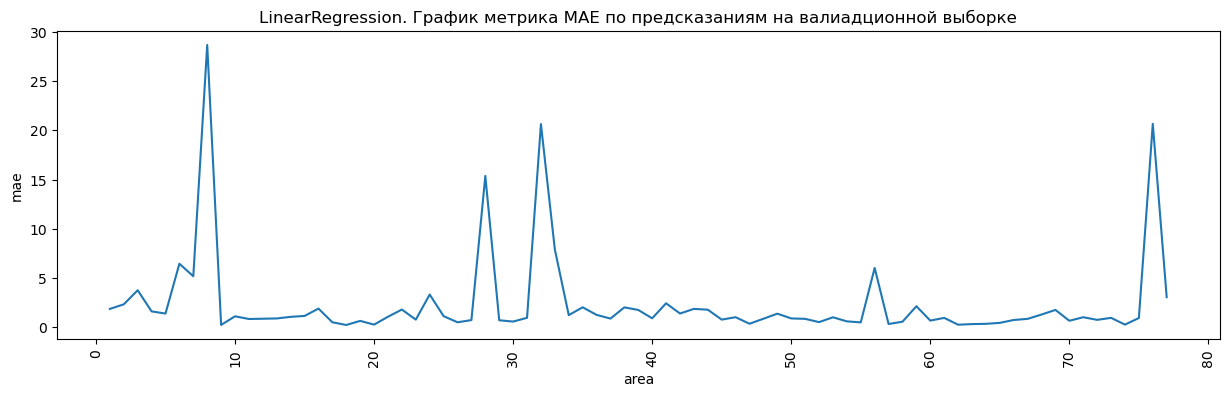

In [182]:
plt.figure(figsize=(15,4))
plt.plot(result_linear.loc['area'], result_linear.loc['mae'])
plt.title('LinearRegression. График метрика МАЕ по предсказаниям на валиадционной выборке')
plt.ylabel('mae')
plt.xlabel('area')
plt.xticks(rotation=90)
plt.show();

In [183]:
print('Модель LinearRegression ')
print('Среднее значение МАЕ по регионам на валидационной выборке: ',
      result_linear.loc['mae'].mean())
print('Медианное значение МАЕ по регионам на валидационной выборке: ',
      result_linear.loc['mae'].median())

Модель LinearRegression 
Среднее значение МАЕ по регионам на валидационной выборке:  2.402668764308234
Медианное значение МАЕ по регионам на валидационной выборке:  0.920516684209353


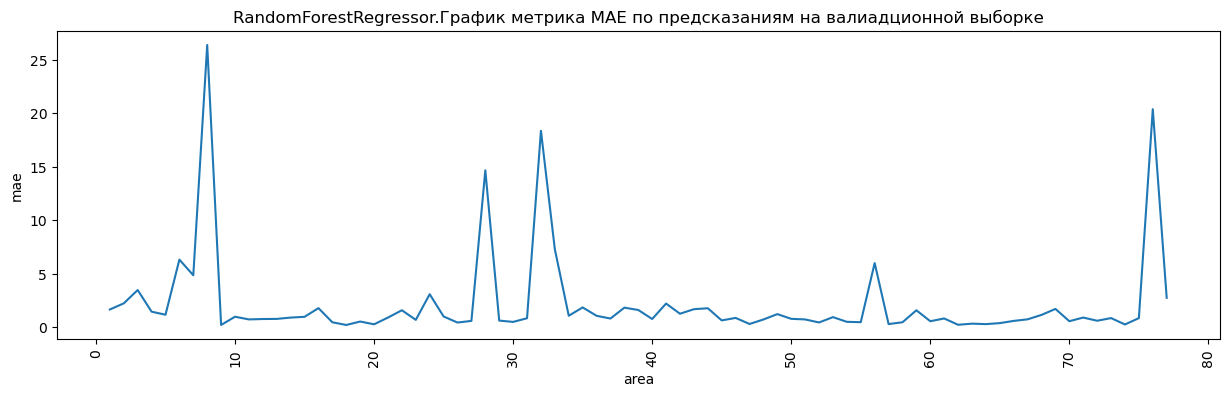

In [184]:
plt.figure(figsize=(15,4))
plt.plot(result_forest.loc['area'], result_forest.loc['mae'])
plt.title('RandomForestRegressor.График метрика МАЕ по предсказаниям на валиадционной выборке')
plt.ylabel('mae')
plt.xlabel('area')
plt.xticks(rotation=90)
plt.show();

In [185]:
print('Модель RandomForestRegressor ')
print('Среднее значение МАЕ по регионам на валидационной выборке: ',
      result_forest.loc['mae'].mean())
print('Медианное значение МАЕ по регионам на валидационной выборке: ',
      result_forest.loc['mae'].median())

Модель RandomForestRegressor 
Среднее значение МАЕ по регионам на валидационной выборке:  2.227369849167553
Медианное значение МАЕ по регионам на валидационной выборке:  0.8399444770289052


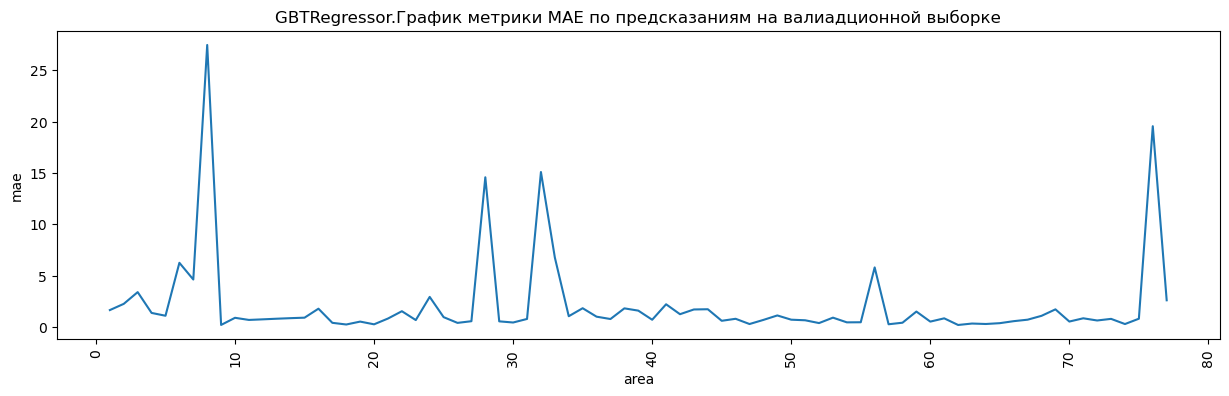

In [186]:
plt.figure(figsize=(15,4))
plt.plot(result_gbt.loc['area'], result_gbt.loc['mae'])
plt.title('GBTRegressor.График метрики МАЕ по предсказаниям на валиадционной выборке')
plt.ylabel('mae')
plt.xlabel('area')
plt.xticks(rotation=90)
plt.show();

In [187]:
print('Модель GBTRegressor ')
print('Среднее значение МАЕ по регионам на валидационной выборке: ',
      result_gbt.loc['mae'].mean())
print('Медианное значение МАЕ по регионам на валидационной выборке: ',
      result_gbt.loc['mae'].median())

Модель GBTRegressor 
Среднее значение МАЕ по регионам на валидационной выборке:  2.166565314679981
Медианное значение МАЕ по регионам на валидационной выборке:  0.8197810175121473


Лучше всех себя показал GBTRegressor

## 6. Тестирование лучшей модели

In [188]:
test_area = []
test_model = []
test_mae = []

In [189]:
for area in tqdm(list(range(1, 78))):
    
    # Обучиаем модель на данных
    model = result_gbt.loc['model'][area-1]
    predictions = model.transform(globals()[f'taxi_sdf_test_{area}'])
    
    # Вытаскиваем предсказания и истинные ответы)
    predandlabels_test = predictions.select("count_taxi_orders",
                                            "pred_count_taxi_orders")
    
    evaluator = RegressionEvaluator(predictionCol="pred_count_taxi_orders",
                                    labelCol='count_taxi_orders',
                                    metricName='mae')
    
    test_area.append(area)
    test_model.append(model)
    test_mae.append(evaluator.evaluate(predandlabels_test))

100%|██████████| 77/77 [01:47<00:00,  1.40s/it]


In [190]:
result_test = pd.DataFrame([test_area, test_model, test_mae], 
                          index=['area','model','mae'])

In [191]:
print('Лучшая модель')
print('Среднее значение МАЕ по регионам на тестовой выборке: ',
      result_test.loc['mae'].mean())
print('Медианное значение МАЕ по регионам на тестовой выборке: ',
      result_test.loc['mae'].median())

Лучшая модель
Среднее значение МАЕ по регионам на тестовой выборке:  2.4296289879506565
Медианное значение МАЕ по регионам на тестовой выборке:  0.7812887687072926


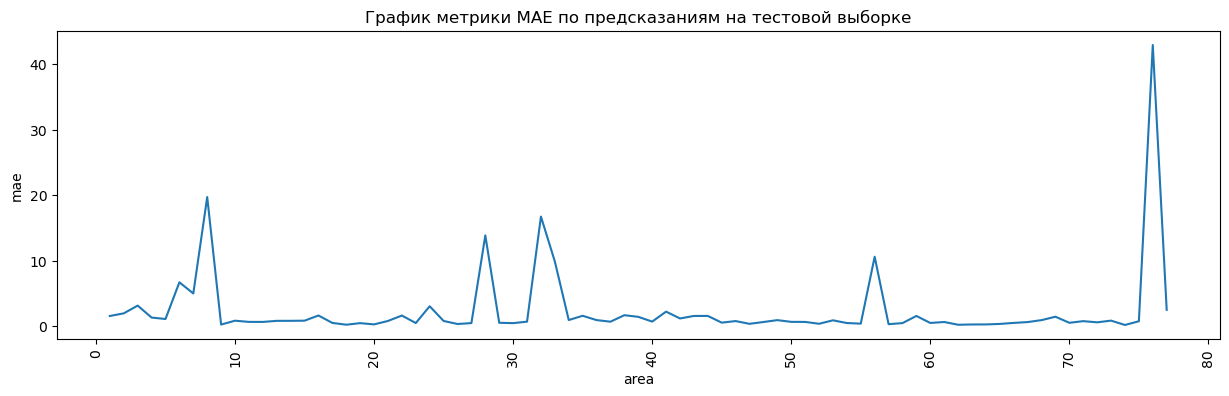

In [192]:
plt.figure(figsize=(15,4))
plt.plot(result_test.loc['area'], result_test.loc['mae'])
plt.title('График метрики МАЕ по предсказаниям на тестовой выборке')
plt.ylabel('mae')
plt.xlabel('area')
plt.xticks(rotation=90)
plt.show();

График прогноз-факта для тестового периода лучшей модели за весь период последних 24 ч тестовой выборки y общественной зоны 77

In [193]:
last_7d = predandlabels_test.toPandas()

In [194]:
last_7d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_taxi_orders       2596 non-null   int64  
 1   pred_count_taxi_orders  2596 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.7 KB


/usr/local/spark/python/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/spark/python/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


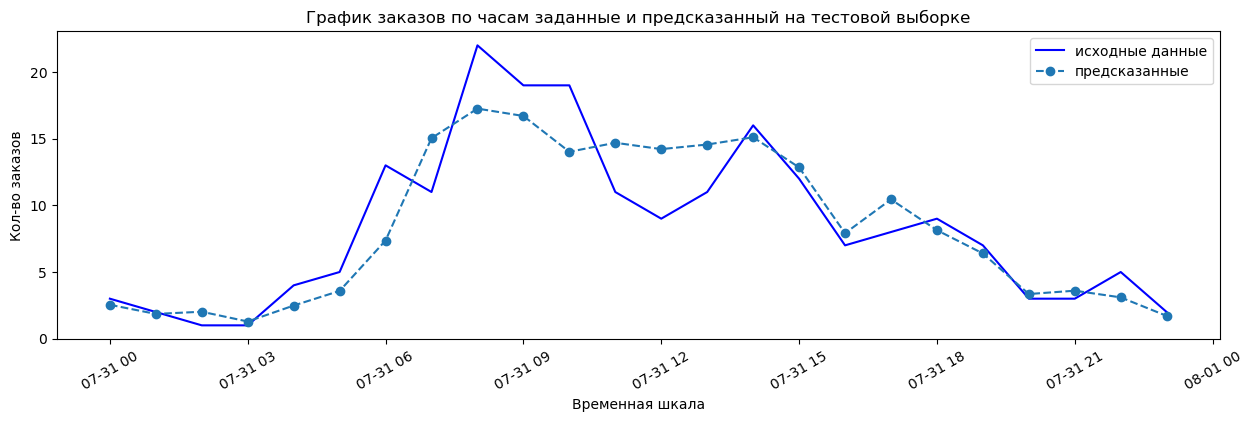

In [195]:
plt.figure(figsize=(15,4))
plt.plot(taxi_data_split(make_features(taxi_union_sdf,77))[2]
         .toPandas()['hourly_timestamp']
         .loc[(2596 - 24):],
        last_7d.loc[(2596 - 24):,'count_taxi_orders'], 'b-')
plt.plot(taxi_data_split(make_features(taxi_union_sdf,77))[2]
         .toPandas()['hourly_timestamp']
         .loc[(2596 - 24):],
        last_7d.loc[(2596 - 24):,'pred_count_taxi_orders'], 'o--')
plt.title('График заказов по часам заданные и предсказанный на тестовой выборке')
plt.ylabel('Кол-во заказов')
plt.xlabel('Временная шкала')
plt.xticks(rotation=30)
plt.legend(('исходные данные','предсказанные'))
plt.show();

Для региона 77 в предсказании на тестовой выборке наблюдается незначительые отклонения в кол-во заказов, однако саму форму график с исходным повторяет 

In [196]:
spark.stop()

## 7. Заключение

Целью проекта было построить ML модель на Spark предсказания количества заказов на следующий час для каждой общественной зоны Чикаго с применен PySpark на локальном кластере из Docker контейнеров
Данные были представлены за 2022 и 2023 года

Исходники:

- Данные за 2022 год: https://data.cityofchicago.org/Transportation/Taxi-Trips-2022/npd7-ywjz
- Данные за 2023 год: https://data.cityofchicago.org/Transportation/Taxi-Trips-2023/e55j-2ewb


Для выполнения данное исслеования были проделаны следующие шаги:

 1. **Предобработка данных**


- столбцы trip_start_timestamp и trip_end_timestamp перевели в тип данных timestamp. Также изучили начало и конец временного диапазона представленного за 2022 и 2023 года.

Временной диапазон данных за 2022 год: \
min(trip_start_timestamp) - 2022-01-01 00:00:00
max(trip_start_timestamp) - 2022-12-31 23:45:00
min(trip_end_timestamp) -  2022-01-01 00:00:00
max(trip_end_timestamp) - 2023-01-01 16:00:00


Временной диапазон данных за 2023 год \
min(trip_start_timestamp) - 2023-01-01 00:00:00
max(trip_start_timestamp) - 2023-08-01 00:00:00
min(trip_end_timestamp) - 2023-01-01 00:00:00
max(trip_end_timestamp) - 2023-08-01 13:15:00

  
- удалили столбцы: pickup_centroid_latitude, pickup_centroid_latitude, pickup_centroid_longitude, pickup_centroid_location, dropoff_centroid_latitude, dropoff_centroid_longitude, dropoff_centroid_location, trip_id, pickup_census_tract, dropoff_census_tract, taxi_id
- пустые знаечния в pickup_community_area и dropoff_community_area заполнили нулями.
- удалили строки в столбцах которых присуствуеют пропуски: extras, trip_total, tips, tolls, fare, trip_seconds, trip_miles
- В датасет за 2022 переименовали компании:
  - Blue Ribbon Taxi Association и Blue Ribbon Taxi Association Inc.
  - Taxicab Insurance Agency Llc и Taxicab Insurance Agency, LLC
  - KOAM Taxi Association и Koam Taxi Association
- В датасет за 2023 переименовали компании:
  - Choice Taxi Association и Choice Taxi Association Inc
  - Blue Ribbon Taxi Association и Blue Ribbon Taxi Association Inc.
  - Taxicab Insurance Agency Llc и Taxicab Insurance Agency, LLC
  - Taxi Affiliation Services Llc - Yell и Taxi Affiliation Services
- В датасет за 2022 выполнили фильтрацию и оставить следующие значения:
  -  trip_seconds < 5000
  -  trip_miles < 200
  -  fare < 150
  -  tips < 20
  -  tolls < 100
  -  extras < 35
  -  trip_total < 150
- В датасет за 2023 выполнили фильтрацию и оставили следующие значения:
  -  trip_seconds < 6000
  -  trip_miles < 50
  -  fare < 150
  -  tips < 20
  -  tolls < 100
  -  extras < 50
  -  trip_total < 150
- после фильтрации удалили столбцы fare, tips, tolls, extras, так как trip_total будет нести в себе всю информацию об данных столбцах
- объединили taxi_2022_sdf и taxi_2023_sdf в один общий датасет


 2. **EDA (исследовательский анализ данных)**

Было выполнено исслдеование данных:

Топ-10 районов по заказам:
 - 1.Near North Side - (Central) 
 - 2.O'Hare - (Far North Side) 
 - 3.(The) Loop[11] - (Central) 
 - 4.Near West Side - (West Side) 
 - 5.Unknown - (Unknown) 
 - 6.Near South Side - (Central) 
 - 7.Lake View - (North side) 
 - 8.Garfield Ridge - (Southwest Side) 
 - 9.Lincoln Park - (North side) 
 - 10.Uptown - (Far North Side)
   
Районы располагаются побольшей части у аэропорта и центра (возле берега озера)

Топ-10 компаний по заказам:
 - Taxi Affiliation Services
 - Flash Cab	
 - Sun Taxi
 - City Service
 - Taxicab Insurance Agency, LLC	
 - Chicago Independents	
 - Medallion Leasin	
 - Globe Taxi	
 - 5 Star Taxi	
 - Blue Ribbon Taxi Association	
 - Star North Taxi Management Llc	
 - Choice Taxi Association	
 - Top Cab Affiliation	
 - U Taxicab	
 - 24 Seven Taxi

Компании работают во всех регионах

Топ-4 способа оплаты в такси:
 - Credit Card	
 - Cash	
 - Mobile	
 - Prcard	

Было выполнена частичная дополнительная предобработка данных, к примеру, избавились от строк, где ест ькомпании с общим за весь периодом кол-вом заказов меньше 100. А также избавились от строк, где регион поасадки был 0.

В даннном пункте были проанализированы предоставленные данные во времени.

- было замеченно, среднее значение спроса к услугам такси растет со временем.Ряд не станционарный.
- наблюдается сезонность дня.
- даты не влияют на спрос. влияет день недели/месяц/время/квартал. было замечено, что очень мальенький спрос каждый понедельник.
- к выходным срос спадает
- временные периода спроса ориентировочно: 12-19ч. Максимум приходится на 16-18ч.

 3. **Выделение признаков**

 признаки 'avg_trip_seconds', 'avg_trip_miles_avg', 'avg_trip_total', 
                 'hour_sin','hour_cos', 'day_of_week_sin', 'day_of_week_cos',
                 'month_sin', 'month_cos','quarter_sin', 'quarter_cos',
                 'rolling_mean_2', 
                 'lag_1h',
                 'lag_2h',
                 'lag_3h',
                 'lag_4h',
                 'lag_5h',
                 'lag_6h',
                 'lag_23h',
                 'lag_24h',
                 'lag_1w'

целевой признак =  'count_taxi_orders'


С помощью написанной функции make_features создаются признаки: в ней находятся среднии значения по стоимости поездки, расстоянию, времени поездки для каждого региона на каждый час. Также формируются столбцы с временной информация и затем переводятся с помощью тригонометрических формул из категоральных значений в числовые. Вычисляется скользящее среднее и формируются серия lag.

Затем с помощью taxi_data_split разбиваем датасет в соотношении 60/30/10 без перемешивания данных.

И потом данные с помощью функции taxi_scaled масштабируются.

 4. **Обучение моделей**
    
Для предсказаний были использованы три модели из билиотеки MLlibrary Spark: LinearRegression, GBTRegressor и RandomForestRegressor.

 5.  **Выбор лучшей модели**

Модель LinearRegression \
Среднее значение МАЕ по регионам на валидационной выборке:  2.402668764308234 \
Медианное значение МАЕ по регионам на валидационной выборке:  0.920516684209353 \

Модель RandomForestRegressor \
Среднее значение МАЕ по регионам на валидационной выборке:  2.227369849167553 \
Медианное значение МАЕ по регионам на валидационной выборке:  0.8399444770289052 \

Модель GBTRegressor \
Среднее значение МАЕ по регионам на валидационной выборке:  2.166565314679981 \
Медианное значение МАЕ по регионам на валидационной выборке:  0.8197810175121473 \

Лучше всех себя показал GBTRegressor

 6. **Тестирование лучшей модели**
    
Лучшая модель \
Среднее значение МАЕ по регионам на тестовой выборке:  2.4296289879506565 \
Медианное значение МАЕ по регионам на тестовой выборке:  0.7812887687072926 \

Погрешность в 2 заказа на каждый регион в час нас устраивает.

Улучшить качество предсказания моделей можно поработав с признакми: 
- расширить диапазон скользящей средней
- сделать больше сдвигов lag
- ввести перебор гиперпараметров
